# 1. **Descripción del Problema y Objetivos**

El objetivo de este análisis es identificar los factores más relevantes asociados con la enfermedad cardíaca y construir un modelo predictivo que clasifique si un paciente tiene o no esta enfermedad.

### **Problema**

Identificar los principales factores relacionados con la enfermedad cardíaca y predecir la presencia o ausencia de la enfermedad utilizando la variable objetivo `Num`.

### **Objetivos**

1. Explorar el dataset para comprender la distribución de las variables y su relación con la variable objetivo (`Num`).
2. Limpiar los datos, manejando valores ausentes y atípicos.
3. Construir y evaluar modelos predictivos para determinar cuál ofrece el mejor rendimiento.

### **Preguntas Clave**

1. ¿Cuáles son los principales factores asociados con la presencia de enfermedad cardíaca?
2. ¿Existen patrones claros entre las variables que podamos utilizar para la predicción?
3. ¿Qué modelo ofrece el mejor rendimiento para este dataset?

### **Preguntas Iniciales**

1. **¿Qué tipo de modelo o análisis necesito?**
   Usaremos un modelo de clasificación, ya que buscamos clasificar los pacientes como `1` (enfermedad presente) o `0` (enfermedad ausente).

2. **¿Qué impacto tiene este análisis para mi objetivo final?**
   Este análisis permitirá identificar los factores más relevantes asociados con la enfermedad y desarrollar un modelo que facilite la predicción, contribuyendo al diagnóstico temprano y la toma de decisiones informadas.

---

# **2. Recolección de Datos**


## **2.1. Descripción de los datos**

La base de datos **Heart Disease** fue obtenida del repositorio de **UCI Machine Learning**. Contiene un total de **303 observaciones** y **14 variables**, de las cuales 5 son cuantitativas y 9 categóricas. A continuación, se describen las variables incluidas en el dataset:

- **Edad**: Edad del paciente (cuantitativa discreta).
- **Sexo**: Sexo del paciente (categórica con dos niveles: Femenino y Masculino).
- **Cp**: Tipo de dolor de pecho (categórica con 4 tipos):

  - **Tipo 1**: Angina típica.
  - **Tipo 2**: Angina atípica.
  - **Tipo 3**: Dolor no anginal.
  - **Tipo 4**: Asintomático.

- **Trestbps**: Presión arterial en reposo en mm Hg al ingreso al hospital (cuantitativa continua).
- **Chol**: Colesterol sérico en mg/dl (cuantitativa continua).
- **Fbs**: Azúcar en sangre en ayunas > 120 mg/dl (categórica con dos niveles: Verdadero, Falso).
- **Restecg**: Resultados electrocardiográficos en reposo (categórica con 3 niveles):

  - **Nivel 0**: Normal.
  - **Nivel 1**: Anomalía de onda ST-T (inversiones de onda T y/o elevación o depresión de ST > 0.05 mV).
  - **Nivel 2**: Hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes.

- **Thalach**: Frecuencia cardíaca máxima alcanzada (cuantitativa continua).
- **Exang**: Angina inducida por el ejercicio (categórica con dos niveles: Sí, No).
- **Oldpeak**: Depresión del segmento ST inducida por el ejercicio en relación con el descanso (cuantitativa continua).
- **Slope**: La pendiente del segmento ST del ejercicio pico (categórica con 3 niveles):

  - **Valor 1**: Ascendente.
  - **Valor 2**: Plano.
  - **Valor 3**: Descendente.

- **Ca**: Número de vasos principales (0-3) coloreados por fluoroscopia (categórica con 4 niveles: 0, 1, 2, 3).
- **Thal**: Estado del corazón según la prueba de Thallium (categórica con 3 niveles):

  - **N**: Normal.
  - **DF**: Defecto fijo.
  - **DR**: Defecto reversible.

- **Num**: Diagnóstico de enfermedad cardíaca basado en el estado angiográfico (categórica con 4 niveles):

  - **Valor 0**: < 50% de estrechamiento del diámetro (no presenta enfermedad).
  - **Valor 1**: > 50% de estrechamiento del diámetro (presencia de enfermedad cardíaca).

Este dataset proporciona una base sólida para analizar factores asociados con enfermedades cardíacas y construir modelos predictivos robustos.

---

## **2.2 Importar Librerías**

Primero, importamos las librerías necesarias para el análisis, incluyendo:
- `KaggleApi` para descargar datos directamente de Kaggle.
- `pandas` y `numpy` para manejo y análisis de datos.
- `matplotlib` y `seaborn` para visualizaciones.
Además, configuramos los estilos de gráficos para que tengan un diseño uniforme y atractivo.

In [2748]:
# Importar librerías de extracción de datos
from kaggle.api.kaggle_api_extended import KaggleApi

# Importar librerías de manipulación de datos
import pandas as pd
import numpy as np

# Importar librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Importar librerías de estadística
from scipy.stats import chi2_contingency, shapiro, ttest_ind, mannwhitneyu, f_oneway, kruskal
from scipy.stats import shapiro, kruskal, levene
# Importar librerías de Machine Learning
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans

# Importar librerías de Normalización y escalado
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import random

# Configuración de gráficos
sns.set_palette('viridis')
plt.style.use('ggplot')

# Desactivar warnings
import warnings
warnings.filterwarnings('ignore')

# Activar semilla
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)


print("Librerías importadas correctamente.")



Librerías importadas correctamente.


---

## **2.3 Funciones**

En esta sección, definimos dos funciones clave para realizar análisis estadísticos y comparar datasets:

1. **`analyze_variable_verbose`**: Esta función realiza un análisis estadístico detallado entre una variable continua y una categórica. Permite identificar si existen diferencias significativas entre las categorías de una variable en relación con otra, ofreciendo una salida detallada que incluye la normalidad, la prueba estadística utilizada y las conclusiones.

2. **`comparar_datasets`**: Permite comparar datasets en función de una variable específica. Dependiendo de si la variable es continua o categórica, la función aplica pruebas estadísticas como ANOVA, Kruskal-Wallis o Chi-cuadrado para evaluar diferencias significativas entre los grupos.

A continuación, se presenta el código para estas funciones.


In [2749]:
def analyze_variable_verbose(df, continuous_var, categorical_var, group_col=None, alpha=0.05):
    """
    Realiza análisis estadístico entre una variable continua y una categórica con una salida más detallada y conclusiones claras.

    Args:
        df (pd.DataFrame): DataFrame con los datos.
        continuous_var (str): Nombre de la columna con la variable continua.
        categorical_var (str): Nombre de la columna con la variable categórica (variable objetivo).
        group_col (str, optional): Nombre de la columna de agrupación (por ejemplo, grupo de edades).
        alpha (float, optional): Nivel de significancia para pruebas de normalidad y estadísticas. Default es 0.05.

    Returns:
        None: Imprime los resultados y conclusiones directamente.
    """
    results = {}
    groups = df.groupby(group_col) if group_col else [(None, df)]
    
    for group, data in groups:
        # Dividir los datos según la variable categórica
        unique_categories = data[categorical_var].unique()
        if len(unique_categories) < 2:
            print(f"\nGrupo: {group} -> No hay suficientes categorías para realizar el análisis")
            continue
        
        data_by_category = [data[data[categorical_var] == cat][continuous_var].dropna() for cat in unique_categories]
        
        # Verificar normalidad en cada categoría
        normality_results = {cat: shapiro(d)[1] > alpha for cat, d in zip(unique_categories, data_by_category)}
        
        # Determinar qué prueba usar
        if all(normality_results.values()):
            # Datos normales
            if len(unique_categories) == 2:
                # Usar t-test para dos categorías
                stat, p_value = ttest_ind(*data_by_category, equal_var=False)
                test_used = "T-test"
            else:
                # Usar ANOVA para más de dos categorías
                stat, p_value = f_oneway(*data_by_category)
                test_used = "ANOVA"
        else:
            # Datos no normales
            if len(unique_categories) == 2:
                # Usar Mann-Whitney U para dos categorías
                stat, p_value = mannwhitneyu(*data_by_category)
                test_used = "Mann-Whitney U"
            else:
                # Usar Kruskal-Wallis para más de dos categorías
                stat, p_value = kruskal(*data_by_category)
                test_used = "Kruskal-Wallis"
        
        # Verbose Output
        print(f"\nGrupo: {group}")
        print(f"  Variable continua analizada: {continuous_var}")
        print(f"  Variable categórica analizada: {categorical_var}")
        print(f"  Test usado: {test_used}")
        print(f"  Estadístico: {stat:.4f}")
        print(f"  P-Valor: {p_value:.4f}")
        
        # Normalidad
        print("  Normalidad por categoría:")
        for cat, normal in normality_results.items():
            print(f"    - Categoría {cat}: {'Normal' if normal else 'No normal'}")
        
        # Conclusión
        if p_value < alpha:
            print(f"  **Conclusión**: Hay diferencias significativas entre las categorías de {categorical_var} respecto a {continuous_var} (p < {alpha}).")
        else:
            print(f"  **Conclusión**: No hay diferencias significativas entre las categorías de {categorical_var} respecto a {continuous_var} (p >= {alpha}).")


def comparar_datasets(df, variable, tipo):
    grupos = df.groupby('dataset')[variable]
    if tipo == 'continua':
        # Filtrar grupos con menos de 3 datos
        grupos_filtrados = {dataset: data.dropna() for dataset, data in grupos if len(data.dropna()) >= 3}
        if len(grupos_filtrados) < 2:
            print(f"No hay suficientes grupos válidos para {variable}")
            return
        
        # Normalidad y homogeneidad
        normalidad = {dataset: shapiro(data)[1] > 0.05 for dataset, data in grupos_filtrados.items()}
        homogeneidad = levene(*grupos_filtrados.values())[1] > 0.05
        
        # Elegir prueba
        if all(normalidad.values()) and homogeneidad:
            # ANOVA
            stat, p_value = f_oneway(*grupos_filtrados.values())
            test = "ANOVA"
        else:
            # Kruskal-Wallis
            stat, p_value = kruskal(*grupos_filtrados.values())
            test = "Kruskal-Wallis"
        
        print(f"Prueba usada: {test} para {variable}")
        print(f"Estadístico={stat:.4f}, p-valor={p_value:.4f}")
    elif tipo == 'categorica':
        # Chi-cuadrado
        tabla = pd.crosstab(df['dataset'], df[variable])
        stat, p_value, _, _ = chi2_contingency(tabla)
        print(f"Chi-cuadrado para {variable}: Estadístico={stat:.4f}, p-valor={p_value:.4f}")

---

## **2.4. Descarga del Dataset**


Utilizamos la **API de Kaggle** para descargar y descomprimir automáticamente el dataset **Heart Disease Data**, garantizando que trabajamos con datos actualizados directamente desde su fuente.

* **Pasos Realizados:**
    1. **Autenticación**: Configuramos la API de Kaggle con las credenciales necesarias.
    2. **Descarga y Descompresión**: Obtenemos el archivo del dataset y lo descomprimimos automáticamente en una carpeta local.
    3. **Carga de Datos**: Importamos el archivo CSV en un DataFrame de pandas para comenzar el análisis.

El código a continuación detalla este proceso:



In [2750]:
# Configurar API de Kaggle
api = KaggleApi()
api.authenticate()

# Descargar el dataset
dataset = "redwankarimsony/heart-disease-data"
path = "heart_disease_data"  # Carpeta destino
api.dataset_download_files(dataset, path=path, unzip=True)

# Leer el archivo CSV
uci_data = pd.read_csv(f"{path}/heart_disease_uci.csv")

# Filas y columnas
uci_data.shape[0], uci_data.shape[1], uci_data.columns.tolist()

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data


(920,
 16,
 ['id',
  'age',
  'sex',
  'dataset',
  'cp',
  'trestbps',
  'chol',
  'fbs',
  'restecg',
  'thalch',
  'exang',
  'oldpeak',
  'slope',
  'ca',
  'thal',
  'num'])

## **Resultados**

- **Tamaño del dataset**: 920 filas y 16 columnas.
- **Columnas disponibles**:
  - `id`, `age`, `sex`, `dataset`, `cp`, `trestbps`, `chol`, `fbs`, `restecg`, `thalch`, `exang`, `oldpeak`, `slope`, `ca`, `thal`, `num`.

El dataset contiene información relevante para nuestro análisis, incluyendo variables relacionadas con las características demográficas, clínicas y resultados diagnósticos de los pacientes. 

La columna `num` será utilizada como la **variable objetivo**, mientras que las otras columnas servirán como predictores en los modelos posteriores.



---

# **3. Exploración Inicial**

## **3.1 Primera vista al Dataset**

En esta sección, realizamos una exploración inicial del dataset descargado para entender su estructura, las dimensiones, y el contenido de las variables. Este análisis incluye:

1. Mostrar las dimensiones del dataset.
2. Visualizar las primeras filas para observar cómo están organizados los datos.
3. Obtener un resumen básico de las variables, incluyendo sus tipos de datos, valores nulos, y memoria utilizada.
4. Generar estadísticas descriptivas para las variables numéricas y categóricas.

El código a continuación detalla los pasos realizados:


In [2751]:
# Mostrar las dimensiones y primeras filas del dataset
print("Dimensiones del dataset:")
display(uci_data.shape)

print("\nPrimeras filas del dataset:")
display(uci_data.head())

# Exploración básica

# Información general del dataset
print("Información general del dataset:")
display(uci_data.info())  

# Resumen estadístico
print("\nResumen estadístico del dataset:")
display(uci_data.describe(include='all'))  

# Tamaño del dataset
print("\nTamaño del dataset:")
display(f"Filas: {uci_data.shape[0]}, Columnas: {uci_data.shape[1]}") 

Dimensiones del dataset:


(920, 16)


Primeras filas del dataset:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


None


Resumen estadístico del dataset:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920,920,920,861.000000,890.000000,830,918,865.000000,865,858.000000,611,309.000000,434,920.000000
unique,NaN,NaN,2,4,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,3,NaN
top,NaN,NaN,Male,Cleveland,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,NaN,normal,NaN
freq,NaN,NaN,726,304,496,NaN,NaN,692,551,NaN,528,NaN,345,NaN,196,NaN
mean,460.500000,53.510870,NaN,NaN,NaN,132.132404,199.130337,NaN,NaN,137.545665,NaN,0.878788,NaN,0.676375,NaN,0.995652
std,265.725422,9.424685,NaN,NaN,NaN,19.066070,110.780810,NaN,NaN,25.926276,NaN,1.091226,NaN,0.935653,NaN,1.142693
min,1.000000,28.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,0.000000,NaN,0.000000
25%,230.750000,47.000000,NaN,NaN,NaN,120.000000,175.000000,NaN,NaN,120.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
50%,460.500000,54.000000,NaN,NaN,NaN,130.000000,223.000000,NaN,NaN,140.000000,NaN,0.500000,NaN,0.000000,NaN,1.000000
75%,690.250000,60.000000,NaN,NaN,NaN,140.000000,268.000000,NaN,NaN,157.000000,NaN,1.500000,NaN,1.000000,NaN,2.000000



Tamaño del dataset:


'Filas: 920, Columnas: 16'

### **Resultados de la Exploración Inicial**

### **Dimensiones del Dataset**
- El dataset tiene **920 filas** y **16 columnas**, lo que proporciona un conjunto amplio de datos para el análisis.

### **Primeras Filas del Dataset**
- Observamos ejemplos de los datos para entender su estructura y formato:
  - La columna `id` parece ser un identificador único.
  - Variables como `age`, `sex`, `cp` y `num` contienen información relevante para el análisis.

### **Información General**
- **Columnas**: 16 en total, incluyendo 5 variables numéricas continuas, 3 numéricas discretas y 8 categóricas.
- **Valores Nulos**: Algunas columnas presentan valores nulos significativos:
  - `ca` y `thal` tienen menos de la mitad de los datos completos.
  - Variables como `trestbps`, `chol`, y `slope` también tienen valores faltantes.

### **Resumen Estadístico**
- Las variables numéricas presentan un rango amplio de valores:
  - **Edad**: Rango de 28 a 77 años.
  - **Colesterol (chol)**: Valores entre 0 y 603 mg/dl, aunque valores de 0 pueden ser datos erróneos o faltantes.
  - **Presión arterial en reposo (trestbps)**: Rango de 0 a 200 mm Hg, con algunos valores posiblemente fuera de rango normal.

Esta exploración inicial nos permite identificar posibles problemas con los datos, como valores atípicos o columnas con muchos valores faltantes. En las próximas secciones, abordaremos estos problemas para preparar el dataset para el análisis predictivo.


## **3.2. Distribución de las variables**

En esta sección, exploramos la distribución de las variables numéricas del dataset para identificar patrones, valores atípicos y posibles transformaciones necesarias para el análisis. Este paso es crucial para entender la naturaleza de los datos y su adecuación a diferentes modelos predictivos.

### **Pasos Realizados:**
1. Seleccionamos todas las columnas numéricas del dataset.
2. Generamos histogramas para visualizar la distribución de las variables.
3. Evaluamos si las variables presentan sesgos, valores atípicos o distribuciones normales.

El código a continuación detalla este procedimiento:


Distribuciones de las variables numéricas:


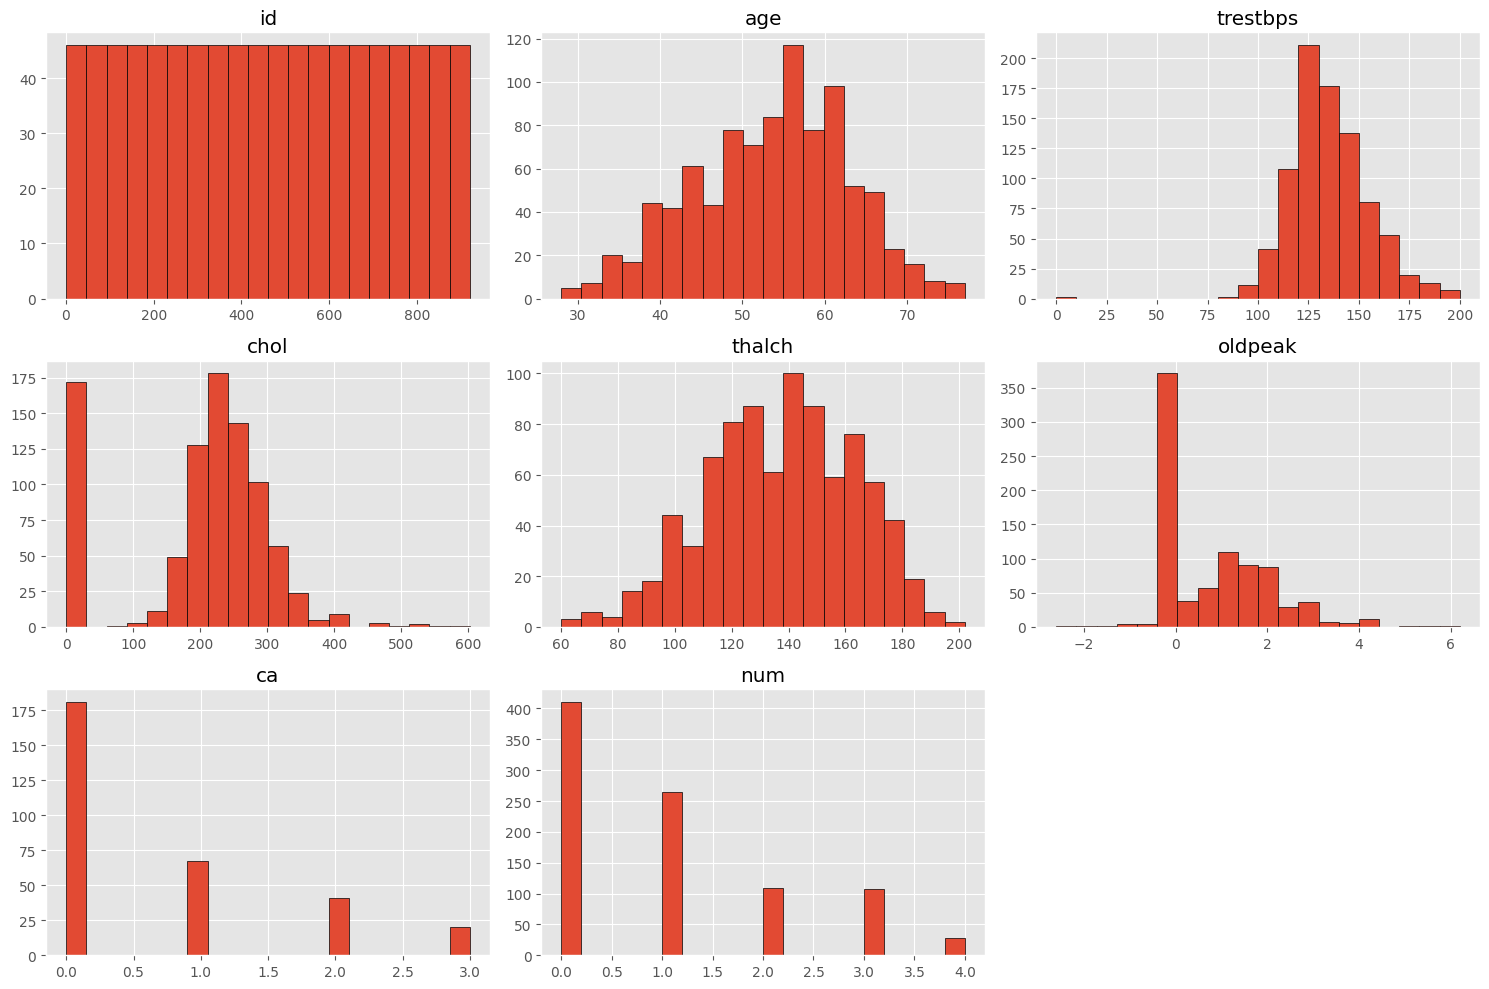

In [2752]:
# Seleccionar columnas numéricas
numeric_cols = uci_data.select_dtypes(include=['float64', 'int64']).columns

# Visualizar distribuciones de las variables numéricas
print("Distribuciones de las variables numéricas:")
uci_data[numeric_cols].hist(figsize=(15, 10), bins=20, edgecolor="black")
plt.tight_layout()
plt.show()

### **Resultados**

La visualización de las distribuciones proporciona los siguientes insights:

1. **Distribuciones Centradas:**
   - Variables como `age` y `thalch` presentan distribuciones relativamente simétricas, con una forma cercana a la normal.

2. **Distribuciones Asimétricas:**
   - La variable `trestbps` presenta asimetría, con cola a la izquierda.

2. **Valores Atípicos y Sesgos:**
   - `chol` muestra valores extremos en los niveles altos, lo cual podría requerir mayor análisis.
   - `oldpeak` tiene una distribución altamente sesgada hacia valores bajos, con algunos valores atípicos significativos.

3. **Categorías Desbalanceadas:**
   - `num`, nuestra variable objetivo, está desbalanceada, con una mayoría de observaciones en `0` (sin enfermedad) y menos en las otras categorías.


## **3.3. Distribución de la variable objetivo `num`**

#### **Resultados**

1. **Distribución Observada:**
   - **Nivel 0 (sin enfermedad)**: Representa la mayoría de los pacientes, con aproximadamente 400 observaciones.
   - **Niveles 1, 2, 3 y 4 (enfermedad en distintos grados)**: Están distribuidos de manera desigual, siendo el **nivel 1** el más frecuente entre ellos.

2. **Desequilibrio en la Distribución:**
   - Existe un **desequilibrio significativo** en las clases, con una fuerte mayoría de pacientes en el nivel 0.
   - Los niveles más altos (2, 3, 4) tienen menos observaciones, lo que podría dificultar la construcción de un modelo predictivo que clasifique correctamente estos casos.

#### **Observaciones**

- Dada esta distribución desbalanceada, sería conveniente **simplificar la variable objetivo** a una **clasificación binaria**:
  - **0**: Sin enfermedad.
  - **1**: Con enfermedad (combinando los niveles 1, 2, 3 y 4).
- Este enfoque no solo equilibra las clases, sino que también se alinea con el objetivo del análisis, que busca clasificar a los pacientes en dos categorías: **sin enfermedad (0)** o **con enfermedad (1)**.

#### **Decisión**

- Procederemos a **reclasificar la variable `num`** en dos categorías:
  - **0**: Sin enfermedad.
  - **1**: Con enfermedad.
- Esta decisión simplificará el modelado y permitirá obtener un mejor rendimiento en la predicción de los casos con enfermedad.


## **3.4. Conclusiones**:

#### **1. Variables con distribuciones aparentemente normales**
- **`age`**: Presenta una distribución similar a una normal, con un pico centrado entre los 50 y 60 años.
- **`thalch`**: La frecuencia cardíaca máxima muestra una distribución casi simétrica con un poco de asimetría a la izquierda.

#### **2. Variables con distribuciones sesgadas**
- **`chol`**: Distribución sesgada hacia la derecha, con algunos valores altos que podrían ser atípicos.
- **`oldpeak`**: Altamente sesgada hacia valores bajos (cercanos a 0), lo que sugiere una transformación para mejorar su normalidad. Además, Aunque oldpeak = 0 es un valor válido y esperable, su alta frecuencia en el dataset esta contribuyendo al sesgo observado en la distribución.
- **`ca`**: Distribución discreta con una concentración marcada en el valor 0 y pocos pacientes con valores mayores.

#### **3. Valores extremos**
- Las variables **`chol`** y **`oldpeak`** presentan valores que parecen ser atípicos y necesitan ser investigados en detalle para determinar si son errores o puntos relevantes.
- **`trestbps`** tiene una distribución más uniforme en el rango 120-140 mmHg, pero también hay algunos valores extremos que podrían requerir atención.

#### **4. Variable objetivo (`num`)**
- **Distribución desigual**: La mayoría de los pacientes no presentan enfermedad cardíaca (`num=0`), mientras que los niveles más altos de la variable objetivo tienen menos observaciones.
- **Simplificación propuesta**: Debido al desbalance en los niveles de la variable, se justifica la simplificación de `num` a una clasificación binaria:
  - **0**: Sin enfermedad.
  - **1**: Con enfermedad.

# **4. Limpieza de los datos**

## **4.1. Eliminamos ID**

La columna `id` fue eliminada del dataset porque no aporta información relevante para el análisis. Esta columna es un identificador único para cada registro y no tiene ninguna relación directa con las características clínicas o demográficas del paciente ni con la variable objetivo (`num`).


In [2753]:
uci_data.drop('id', axis=1, inplace=True)

## **4.2. Transformación de la Variable `num` a Binaria**

Dado el desequilibrio en la distribución de la variable objetivo `num` y para cumplir con el objetivo del análisis (clasificar entre pacientes con y sin enfermedad cardíaca), transformamos esta variable en una **clasificación binaria**:

- **0**: Sin enfermedad.
- **1**: Con enfermedad (combinando los niveles 1, 2, 3 y 4).

### **Pasos Realizados**
1. **Copia de seguridad de la columna original**:
   - Creamos una nueva columna llamada `num_old` para preservar la versión original de la variable `num`, que contiene todos los niveles, por si fuese necesaria para futuros análisis.
2. **Transformación**:
   - Reasignamos todos los valores de `num` mayores a 0 como 1, para obtener una variable binaria.

### **Visualización**
A continuación, se muestra la distribución de la variable `num` antes de la transformación:


In [2754]:
uci_data['num_old'] = uci_data['num'].copy()  # Mantenemos 'num' separando num = 0,1,2,3 por si lo usamos

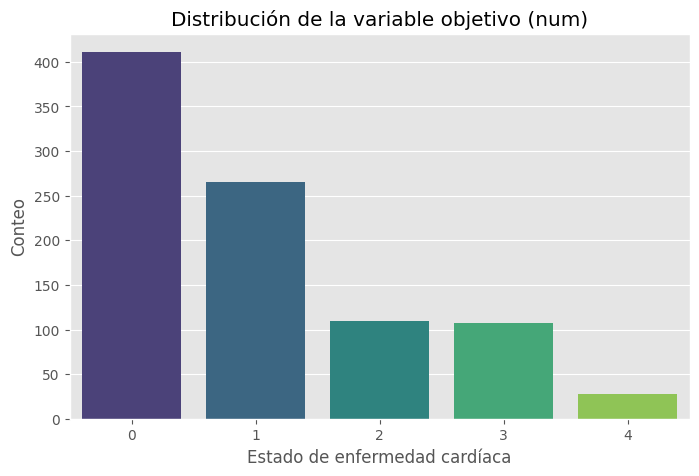

In [2755]:
# Visualizar la distribución de la variable objetivo
plt.figure(figsize=(8, 5))
sns.countplot(data=uci_data, x='num', palette='viridis')
plt.title('Distribución de la variable objetivo (num)')
plt.xlabel('Estado de enfermedad cardíaca')
plt.ylabel('Conteo')
plt.show()

El gráfico confirma que el **nivel 0** es mayoritario, mientras que los niveles 1, 2, 3 y 4 presentan una distribución desigual. Esta transformación simplificará el análisis y permitirá construir un modelo más equilibrado.

In [2756]:
uci_data['num'] = uci_data['num'].apply(lambda x: 1 if x > 0 else 0)

# Crear una copia del dataset original antes del tratamiento
uci_data_original = uci_data.copy()

Tras realizar la transformación de la variable `num`, asignamos:
- **0**: Sin enfermedad.
- **1**: Con enfermedad.

### **Pasos Adicionales**
1. Aplicamos la transformación directamente sobre la columna `num`:
   - Los valores mayores a 0 fueron transformados a 1.
   - Los valores iguales a 0 permanecieron sin cambios.
2. Creamos una copia del dataset (`uci_data_original`) antes de realizar tratamientos adicionales, para preservar los datos originales y realizar pruebas en modelado.

### **Visualización**
El gráfico a continuación muestra la **distribución actual de la variable `num`**, ya transformada en binaria:

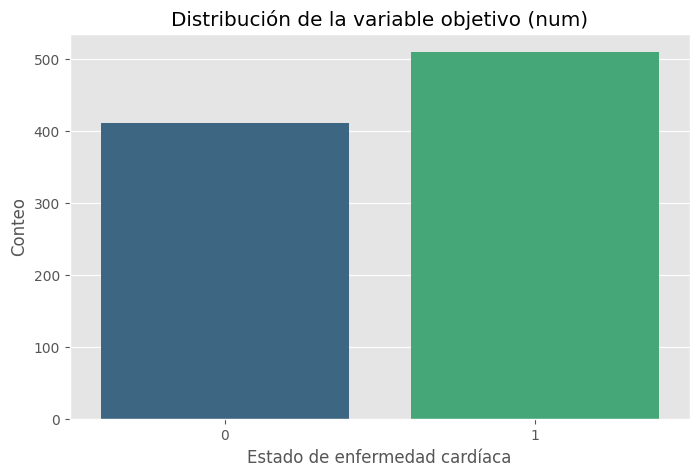

In [2757]:
# Visualizar la distribución de la variable objetivo
plt.figure(figsize=(8, 5))
sns.countplot(data=uci_data, x='num', palette='viridis')
plt.title('Distribución de la variable objetivo (num)')
plt.xlabel('Estado de enfermedad cardíaca')
plt.ylabel('Conteo')
plt.show()

### **Resultados**
- La variable está ahora más balanceada, con aproximadamente el mismo número de pacientes sin enfermedad (`num=0`) y con enfermedad (`num=1`).
- Este balance facilitará el entrenamiento de modelos predictivos, reduciendo problemas asociados al desbalance de clases.

## **Paso 4.3: Identificación de Outliers Criticos**

La identificación de valores atípicos (outliers) es un paso esencial en la limpieza de los datos, ya que estos pueden influir negativamente en los resultados del análisis y los modelos predictivos. En esta sección, evaluamos las principales métricas estadísticas del dataset para detectar posibles valores atípicos.


### **4.3.1. Información General del Dataset**

In [2758]:
uci_data.info()
uci_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
 15  num_old   920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


,age,trestbps,chol,thalch,oldpeak,ca,num,num_old
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.553261,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,0.497426,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,1.000000,4.000000


La siguiente tabla muestra un resumen estadístico de las variables numéricas en el dataset:

| Métrica   | `age` | `trestbps` | `chol` | `thalch` | `oldpeak` | `ca` |
|-----------|-------|------------|--------|----------|-----------|------|
| **Media** | 53.51 | 132.13     | 199.13 | 137.54   | 0.88      | 0.68 |
| **Desviación Estándar** | 9.42 | 19.07      | 110.78 | 25.93    | 1.09      | 0.94 |
| **Mínimo** | 28.00 | 0.00       | 0.00   | 60.00    | -2.60     | 0.00 |
| **25%**   | 47.00 | 120.00     | 175.00 | 120.00   | 0.00      | 0.00 |
| **Mediana (50%)** | 54.00 | 130.00     | 223.00 | 140.00   | 0.50      | 0.00 |
| **75%**   | 60.00 | 140.00     | 268.00 | 157.00   | 1.50      | 1.00 |
| **Máximo** | 77.00 | 200.00     | 603.00 | 202.00   | 6.20      | 3.00 |

### **4.3.2. Observaciones sobre Outliers**


1. **`age` (Edad)**:
   - Valores dentro de un rango esperado (28 a 77 años). No se identifican valores atípicos claros.
   
2. **`trestbps` (Presión arterial en reposo)**:
   - Un valor mínimo de `0` es imposible y debe ser investigado como posible error en los datos.
   - Otros valores parecen estar dentro de un rango clínicamente válido.

3. **`chol` (Colesterol sérico)**:
   - Presenta valores extremos en el rango máximo (`603`), que podrían ser atípicos. Además, el valor mínimo de `0` podría indicar datos faltantes o errores de entrada.

4. **`thalch` (Frecuencia cardíaca máxima alcanzada)**:
   - Los valores mínimos (`60`) y máximos (`202`) están dentro de lo esperado. No se identifican valores atípicos claros.

5. **`oldpeak` (Depresión ST inducida por ejercicio)**:
   - Un valor mínimo de `-2.6` no es fisiológicamente válido y debe ser investigado.
   - Valores máximos (`6.2`) podrían ser considerados extremos.

6. **`ca` (Número de vasos principales coloreados por fluoroscopia)**:
   - Distribución discreta con un rango entre `0` y `3`, aunque el bajo número de observaciones (309) requiere cautela.



### **4.3.3. Decisiones a Tomar**



- **Valores imposibles (`trestbps`, `chol`, `oldpeak`)**:
  - Investigaremos si estos valores representan datos faltantes o errores de entrada.
  - Consideraremos su eliminación o imputación en función del contexto.
- **Outliers extremos**:
  - Evaluaremos el impacto de los valores extremos en el análisis y los modelos predictivos antes de decidir su tratamiento.

### **4.3.4. Análisis de `trestbps = 0` y `chol = 0`**

#### **Problema Detectado**
Se identificaron valores de `trestbps = 0` (presión arterial en reposo) y `chol = 0` (colesterol sérico). Estos valores son fisiológicamente imposibles y representan probablemente datos erróneos o faltantes.

In [2759]:
# Ver a que dataset pertenecen chol = 0 o trestpbs = 0 y agrupar por dataset
print("Valores de 'chol' y 'trestbps' iguales a 0:")

zero_chol = uci_data[uci_data['chol'] == 0]
zero_trestbps = uci_data[uci_data['trestbps'] == 0]

print(f"Valores de 'chol' iguales a 0: {zero_chol.shape[0]}")
print(f"Valores de 'trestbps' iguales a 0: {zero_trestbps.shape[0]}")

# ver a que dataset pertenecen
display(zero_chol['dataset'].value_counts())

display(zero_trestbps['dataset'].value_counts())

Valores de 'chol' y 'trestbps' iguales a 0:
Valores de 'chol' iguales a 0: 172
Valores de 'trestbps' iguales a 0: 1


dataset
Switzerland      123
VA Long Beach     49
Name: count, dtype: int64

dataset
VA Long Beach    1
Name: count, dtype: int64


#### **Análisis Realizado**
1. **Cantidad de Valores Erróneos**:
   - **`chol = 0`**: Se encontraron **172 registros** con valores erróneos.
   - **`trestbps = 0`**: Solo se encontró **1 registro** con un valor erróneo.

2. **Distribución por Dataset**:
   - Para `chol = 0`:
     - **Switzerland**: 123 registros.
     - **VA Long Beach**: 49 registros.
   - Para `trestbps = 0`:
     - **VA Long Beach**: 1 registro.



#### **Decisiones a Tomar**
- Estos valores deben ser tratados para evitar que afecten los resultados del análisis. Las opciones incluyen:
  - **Eliminación de registros** con valores fisiológicamente imposibles.
  - **Imputación de valores** utilizando la media o mediana del dataset correspondiente.
  - **Imputación de NaN**

Decidimos profundizar un poco más para entender en qué datasets aparecen estos valores y qué proporción representan sobre el total. Esto nos permitirá decidir cómo manejarlos en el proceso de limpieza.


In [2760]:
# Ver proporcion de chol = 0 y trestbps = 0 por dataset sobre el total del dataset
print("Proporción de 'chol' y 'trestbps' iguales a 0 por dataset:")
zero_chol_prop = zero_chol['dataset'].value_counts() / uci_data['dataset'].value_counts()
zero_trestbps_prop = zero_trestbps['dataset'].value_counts() / uci_data['dataset'].value_counts()

print("Proporción de 'chol' iguales a 0:")
display(zero_chol_prop)

print("\nProporción de 'trestbps' iguales a 0:")
display(zero_trestbps_prop)



Proporción de 'chol' y 'trestbps' iguales a 0 por dataset:
Proporción de 'chol' iguales a 0:


dataset
Cleveland          NaN
Hungary            NaN
Switzerland      1.000
VA Long Beach    0.245
Name: count, dtype: float64


Proporción de 'trestbps' iguales a 0:


dataset
Cleveland          NaN
Hungary            NaN
Switzerland        NaN
VA Long Beach    0.005
Name: count, dtype: float64

#### **Resultados**

1. **Colesterol (`chol = 0`)**:
   - **Switzerland**: Todos los registros (100%) tienen este valor, lo que indica que la información de colesterol está completamente ausente.
   - **VA Long Beach**: Aproximadamente el 24.5% de los registros tienen `chol = 0`, un porcentaje considerable.

2. **Presión arterial (`trestbps = 0`)**:
   - Encontramos un solo caso en el dataset de **VA Long Beach**, que representa 0.05% del total de registros de este dataset.



### **4.3.3. Manejo de Valores Erróneos en `chol` y `trestbps`**


Para manejar los valores fisiológicamente imposibles encontrados en `chol` (colesterol) y `trestbps` (presión arterial en reposo), decidimos transformarlos en valores nulos (`NaN`). Esto nos permitirá tratarlos adecuadamente en pasos posteriores, como imputación o eliminación.

- **`chol = 0`**: Será reemplazado por `NaN` para indicar datos faltantes.
- **`trestbps = 0`**: También se reemplazará por `NaN`, dado que representa un error o dato faltante.

A continuación, aplicamos estas transformaciones.

In [2761]:
# Convertimos chol = 0 a NaN
uci_data['chol'] = uci_data['chol'].replace(0, np.nan)

# Convertimos trestbps = 0 a NaN
uci_data['trestbps'] = uci_data['trestbps'].replace(0, np.nan)

#### **Resultados**

Los valores fisiológicamente imposibles han sido reemplazados por `NaN`. Ahora, tanto `chol` como `trestbps` reflejan correctamente los datos faltantes, lo que facilitará su manejo posterior.



### **4.3.4. Detección de Outliers en Variables Categóricas**

Aunque los valores atípicos suelen asociarse a variables numéricas, también pueden aparecer en variables categóricas en forma de categorías inesperadas, errores de entrada o valores poco frecuentes que no tienen sentido en el contexto del análisis. 

Para identificar posibles outliers en las variables categóricas:
1. Listamos los valores únicos en cada columna categórica.
2. Contamos la frecuencia de cada valor para detectar categorías con pocos registros o inconsistencias.

Este análisis nos ayudará a determinar si hay valores problemáticos que necesiten ser ajustados o eliminados.


In [2762]:
# Ver outliers en categoricas

# Definir columnas categóricas
categorical_cols = uci_data.select_dtypes(include=['object']).columns

# Ver outliers en columnas categóricas
for col in categorical_cols:
    print(f"Valores únicos en '{col}': {uci_data[col].unique()}")
    print(f"Conteo de valores en '{col}':")
    display(uci_data[col].value_counts())
    print("\n")




Valores únicos en 'sex': ['Male' 'Female']
Conteo de valores en 'sex':


sex
Male      726
Female    194
Name: count, dtype: int64



Valores únicos en 'dataset': ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
Conteo de valores en 'dataset':


dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64



Valores únicos en 'cp': ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
Conteo de valores en 'cp':


cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64



Valores únicos en 'fbs': [True False nan]
Conteo de valores en 'fbs':


fbs
False    692
True     138
Name: count, dtype: int64



Valores únicos en 'restecg': ['lv hypertrophy' 'normal' 'st-t abnormality' nan]
Conteo de valores en 'restecg':


restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64



Valores únicos en 'exang': [False True nan]
Conteo de valores en 'exang':


exang
False    528
True     337
Name: count, dtype: int64



Valores únicos en 'slope': ['downsloping' 'flat' 'upsloping' nan]
Conteo de valores en 'slope':


slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64



Valores únicos en 'thal': ['fixed defect' 'normal' 'reversable defect' nan]
Conteo de valores en 'thal':


thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

#### **Resultados del Análisis**

Tras revisar las variables categóricas, encontramos los siguientes puntos destacados:

- **Valores únicos detectados**: Hemos identificado las categorías presentes en cada variable, así como su frecuencia.
- **Posibles outliers**:
  - Categorías con muy pocos registros.


### **4.3.5. Detección de Outliers en Variables Numéricas**

En esta sección, nos enfocamos en detectar valores extremos en las variables numéricas del dataset. Para esto:

1. Seleccionamos las columnas numéricas que tienen un rango continuo y valores válidos.
2. Utilizamos el rango intercuartílico (IQR) para calcular los límites inferior y superior de cada variable, considerando como outliers los valores que se encuentren fuera de estos límites.
3. Visualizamos los datos mediante diagramas de caja (boxplots) para observar la distribución y los valores extremos.

Esta exploración nos permitirá decidir si los outliers deben ser tratados, imputados o eliminados según su impacto en el análisis.


Variable: age
Outliers detectados: 0
Límite inferior: 27.50, Límite superior: 79.50
Empty DataFrame
Columns: [age]
Index: []
--------------------------------------------------


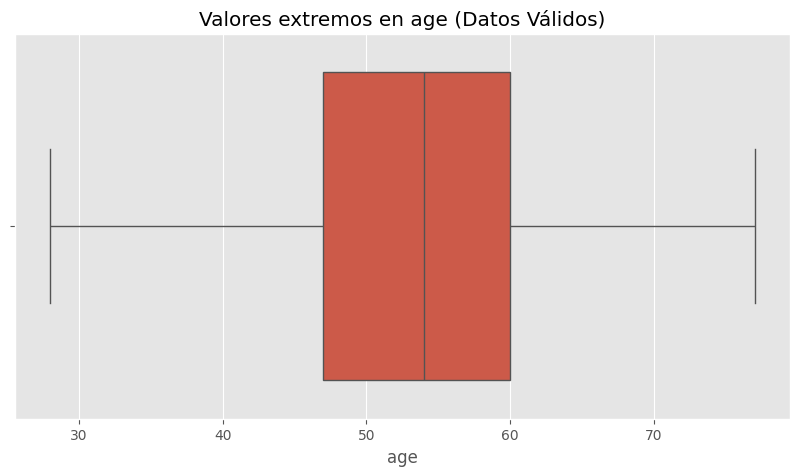

Variable: trestbps
Outliers detectados: 27
Límite inferior: 90.00, Límite superior: 170.00
     trestbps
14      172.0
83      180.0
126     200.0
172     174.0
183     178.0
188     192.0
201     180.0
213     178.0
231     180.0
338     190.0
375     180.0
387     180.0
475     180.0
484     180.0
548     200.0
569     180.0
595     180.0
644      80.0
647     180.0
680     200.0
700     185.0
701     200.0
727     180.0
779     178.0
854     172.0
889     180.0
896     190.0
--------------------------------------------------


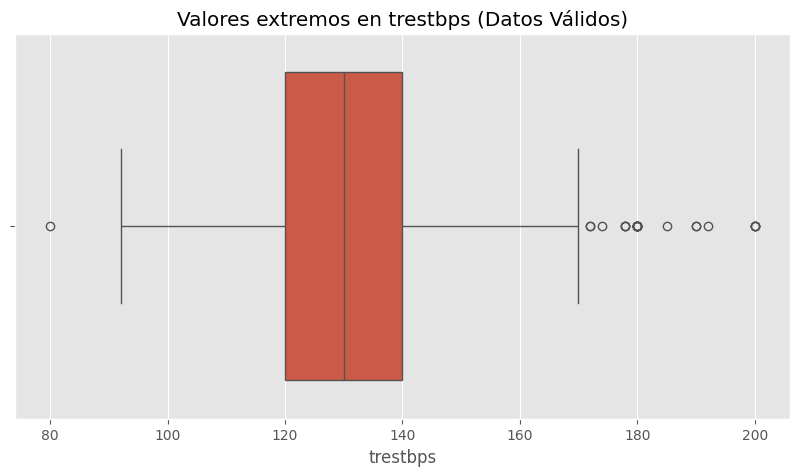

Variable: chol
Outliers detectados: 23
Límite inferior: 109.88, Límite superior: 376.88
      chol
48   417.0
121  407.0
152  564.0
173  394.0
181  409.0
373  412.0
431  100.0
434  468.0
461  394.0
473   85.0
500  466.0
528  529.0
531  392.0
546  603.0
566  404.0
568  518.0
576  388.0
584  491.0
595  393.0
748  100.0
800  458.0
802  384.0
918  385.0
--------------------------------------------------


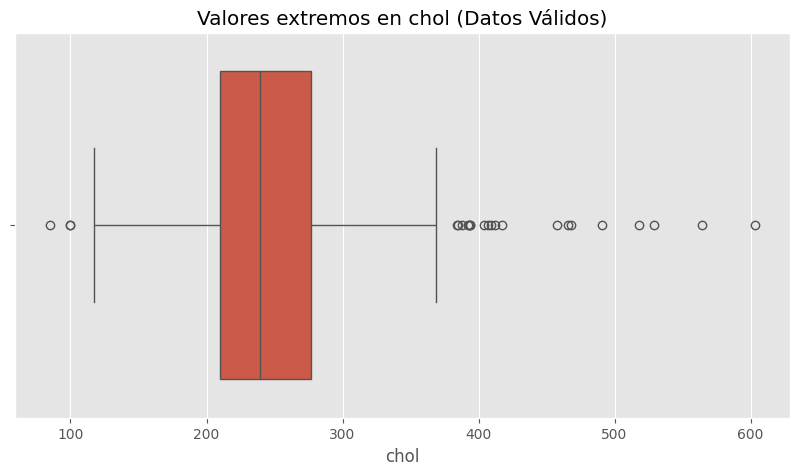

Variable: thalch
Outliers detectados: 2
Límite inferior: 64.50, Límite superior: 212.50
     thalch
631    60.0
677    63.0
--------------------------------------------------


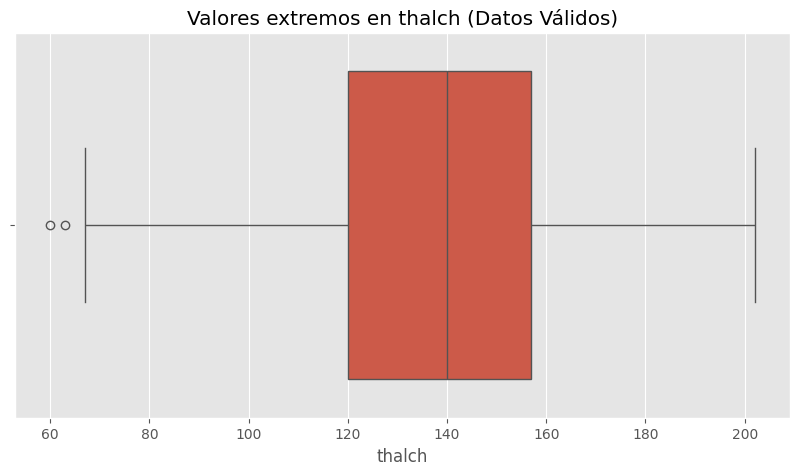

Variable: oldpeak
Outliers detectados: 29
Límite inferior: -0.50, Límite superior: 3.50
     oldpeak
6        3.6
69       3.6
91       6.2
108      3.6
121      4.0
123      5.6
126      4.0
183      4.2
191      4.2
211      3.8
264      3.6
285      4.4
293      4.0
567      4.0
589      5.0
603     -1.1
609     -1.5
615     -2.6
629     -0.7
653     -2.0
655     -1.0
656     -1.0
691     -0.8
696     -0.9
699      3.7
804      4.0
825      4.0
841      4.0
863      4.0
--------------------------------------------------


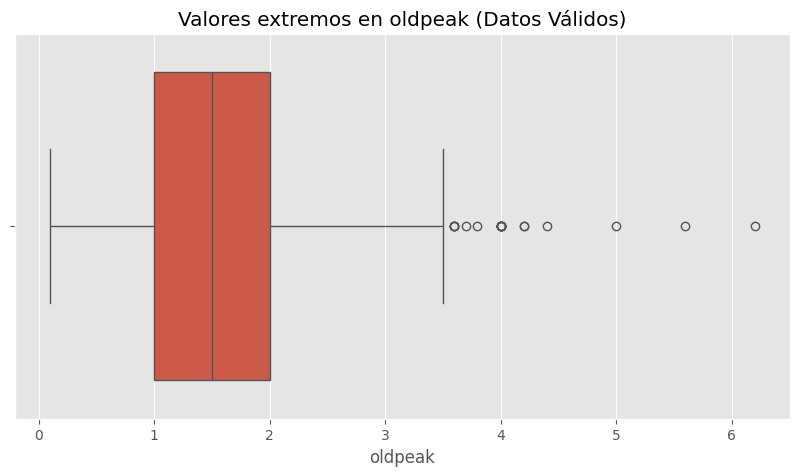

In [2763]:
# Seleccionar columnas numéricas
numericas = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# Identificar outliers
for var in numericas:
    # Filtrar valores válidos (sin NaN ni valores inválidos como 0 si aplica)
    data_valid = uci_data[uci_data[var] > 0][var].dropna()
    
    # Calcular límites usando IQR
    Q1 = data_valid.quantile(0.25)
    Q3 = data_valid.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
   
    # Identificar valores extremos
    outliers = uci_data[(uci_data[var] < lower_bound) | (uci_data[var] > upper_bound)]
    
    print(f"Variable: {var}")
    print(f"Outliers detectados: {len(outliers)}")
    print(f"Límite inferior: {lower_bound:.2f}, Límite superior: {upper_bound:.2f}")
    print(outliers[[var]])
    print("-" * 50)
    
    # Visualización
    plt.figure(figsize=(10, 5))
    
    # Boxplot con valores válidos
    sns.boxplot(x=data_valid)
    plt.title(f'Valores extremos en {var} (Datos Válidos)')
    plt.show()


#### **Resultados del Análisis de Outliers**

1. **`age`**:
   - No se detectaron outliers, lo que sugiere que la distribución de esta variable está bien dentro de los límites esperados.

2. **`trestbps` (Presión arterial en reposo)**:
   - **27 valores extremos** fueron detectados.
   - Límite inferior: **90.00**, Límite superior: **170.00**.

3. **`chol` (Colesterol sérico)**:
   - **23 valores extremos** fueron detectados.
   - Límite inferior: **109.88**, Límite superior: **376.88**.

4. **`thalch` (Frecuencia cardíaca máxima alcanzada)**:
   - **2 valores extremos** fueron detectados.
   - Límite inferior: **64.50**, Límite superior: **212.50**.

5. **`oldpeak` (Depresión ST inducida por el ejercicio)**:
   - **29 valores extremos** fueron detectados.
   - Límite inferior: **-0.50**, Límite superior: **3.50**.




#### **Observaciones**

- Las variables `trestbps`, `chol`, y `oldpeak` tienen un número significativo de valores extremos que podrían ser relevantes para el análisis clínico o representar errores de entrada.
- En `thalch`, los outliers son pocos y están dentro de un rango razonable.


### **4.3.6. Resumen de Outliers Detectados**

Tras analizar las variables numéricas, hemos recopilado un resumen de los valores extremos detectados:

| Variable     | Outliers Detectados | Límite Inferior | Límite Superior | Observaciones                                  |
|--------------|---------------------|-----------------|-----------------|-----------------------------------------------|
| **trestbps** | 27                  | 90.00           | 170.00          | Valores extremos plausibles (alta presión).   |
| **chol**     | 23                  | 109.88          | 376.88          | Valores extremos plausibles (colesterol alto).|
| **thalch**   | 2                   | 64.50           | 212.50          | Pocos outliers, revisar caso por caso.        |
| **oldpeak**  | 16                  | -0.50           | 3.50            | No hay oldpeak negativo, imputar o recortar.  |





#### **Conclusiones**

- **Valores plausibles:** Tanto en `trestbps` como en `chol`, los valores extremos detectados parecen reflejar condiciones clínicas reales, como hipertensión o colesterol alto. Estos valores no serán eliminados, pero podrían requerir transformaciones o normalización para ajustar la escala.
  
- **Revisión específica:** En `thalch`, los outliers son muy pocos, por lo que podemos revisarlos caso por caso para decidir su tratamiento.

- **Outliers en `oldpeak`:** Los valores altos pueden indicar diferencias significativas en el estado clínico. Decidiremos entre recortarlos o imputarlos según su relevancia.

### **4.3.7. Análisis de OldPeak Negativo**

Hemos detectado valores negativos en la variable `oldpeak`, lo cual no tiene sentido clínico. Antes de decidir si estos valores son errores que deben corregirse o si se trata de datos faltantes mal codificados (por ejemplo, valores que deberían ser 0), analizaremos su distribución respecto a la variable objetivo `num`:

- **Objetivo**: Determinar si los valores negativos aparecen más frecuentemente en pacientes con o sin enfermedad cardíaca (`num`).
- **Pasos**:
  1. Filtramos los registros con valores negativos en `oldpeak` y `ca`.
  2. Realizamos tablas cruzadas y calculamos proporciones por categoría de `num`.




In [2764]:
# Filtrar valores negativos
negativos_oldpeak = uci_data[uci_data['oldpeak'] < 0]
negativos_ca = uci_data[uci_data['ca'] < 0]

# Tablas cruzadas por `num`
oldpeak_negativos_por_num = negativos_oldpeak['num'].value_counts()
ca_negativos_por_num = negativos_ca['num'].value_counts()

# Proporciones por categoría de `num`
oldpeak_negativos_por_num_prop = negativos_oldpeak['num'].value_counts(normalize=True) * 100
ca_negativos_por_num_prop = negativos_ca['num'].value_counts(normalize=True) * 100

# Resultados
print("Valores negativos en `oldpeak` por `num`:")
display(oldpeak_negativos_por_num)
print("\nProporción de valores negativos en `oldpeak` por `num`:")
display(oldpeak_negativos_por_num_prop)



Valores negativos en `oldpeak` por `num`:


num
1    9
0    3
Name: count, dtype: int64


Proporción de valores negativos en `oldpeak` por `num`:


num
1    75.0
0    25.0
Name: proportion, dtype: float64

In [2765]:
# Contar registros con oldpeak = 0 por cada categoría de num
oldpeak_zero_counts = uci_data[uci_data['oldpeak'] == 0]['num'].value_counts()

# Calcular proporciones de oldpeak = 0 por cada categoría de num
oldpeak_zero_proportions = uci_data[uci_data['oldpeak'] == 0]['num'].value_counts(normalize=True) * 100

# Mostrar resultados
print("Conteo de registros con oldpeak = 0 por categoría de 'num':")
print(oldpeak_zero_counts)

print("\nProporciones de registros con oldpeak = 0 por categoría de 'num':")
print(oldpeak_zero_proportions)


Conteo de registros con oldpeak = 0 por categoría de 'num':
num
0    245
1    125
Name: count, dtype: int64

Proporciones de registros con oldpeak = 0 por categoría de 'num':
num
0    66.216216
1    33.783784
Name: proportion, dtype: float64


#### **Resultados del Análisis**

##### **Valores Negativos en `oldpeak`**

- **Distribución por `num`**:
  - **75% (9 registros)** corresponden a pacientes con enfermedad cardíaca (`num = 1`).
  - **25% (3 registros)** corresponden a pacientes sin enfermedad cardíaca (`num = 0`).
  
- **Proporciones**:
  - Los valores negativos están mayoritariamente asociados a pacientes con enfermedad.




##### **Reflexión**

1. Si imputamos los valores negativos como 0, estaríamos indicando que estos pacientes (incluyendo los enfermos) tienen `oldpeak = 0`, lo que puede no tener sentido clínico, y podría ser contradictorio clínicamente, ya que sugiere que no hay cambios anormales en el segmento ST inducidos por el ejercicio, lo cual no se alinea con la presencia de enfermedad cardíaca

2. Esto sugiere que los valores negativos podrían ser errores de medición o datos faltantes mal codificados que no deberían ser imputados como 0 sin una base sólida.


##### **Conclusiones**
1. Es probable que los valores negativos deban ser eliminados, ya que:
   - No tienen sentido fisiológico.
   - La imputación a 0 podría distorsionar la interpretación clínica, especialmente en pacientes con enfermedad cardíaca.
   - Los asignaremos como valores NaN, ya que entendemos que falta el dato correcto

2. **Relevancia de `num`**:
   - La proporción más alta en pacientes con enfermedad podría ser relevante para interpretaciones futuras.



#### **Tratamiento de Valores Negativos en `oldpeak`**



Tras analizar los valores negativos en `oldpeak`, hemos concluido que no tienen sentido clínico y podrían distorsionar el análisis si se imputan como 0. Para evitar estos problemas, decidimos convertirlos en valores nulos (`NaN`), tratándolos como datos faltantes.

Esto nos permitirá manejarlos adecuadamente en pasos posteriores, como imputación o exclusión durante el modelado.


In [2766]:
# Convertir valores negativos de 'oldpeak' a NaN
uci_data['oldpeak'] = uci_data['oldpeak'].apply(lambda x: np.nan if x < 0 else x)

### **Resultados**

- Todos los valores negativos en la variable `oldpeak` han sido reemplazados por `NaN`. Esto asegura que estos registros sean tratados correctamente como datos faltantes.
- Con este cambio, evitamos imputar valores que podrían generar inconsistencias en el análisis, especialmente en pacientes con enfermedad cardíaca.

---

#### **Identificación de Outliers con Límites Ajustados**

En esta etapa, volvemos a analizar los outliers, aplicando límites ajustados a variables como `oldpeak` para garantizar un tratamiento más realista:

- **Ajuste en `oldpeak`**: 
  - Establecemos el límite inferior como 0, ya que valores negativos no tienen sentido clínico.
  - El límite superior se calcula usando el rango intercuartílico (IQR) como en el análisis previo.

El objetivo es refinar la detección de valores extremos y asegurar que los datos relevantes sean manejados correctamente en el modelo.


In [2767]:
# Detección de outliers usando IQR con límites ajustados para oldpeak
outliers = {}
for col in ['oldpeak']:
    Q1 = uci_data[col].quantile(0.25)
    Q3 = uci_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = max(0, Q1 - 1.5 * IQR)  # Limitar el límite inferior a 0 para oldpeak y ca
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = uci_data[(uci_data[col] < lower_bound) | (uci_data[col] > upper_bound)][col]
    print(f"Outliers en {col}: {len(outliers[col])} (Límite inferior: {lower_bound}, Límite superior: {upper_bound})")


Outliers en oldpeak: 15 (Límite inferior: 0, Límite superior: 3.75)


#### **Resultados de Outliers con Límites Ajustados**



| Variable     | Outliers Detectados | Límite Inferior | Límite Superior | Observaciones                                  |
|--------------|---------------------|-----------------|-----------------|-----------------------------------------------|
| **oldpeak**  | 15                  | 0               | 3.75            | Valores extremos en la parte alta del rango.  |



#### **Conclusiones**



- **Refinamiento en `oldpeak`**:
  - Al ajustar el límite inferior a 0, se detectaron 15 outliers en el rango superior, que podrían estar relacionados con condiciones cardíacas graves.


### **4.3.8. Resumen de Outliers**


Tras analizar los valores extremos en las variables numéricas, se establecieron las siguientes decisiones:


#### **Variables con muchos outliers**



- **`chol`, `trestbps`, `oldpeak`:**
  - **Decisión:** Aplicar **winsorización** para limitar los valores extremos.
  - **Justificación:** La winsorización permite mantener la estructura general de los datos limitando los valores extremos a un rango aceptable, en lugar de eliminarlos. Esto asegura que no se pierda información valiosa que podría ser clínicamente relevante.


#### **Variables con pocos outliers**


- **`thalch`:**
  - **Decisión:** No aplicar ningún tratamiento adicional.
  - **Comprobación:** Revisar manualmente los registros asociados a los outliers.
  - **Justificación:** La pequeña cantidad de outliers detectados no afecta significativamente las métricas descriptivas ni el rendimiento esperado del modelo.


#### **Variables sin outliers**


- **`age`:**
  - **Decisión:** No realizar ningún cambio.
  - **Justificación:** La distribución de esta variable no presenta irregularidades ni valores extremos, lo que sugiere que ya está lista para el análisis.



### **4.3. Tratamiento de outliers**

### **4.3.1. Aplicación de Capping (Winsorización)**


Para mitigar el impacto de los valores extremos en las variables numéricas, aplicamos el método de capping, también conocido como winsorización. Este método consiste en limitar los valores extremos a un rango basado en percentiles seleccionados.


#### **Pasos:**

1. **Calcular los límites**:
   - Para cada variable, calculamos el percentil inferior (1%) y el superior (99%).
   - En el caso de `oldpeak`, ajustamos manualmente el límite inferior a 0 para evitar valores negativos.

2. **Aplicar winsorización**:
   - Los valores por debajo del límite inferior se establecen en el límite inferior.
   - Los valores por encima del límite superior se establecen en el límite superior.


Nuevos límites para chol: 133.19 - 451.03
Nuevos límites para trestbps: 95.00 - 180.00
Nuevos límites para oldpeak: 0.00 - 4.00
Límites ajustados manualmente para oldpeak: (0.0, 4.0)
Nuevos límites para thalch: 75.56 - 186.36


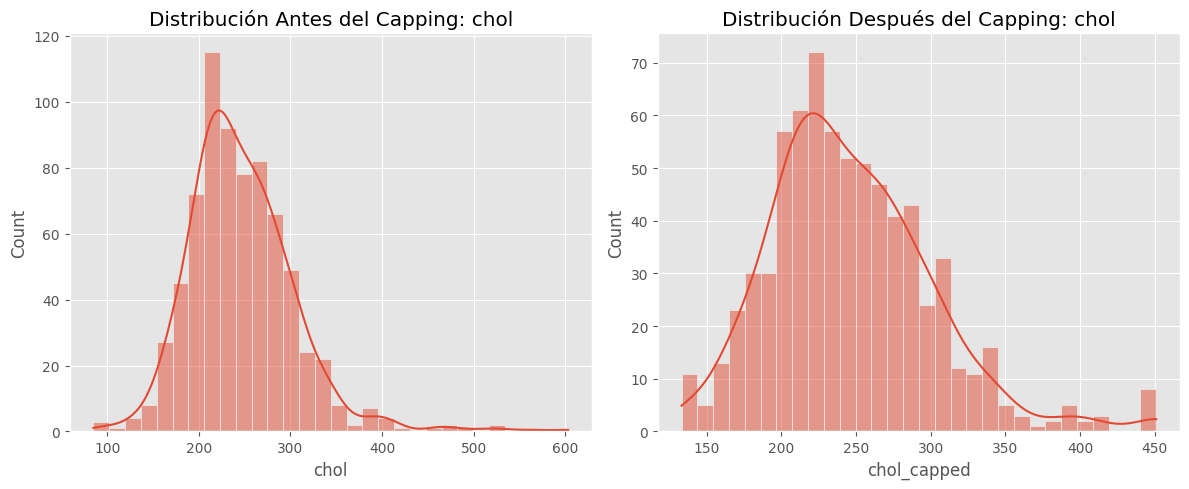

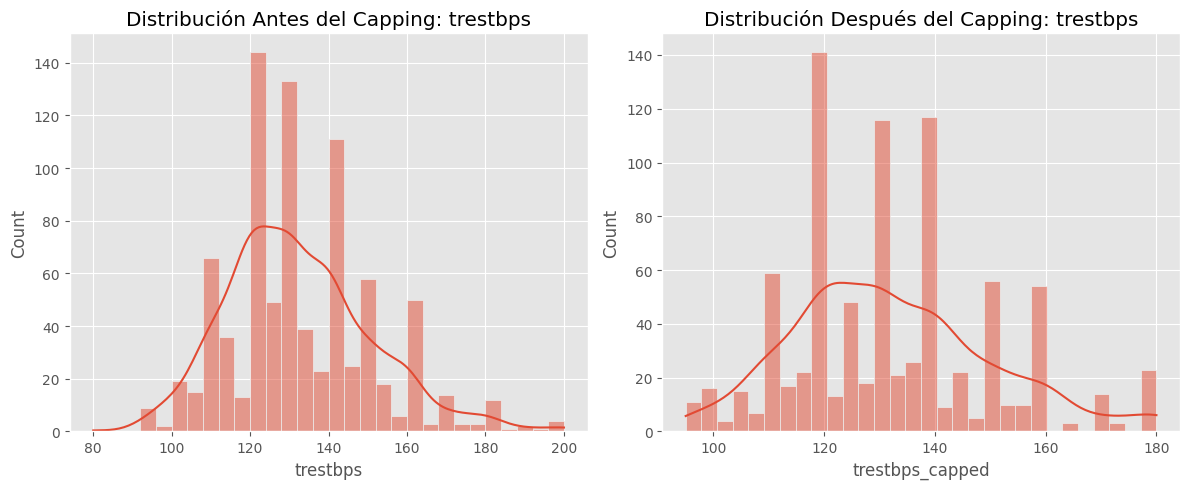

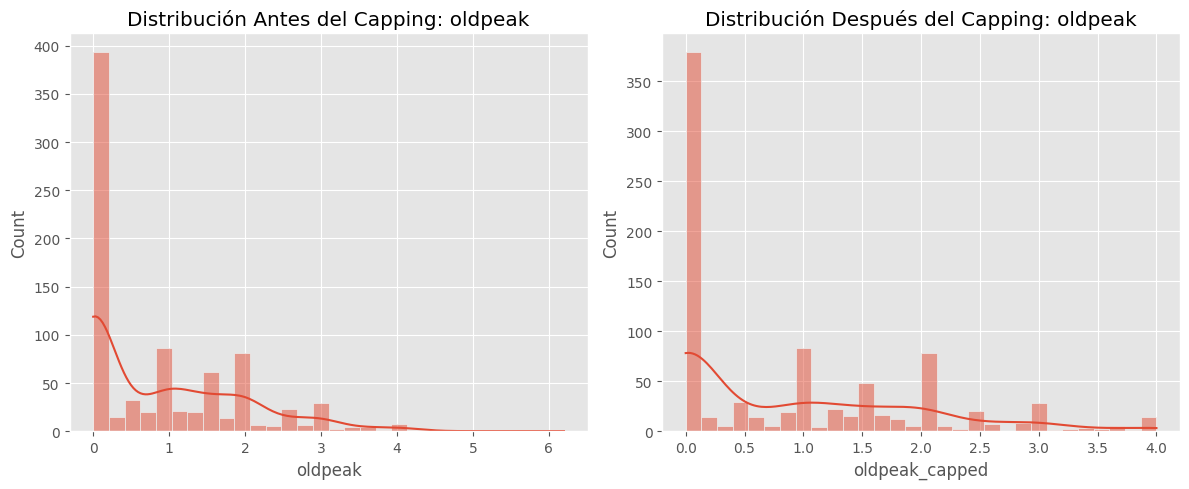

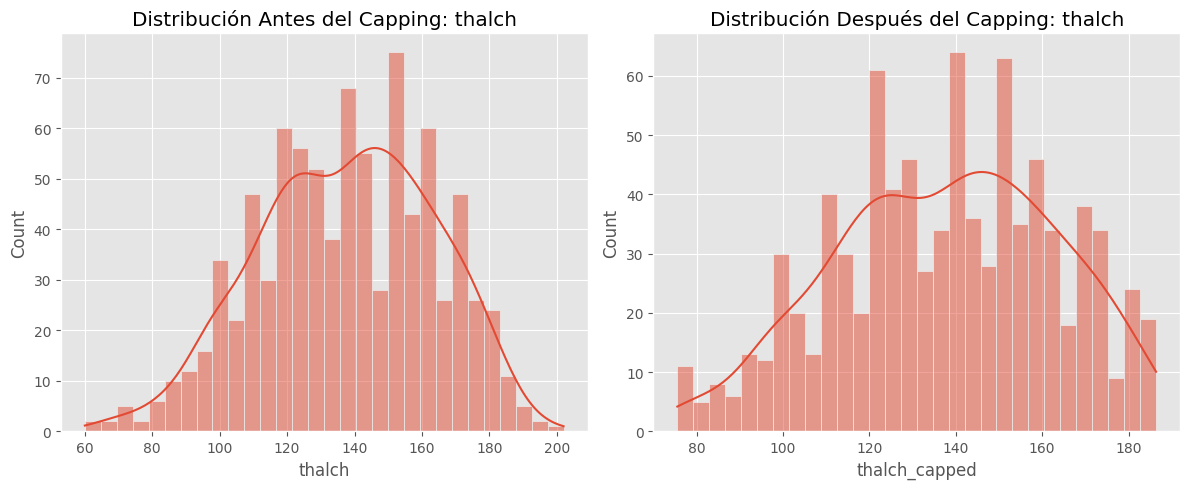

In [2768]:
# Calcular límites basados en percentiles
def recalcular_limites(data, variable, perc_inf=0.01, perc_sup=0.99):
    lower = data[variable].quantile(perc_inf)
    upper = data[variable].quantile(perc_sup)
    print(f"Nuevos límites para {variable}: {lower:.2f} - {upper:.2f}")
    return lower, upper

# Aplicar para variables numéricas relevantes
variables_outliers = ['chol', 'trestbps', 'oldpeak', 'thalch']
nuevos_limites = {}

for var in variables_outliers:
    if var in ['oldpeak']:  # Ajustar manualmente el límite inferior para oldpeak
        lower, upper = recalcular_limites(uci_data, var)
        lower = max(lower, 0)  # Aseguramos que no haya valores negativos
        nuevos_limites[var] = (lower, upper)
        print(f"Límites ajustados manualmente para {var}: {nuevos_limites[var]}")
    else:
        nuevos_limites[var] = recalcular_limites(uci_data, var)

# Aplicar capping (winsorización) con los nuevos límites
for var, (lower, upper) in nuevos_limites.items():
    plt.figure(figsize=(12, 5))
    
    # Antes del ajuste
    plt.subplot(1, 2, 1)
    sns.histplot(uci_data[var].dropna(), kde=True, bins=30)
    plt.title(f'Distribución Antes del Capping: {var}')
    
    # Aplicar capping
    uci_data[f'{var}_capped'] = np.where(uci_data[var] < lower, lower, uci_data[var])
    uci_data[f'{var}_capped'] = np.where(uci_data[f'{var}_capped'] > upper, upper, uci_data[f'{var}_capped'])
    
    # Después del ajuste
    plt.subplot(1, 2, 2)
    sns.histplot(uci_data[f'{var}_capped'].dropna(), kde=True, bins=30)
    plt.title(f'Distribución Después del Capping: {var}')
    
    plt.tight_layout()
    plt.show()


#### **Resultados del Capping**

| Variable     | Límite Inferior | Límite Superior | Observaciones                                  |
|--------------|-----------------|-----------------|-----------------------------------------------|
| **chol**     | 133.19          | 451.03          | Reducción de valores extremadamente altos.    |
| **trestbps** | 95.00           | 180.00          | Se ajustaron valores extremos superiores.     |
| **oldpeak**  | 0.00            | 4.00            | Límite inferior ajustado manualmente a 0.     |
| **thalch**   | 75.56           | 186.36          | Los valores superiores se ajustaron.          |


#### **Impacto del Capping:**
- En las visualizaciones de cada variable, se observa cómo los valores extremos fueron suavizados, preservando la estructura general de la distribución.
- Los gráficos comparan la distribución antes y después del capping, mostrando un ajuste significativo en las colas de las distribuciones.

#### **Conclusiones del capping y ajuste de límites:**

1. **`chol` (Colesterol sérico):**
   - **Nuevos límites:** **133.19 - 451.03**.
   - **Antes del ajuste:** Valores extremos por encima de 500 distorsionaban la distribución.
   - **Después del ajuste:** Los valores extremos fueron limitados, preservando la forma general.
   - **Impacto esperado:** Mejora en la estabilidad de la variable sin pérdida significativa de información.

2. **`trestbps` (Presión arterial en reposo):**
   - **Nuevos límites:** **95.00 - 180.00**.
   - **Antes del ajuste:** Valores extremos principalmente en el rango superior.
   - **Después del ajuste:** Se redujeron los extremos manteniendo la variabilidad natural.
   - **Impacto esperado:** Los modelos serán menos sensibles a valores extremos, mejorando la robustez.

3. **`oldpeak` (Depresión del ST inducida):**
   - **Límites ajustados manualmente:** **0.00 - 4.00**.
   - **Antes del ajuste:** Valores negativos y extremos superiores presentes.
   - **Después del ajuste:** Valores negativos reemplazados por 0 y extremos superiores limitados.
   - **Observaciones adicionales:**
     - La variable muestra agrupaciones claras en valores como 1, 2, 3 y en puntos intermedios (por ejemplo, 0.5, 1.5, 2.5). Esto sugiere que una futura **agregación en grupos** podría preservar la interpretación clínica.

     - Dado el desbalance en esta variable y su relación con el objetivo del modelo (predecir enfermedad cardíaca), podría ser viable **simplificar a una clasificación binaria**:

       - **0:** Corazón saludable.
       - **1:** Potencialmente enfermo.    
   - **Impacto esperado:** Mejora en la coherencia biológica de los datos y un análisis más interpretable.

4. **`thalch` (Frecuencia cardíaca máxima):**
   - **Nuevos límites:** **75.56 - 186.36**.
   - **Antes del ajuste:** Algunos valores extremos observados.
   - **Después del ajuste:** Se limitaron los valores extremos sin modificar significativamente la distribución.
   - **Impacto esperado:** Mejora en la robustez del análisis manteniendo la información útil.

5. **General:**
   - Las variables ajustadas mantienen su distribución principal, evitando la distorsión por valores extremos.
   - El proceso de capping preserva la mayor parte de la información útil de cada variable, mejorando la calidad de los datos para el modelado.


### **4.3.3. Análisis de la Variable `ca` (Número de Vasos Principales)**


La variable `ca` indica el número de vasos principales coloreados por fluoroscopia, con valores entre 0 y 3. Este análisis busca explorar su distribución y frecuencia para evaluar si es necesario algún tratamiento adicional.


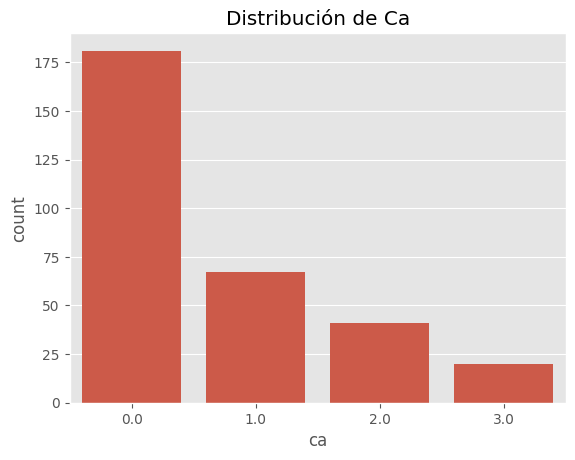

In [2769]:
# Ca: Distribución
sns.countplot(data=uci_data, x='ca')
plt.title("Distribución de Ca")
plt.show()

In [2770]:
# Ver cantidad de valores en cada Ca
uci_data['ca'].value_counts()

ca
0.0    181
1.0     67
2.0     41
3.0     20
Name: count, dtype: int64

#### **Resultados del Análisis de `ca`**

#### **Distribución de `ca`**
- **Frecuencias**:
  - **0.0 (Sin vasos coloreados):** **181 observaciones** (grupo mayoritario).
  - **1.0:** **67 observaciones**.
  - **2.0:** **41 observaciones**.
  - **3.0:** **20 observaciones** (grupo minoritario).




#### **Observaciones**
1. **Desbalance en la distribución**:
   - Existe un desbalance evidente, con la mayoría de las observaciones concentradas en `ca = 0`.
   - Los valores `ca = 2` y `ca = 3` tienen muy pocas observaciones, lo que podría dificultar su uso en el modelado.
2. **Relevancia clínica**:
   - `ca` podría ser un predictor clave para la variable objetivo (`num`), ya que representa características fisiológicas importantes.

In [2771]:
# Eliminamos las variables que hemos tratado
variables_eliminar = ['oldpeak', 'chol', 'trestbps', 'thalch']

# Eliminar variables originales
uci_data.drop(variables_eliminar, axis=1, inplace=True)


## **Paso 4.4: Análisis Exploratorio NaN**

### **4.4.1. Análisis Exploratorio de Valores Faltantes**

Es fundamental identificar y analizar las columnas con valores faltantes (`NaN`) para decidir estrategias de imputación o manejo de estos datos en pasos posteriores.




#### **Objetivos**
1. Calcular el porcentaje de valores faltantes por columna.
2. Ordenar las variables con valores faltantes en función de su porcentaje.
3. Identificar columnas con un alto porcentaje de `NaN` que puedan requerir atención especial.

In [2772]:
# Calcular porcentaje de valores faltantes por columna
missing_percent = uci_data.isnull().sum() / len(uci_data) * 100

# Crear un DataFrame ordenado por porcentaje de valores faltantes
missing_df = missing_percent[missing_percent > 0].sort_values(ascending=False).reset_index()
missing_df.columns = ['Variable', 'Porcentaje de Valores Faltantes']

# Mostrar el resultado
print(missing_df)

          Variable  Porcentaje de Valores Faltantes
0               ca                        66.413043
1             thal                        52.826087
2            slope                        33.586957
3      chol_capped                        21.956522
4              fbs                         9.782609
5   oldpeak_capped                         8.043478
6  trestbps_capped                         6.521739
7            exang                         5.978261
8    thalch_capped                         5.978261
9          restecg                         0.217391


#### **Resultados del Análisis de Valores Faltantes**

#### **Variables con Valores Faltantes y sus Porcentajes**
1. **Variables con más del 50% de `NaN`:**
   - `ca` (66.41%): Elevado porcentaje de valores faltantes, requerirá estrategias avanzadas de imputación o eliminación.
   - `thal` (52.83%): Otro caso crítico que podría influir significativamente en el análisis.

2. **Variables con entre 5% y 33% de `NaN`:**
   - `slope` (33.59%): Relativamente alto, pero posiblemente imputable.
   - `chol_capped` (21.96%): Valores faltantes moderados, imputación posible con métricas como la media o mediana.
   - `fbs`, `oldpeak_capped` (~8-10%): Impacto moderado.
   - `trestbps_capped`, `thalch_capped`) (~6%): Valores faltantes manejables.

3. **Variables con menos del 1% de `NaN`:**
   - `restecg` (0.22%): Poca influencia en el análisis, posiblemente eliminable o imputable sin problemas.




#### **Observaciones Clave**
- **Impacto en las variables clave:**
  - Las variables `ca`, `thal`, y `slope` tienen un alto porcentaje de valores faltantes y pueden requerir un análisis cuidadoso para decidir si imputarlas o eliminarlas.

 

### **4.4.2. Mapa de Calor por Dataset**


Para identificar patrones en los valores faltantes, generamos un mapa de calor por cada dataset presente en los datos. Este análisis nos permitirá observar cómo se distribuyen los valores faltantes en las distintas columnas, ayudándonos a decidir cómo manejar cada caso.



#### **Objetivos**
1. Visualizar valores faltantes (`NaN`) por dataset.
2. Identificar si los valores faltantes siguen un patrón específico según el origen de los datos (`dataset`).
3. Determinar si ciertos datasets presentan más problemas de calidad que otros.

Valores únicos en 'dataset':
['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']


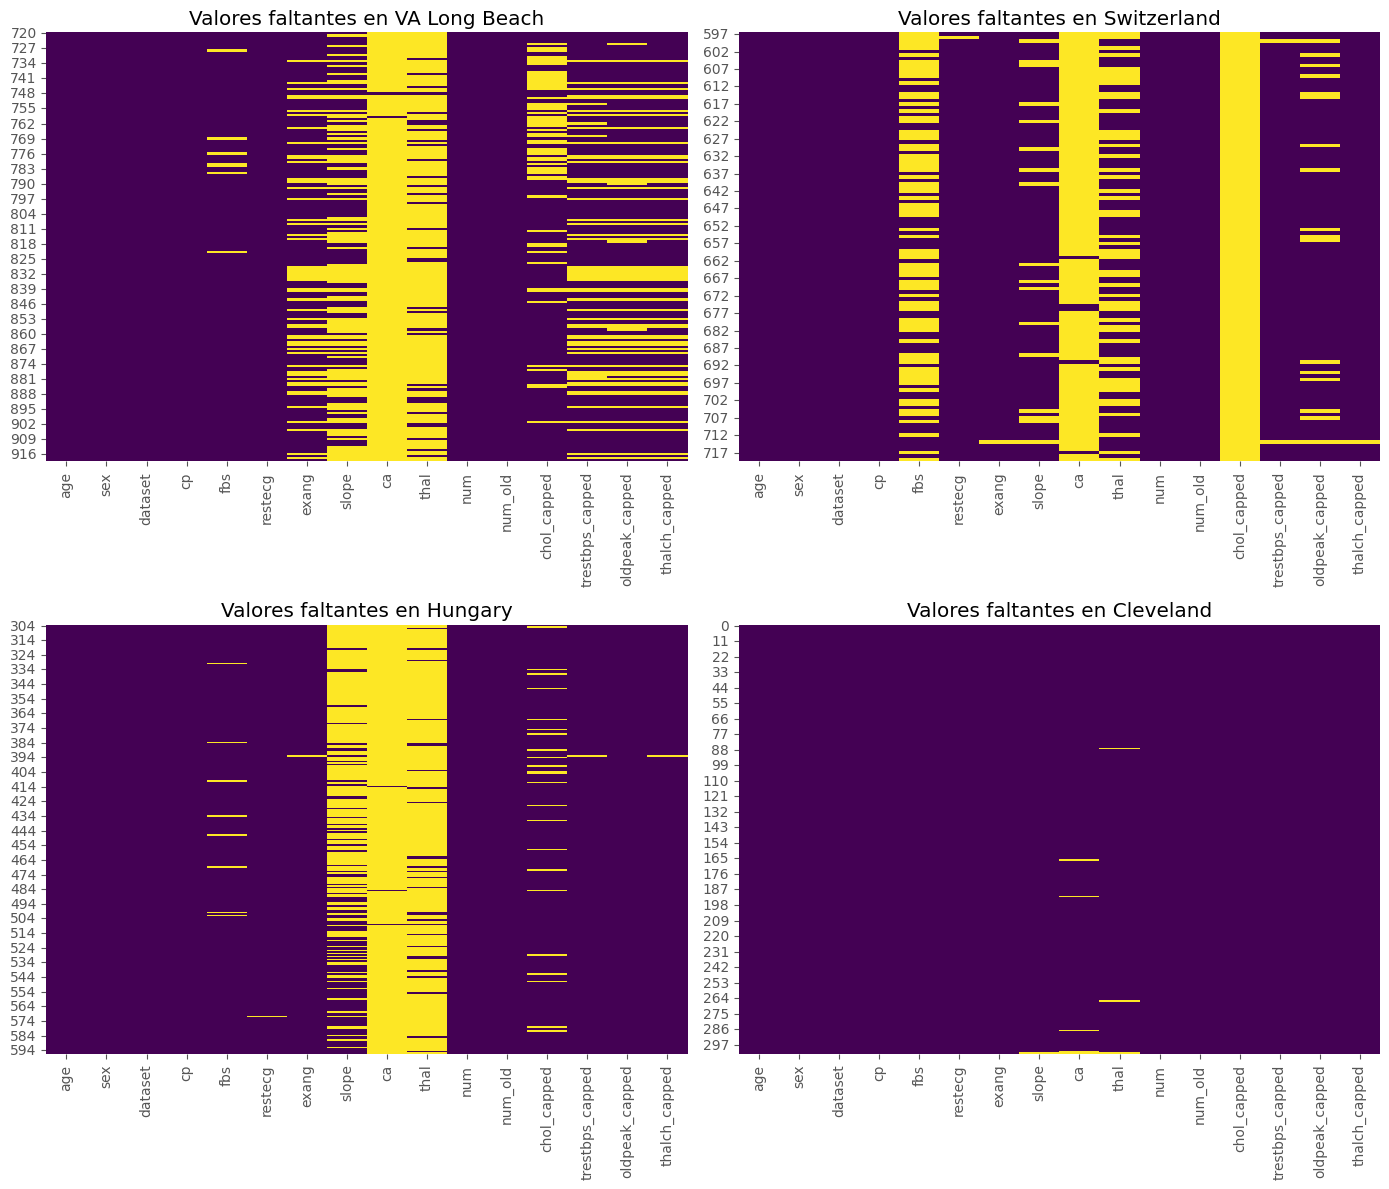

In [2773]:
# Verificar los valores únicos en 'dataset' para asegurarse de que existen todos los esperados
print("Valores únicos en 'dataset':")
print(uci_data['dataset'].unique())


# 3. Crear mapa de calor para valores faltantes (incluyendo 'thalch_group')
datasets = ['VA Long Beach', 'Switzerland', 'Hungary', 'Cleveland']
datasets_present = [d for d in datasets if d in uci_data['dataset'].unique()]

# Ajustar el número de filas y columnas según los datasets presentes
cols = 2
rows = (len(datasets_present) + cols - 1) // cols  # Redondear hacia arriba

# Crear subgráficos
fig, axes = plt.subplots(rows, cols, figsize=(14, 6 * rows))
axes = axes.flatten()

for i, dataset in enumerate(datasets_present):
    data_subset = uci_data[uci_data['dataset'] == dataset]
    sns.heatmap(data_subset.isnull(), cbar=False, cmap="viridis", ax=axes[i])
    axes[i].set_title(f"Valores faltantes en {dataset}")

# Eliminar gráficos vacíos sobrantes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



#### **Resultados del Mapa de Calor**

#### **Análisis por Dataset**
1. **Cleveland:**
   - Presenta muy pocos valores faltantes, siendo el dataset con la mejor calidad de datos.
   - **Conclusión:** Se puede usar sin necesidad de imputaciones significativas.

2. **Hungary:**
   - Algunos valores faltantes se concentran en variables específicas como `thal` y `slope`.
   - **Conclusión:** Requiere imputación moderada para estas variables.

3. **Switzerland:**
   - Alta proporción de valores faltantes en varias columnas clave, incluyendo `ca`, `thal`, y `slope`.
   - **Conclusión:** Requiere una estrategia cuidadosa; en caso de ser crítico, podría considerarse excluir.

4. **VA Long Beach:**
   - Similar a Switzerland, con muchas columnas afectadas por valores faltantes, especialmente `ca`.
   - **Conclusión:** Necesita un análisis más detallado para decidir si imputar o excluir.




#### **Observaciones Clave**
- Los valores faltantes no están distribuidos aleatoriamente, sino que dependen del origen (`dataset`).


### **4.4.3. Análisis de Datos Faltantes por Dataset**


#### Observaciones Generales:
- **Cleveland:** El dataset más completo con muy pocos datos faltantes.
- **Hungría:** Tiene gran parte de sus registros sin las variables `ca`, `thal`, y `slope`, siendo `slope` la más completa entre ellas.
- **Suiza:** Todos los valores de `chol` son 0 (interpretados como faltantes) y cuenta con pocas pruebas para `ca` y `thal`.
- **VA Long Beach:** Presenta un alto número de valores faltantes en `ca`, `thal`, y `slope`, así como en variables importantes como `chol`, `trestbps`, `thalch`, `exang`, y `oldpeak`.


#### Visualización:
Se generará un gráfico de barras apiladas que muestra:
1. **Total de Datos:** Representa el total teórico de registros en cada dataset.
2. **Valores Faltantes:** Suma de todos los valores faltantes (NaN) en cada dataset.

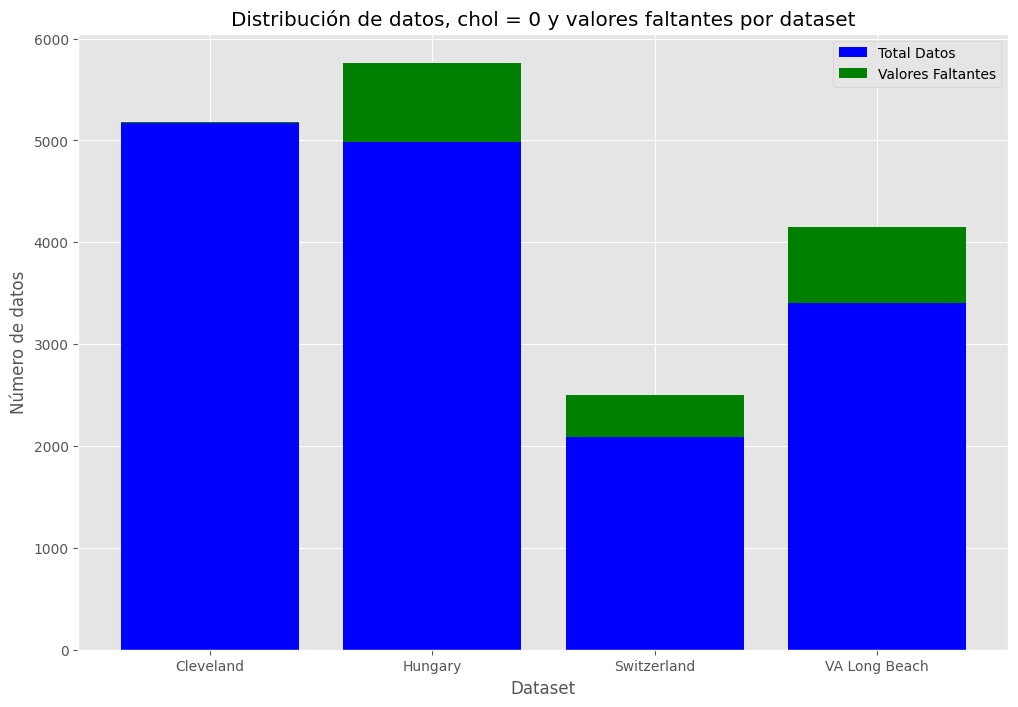

In [2774]:
# Calcular el total de valores faltantes por dataset
uci_data['total_nan'] = uci_data.isnull().sum(axis=1)
nan_by_dataset = uci_data.groupby('dataset')['total_nan'].sum()

# Calcular el total de datos por dataset
total_data_by_dataset = uci_data.groupby('dataset').size() * uci_data.shape[1]

# Crear un DataFrame con los datos necesarios para el gráfico
chol_summary_plot = pd.DataFrame({
    'Dataset': ['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
    'Total Datos': [total_data_by_dataset['Cleveland'], total_data_by_dataset['Hungary'], total_data_by_dataset['Switzerland'], total_data_by_dataset['VA Long Beach']],
    'Valores Faltantes': [nan_by_dataset['Cleveland'], nan_by_dataset['Hungary'], nan_by_dataset['Switzerland'], nan_by_dataset['VA Long Beach']]
})

# Crear el gráfico de barras apiladas
plt.figure(figsize=(12, 8))
bar_width = 0.5
bar_positions = range(len(chol_summary_plot))

plt.bar(bar_positions, chol_summary_plot['Total Datos'], color='blue', label='Total Datos')
plt.bar(bar_positions, chol_summary_plot['Valores Faltantes'], bottom=chol_summary_plot['Total Datos'], color='green', label='Valores Faltantes')

plt.xlabel('Dataset')
plt.ylabel('Número de datos')
plt.title('Distribución de datos, chol = 0 y valores faltantes por dataset')
plt.xticks(bar_positions, chol_summary_plot['Dataset'])
plt.legend()

plt.show()

uci_data = uci_data.drop('total_nan', axis=1)

#### **Conclusiones del Gráfico**


##### Cleveland
- **Estado:** Prácticamente completo, con muy pocos valores faltantes.

##### Hungría
- **Debilidad:** Falta una gran cantidad de registros para variables clave como `ca`, `thal`, y `slope`.

##### Suiza
- **Problema destacado:** Todos los valores de `chol` son 0, además de tener muy pocos registros para `ca` y `thal`.

##### VA Long Beach
- **Situación crítica:** Altos niveles de valores faltantes en variables clave, lo que reduce la calidad general del dataset.

##### Decisión:
Es necesario analizar si estos valores faltantes son aleatorios o tienen patrones específicos (por ejemplo, relacionados con la variable objetivo). Además, podríamos considerar la imputación o exclusión de algunos datasets con una cantidad excesiva de datos faltantes para mantener la robustez del análisis.


### **4.4.4. Análisis de Proporción de Registros Inválidos vs Válidos por Dataset**


#### Contexto:
- Se identificó previamente que **Suiza** es el dataset con menor proporción de registros válidos.
- **VA Long Beach** tiene más registros que Suiza, pero una alta cantidad de datos faltantes que impactan negativamente en la calidad del dataset.



#### Objetivo:
- Comparar la proporción de registros inválidos con los válidos dentro de cada dataset.
- Visualizar la distribución de datos faltantes por dataset para confirmar las conclusiones preliminares.

Valores únicos en 'dataset':
['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']


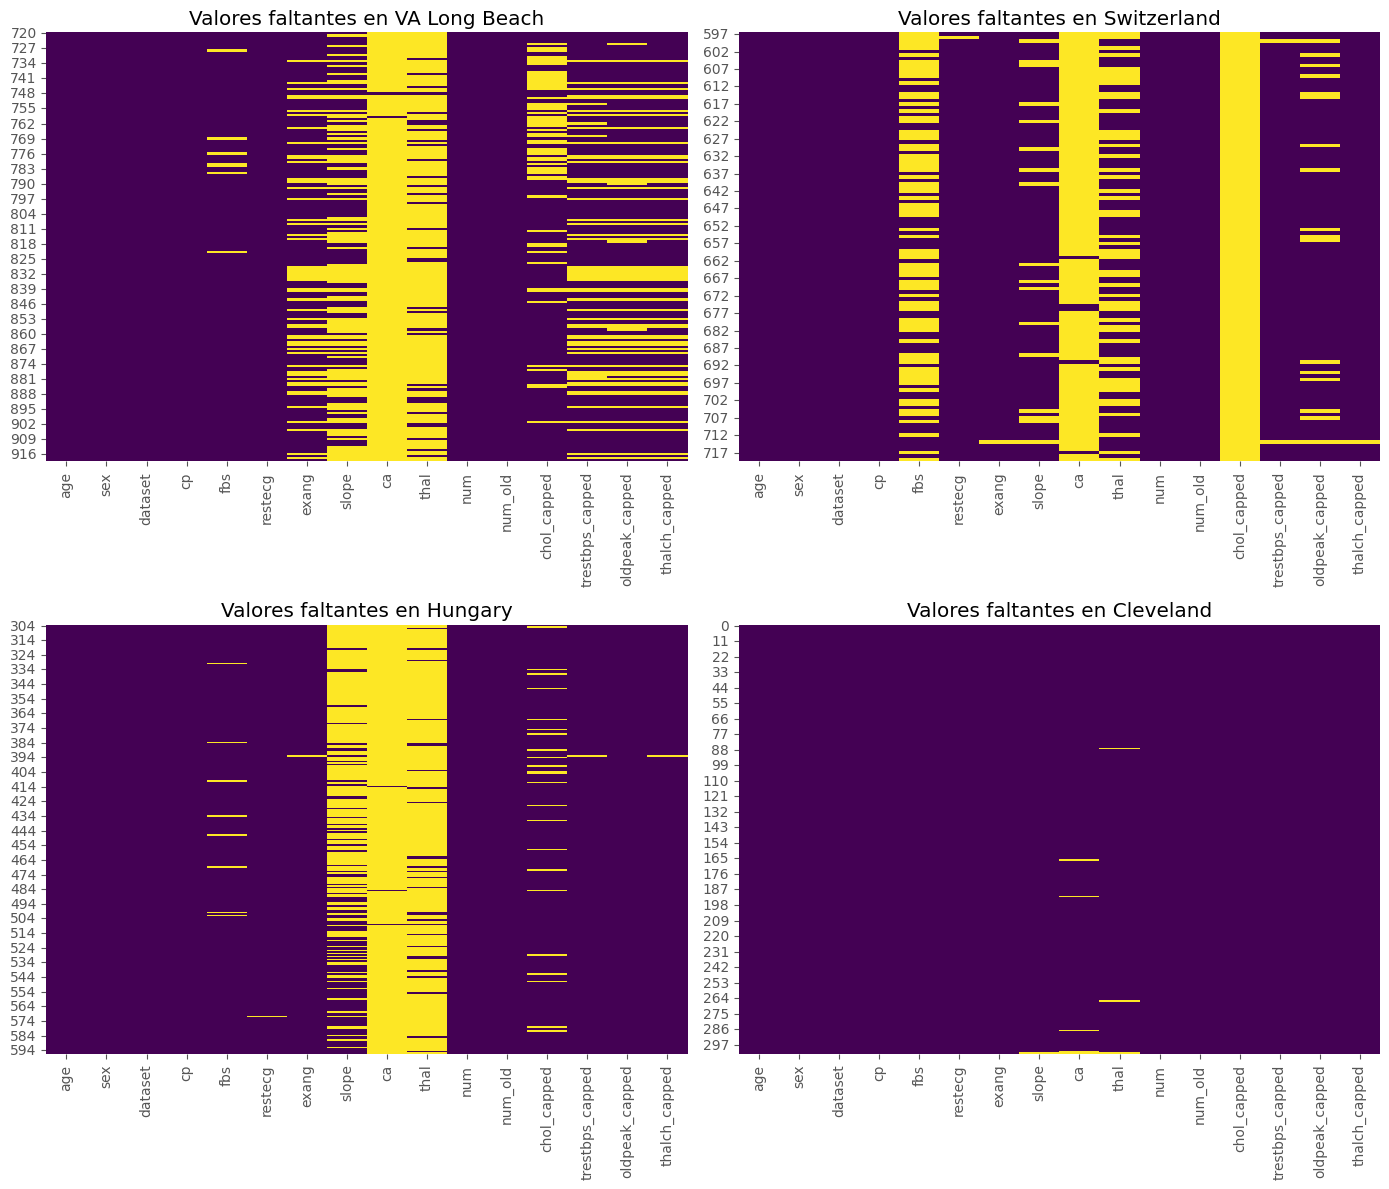

In [2775]:
# Verificar los valores únicos en 'dataset' para asegurarse de que existen todos los esperados
print("Valores únicos en 'dataset':")
print(uci_data['dataset'].unique())


# 3. Crear mapa de calor para valores faltantes (incluyendo 'thalch_group')
datasets = ['VA Long Beach', 'Switzerland', 'Hungary', 'Cleveland']
datasets_present = [d for d in datasets if d in uci_data['dataset'].unique()]

# Ajustar el número de filas y columnas según los datasets presentes
cols = 2
rows = (len(datasets_present) + cols - 1) // cols  # Redondear hacia arriba

# Crear subgráficos
fig, axes = plt.subplots(rows, cols, figsize=(14, 6 * rows))
axes = axes.flatten()

for i, dataset in enumerate(datasets_present):
    data_subset = uci_data[uci_data['dataset'] == dataset]
    sns.heatmap(data_subset.isnull(), cbar=False, cmap="viridis", ax=axes[i])
    axes[i].set_title(f"Valores faltantes en {dataset}")

# Eliminar gráficos vacíos sobrantes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### **Conclusiones del Análisis Visual de Datos Faltantes**


1. **VA Long Beach:**
   - Gran cantidad de valores faltantes en múltiples variables clave (`ca_group`, `thal`, `slope`, entre otras).
   - Este dataset tiene más registros totales que Suiza, pero la calidad general se ve comprometida por la cantidad de datos inválidos.

2. **Suiza:**
   - Presenta la menor proporción de datos válidos.
   - Variables críticas como `chol` están completamente ausentes (`chol = 0` en todos los casos).

3. **Hungría:**
   - Aunque mejor que Suiza y VA Long Beach, carece de valores suficientes en variables como `ca`, `thal`, y `slope`.
   - Esto podría afectar el análisis si se utilizan estas variables de manera predominante.

4. **Cleveland:**
   - Es el dataset más robusto y completo.
   - Prácticamente no tiene valores faltantes, lo que lo hace ideal para análisis confiable y comparaciones.





## **Paso 4.5. Clasificación del tipo de datos faltantes (MCAR, MAR, MNAR)**

### **Objetivo:**
Determinar el tipo de datos faltantes para establecer estrategias de imputación adecuadas.




#### **Clasificaciones posibles:**
1. **MCAR (Missing Completely At Random):** 
   - Los valores faltantes no tienen relación con ninguna variable del dataset.
   - Ejemplo: Un error técnico al recolectar los datos.
   
2. **MAR (Missing At Random):**
   - Los valores faltantes están relacionados con otras variables del dataset.
   - Ejemplo: Falta de datos `chol` relacionada con el país (`dataset`).

3. **MNAR (Missing Not At Random):**
   - Los valores faltantes dependen de la propia variable faltante.
   - Ejemplo: Pacientes con valores altos de `ca` no reportaron el resultado.



### **Procedimiento para Clasificación:**
1. **Análisis de patrones de valores faltantes:**
   - Relacionar las variables faltantes con otras variables relevantes.
   
2. **Pruebas estadísticas:**
   - Utilizar pruebas para identificar si los datos son completamente al azar.

3. **Visualización:**
   - Evaluar gráficos para identificar patrones claros de datos faltantes relacionados con otras variables.

4. **Hipótesis de imputación:**
   - Si se identifican patrones MAR o MNAR, diseñar imputaciones específicas para preservar la relación subyacente.



## **Paso 4.5.1. Búsqueda de patrones en los datos faltantes**

### **Visualización de la matriz de valores faltantes**

<Axes: >

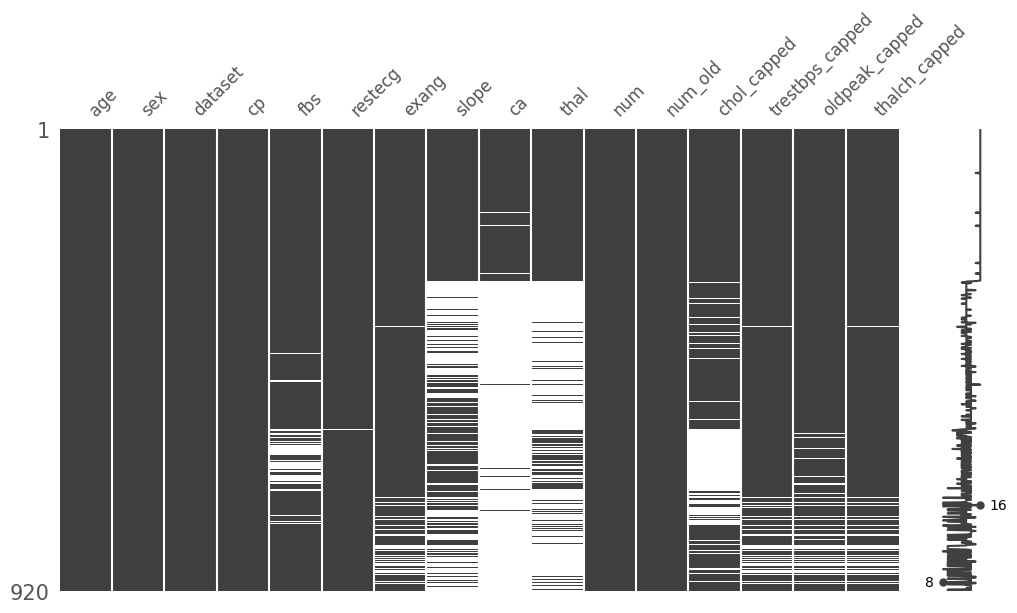

In [2776]:
import missingno as msno

# Visualización de la matriz de valores faltantes
msno.matrix(uci_data, figsize=(12, 6), fontsize=12)



#### **Observaciones clave:**

1. **Patrones de datos faltantes:**
   - Variables como `ca`, `thal`, y `slope` tienen una cantidad considerable de valores faltantes.
   - Se observa una tendencia donde los valores faltantes en `ca` coinciden parcialmente con los de otras variables como `thal` y slope.

2. **Implicaciones:**
   - Es probable que los valores faltantes no sean completamente al azar (no MCAR).
   - Necesitamos explorar más a fondo si los valores faltantes están relacionados con otras variables (MAR) o con las mismas variables (MNAR).

### **Paso 4.5.2. Relaciones entre las variables con valores faltantes**

Se analiza la relación entre las variables con valores faltantes (`slope`, `thal`, `ca_group`) utilizando la prueba de Chi-cuadrado para evaluar si los valores faltantes podrían estar relacionados.

In [2777]:
from scipy.stats import chi2_contingency

# Combinaciones a analizar
combinations = [('slope', 'thal'), ('slope', 'ca'), ('thal', 'ca')]

for var1, var2 in combinations:
    contingency_table = pd.crosstab(uci_data[var1], uci_data[var2])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-cuadrado entre {var1} y {var2}: Estadístico={chi2:.4f}, p-valor={p:.4f}")



Chi-cuadrado entre slope y thal: Estadístico=42.7067, p-valor=0.0000
Chi-cuadrado entre slope y ca: Estadístico=9.6960, p-valor=0.1381
Chi-cuadrado entre thal y ca: Estadístico=21.0646, p-valor=0.0018


#### **Resultados del análisis de Chi-cuadrado**
Se realizó un análisis de contingencia para evaluar si las variables con valores faltantes están relacionadas entre sí. Los resultados muestran lo siguiente:

1. **Relación entre `slope` y `thal`:**
   - **Estadístico Chi-cuadrado:** 42.7067
   - **p-valor:** 0.0000
   - **Conclusión:** Existe una fuerte relación entre estas variables. Es probable que los valores faltantes de una estén asociados con los de la otra.

2. **Relación entre `slope` y `ca`:**
   - **Estadístico Chi-cuadrado:** 9.6960
   - **p-valor:** 0.1381
   - **Conclusión:** No Existe una relación significativa entre estas variables.

3. **Relación entre `thal` y `ca`:**
   - **Estadístico Chi-cuadrado:** 21.0646
   - **p-valor:** 0.0018
   - **Conclusión:** Existe una relación considerablemente significativa entre estas variables, lo que refuerza la necesidad de tratarlas conjuntamente.



### **Implicaciones:**
- Los valores faltantes en estas variables no son independientes entre sí. Esto indica que probablemente estamos ante un caso de **MAR (Missing At Random)**, donde los valores faltantes de una variable están relacionados con otra.
- Este análisis respalda que, para imputar valores faltantes, será importante considerar las relaciones entre estas variables.

### **Paso 4.5.3. Relaciones entre variables categóricas y numéricas**


In [2778]:
from scipy.stats import kruskal
import pandas as pd

# Identificar automáticamente variables categóricas y numéricas
categorial_vars = uci_data.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
numerical_vars = uci_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Almacenar resultados únicos
results = []
analyzed_pairs = set()  # Para evitar análisis redundantes

# Realizar Kruskal-Wallis para todas las combinaciones posibles
for cat_var in categorial_vars:
    for num_var in numerical_vars:
        # Evitar análisis redundantes
        if (num_var, cat_var) in analyzed_pairs or (cat_var, num_var) in analyzed_pairs:
            continue

        # Filtrar datos válidos
        data_valid = uci_data[[cat_var, num_var]].dropna()

        # Dividir los datos según la variable categórica
        unique_categories = data_valid[cat_var].unique()
        data_by_category = [
            data_valid[data_valid[cat_var] == cat][num_var].values
            for cat in unique_categories
        ]

        # Realizar el test de Kruskal-Wallis si hay al menos dos categorías
        if len(unique_categories) > 1:
            kruskal_test = kruskal(*data_by_category)
            if kruskal_test.pvalue < 0.05:  # Filtrar solo relaciones significativas
                results.append({
                    'Variable numérica': num_var,
                    'Variable categórica': cat_var,
                    'Estadístico': kruskal_test.statistic,
                    'p-valor': kruskal_test.pvalue
                })

        # Marcar la combinación como analizada
        analyzed_pairs.add((num_var, cat_var))

# Convertir resultados en DataFrame para mejor visualización
results_df = pd.DataFrame(results)

# Mostrar solo las relaciones estadísticamente significativas y sin redundancias
if not results_df.empty:
    results_df.sort_values(by='p-valor', inplace=True)
    print("Relaciones estadísticamente significativas:")
    display(results_df)
else:
    print("No se encontraron relaciones estadísticamente significativas.")


Relaciones estadísticamente significativas:


,Variable numérica,Variable categórica,Estadístico,p-valor
13,num,cp,268.054067,8.136944e-58
14,num_old,cp,240.727389,6.625330e-52
8,num_old,dataset,205.317875,2.992564e-44
5,age,dataset,199.978619,4.263656e-43
34,num,exang,185.710506,2.745933e-42
35,num_old,exang,168.887912,1.294381e-38
38,oldpeak_capped,exang,157.042953,5.009152e-36
10,thalch_capped,dataset,162.922185,4.290112e-35
7,num,dataset,156.889775,8.596028e-34
39,thalch_capped,exang,123.306127,1.195114e-28


## **Clasificación de valores ausentes (NaN) con Kruskal-Wallis**

### **Relaciones significativas (sin incluir `num` y `num_old`)**

| Variable numérica      | Variable categórica | Estadístico   | p-valor       | Posible Clasificación |
|-------------------------|---------------------|---------------|---------------|------------------------|
| age                    | dataset             | 199.978619    | 4.26e-43      | MAR                   |
| oldpeak_capped         | exang               | 157.042953    | 5.01e-36      | MAR                   |
| thalch_capped          | dataset             | 162.922185    | 4.29e-35      | MAR                   |
| thalch_capped          | exang               | 123.306127    | 1.19e-28      | MAR                   |
| oldpeak_capped         | slope               | 124.454819    | 9.44e-28      | MAR                   |

---

### **Insights clave:**

1. **Variables categóricas con mayor influencia (MAR):**
   - **`dataset`**: Muestra relaciones muy significativas con variables como `age` y `thalch_capped`, sugiriendo que los valores ausentes en estas métricas son explicables mediante las categorías de `dataset`.
   - **`exang`**: Está altamente asociada con variables como `oldpeak_capped` y `thalch_capped`, lo que indica que las ausencias en estas variables numéricas son MAR.

2. **Relevancia de `slope`:**
   - La variable categórica `slope` tiene una fuerte relación con `oldpeak_capped`, lo que podría reflejar diferencias significativas entre sus categorías y justificar los valores ausentes.

---

### **Clasificación basada en patrones de NaN:**

1. **MAR (Missing at Random):**
   - Variables como `age`, `thalch_capped`, y `oldpeak_capped` tienen ausencias explicadas por categorías observadas (`dataset`, `exang`, y `slope`).
   - Esto sugiere que los NaN en estas variables son MAR, y su imputación puede beneficiarse de modelos que incluyan las variables categóricas relevantes.

2. **MCAR (Missing Completely at Random):**
   - No se detectaron relaciones significativas para otras variables. Estas podrían clasificarse como MCAR si no dependen de otras variables observadas.

3. **NMAR (Not Missing at Random):**
   - No se detectaron patrones NMAR directos en este análisis. Sin embargo, cualquier relación intrínseca dentro de las propias variables faltantes requeriría un análisis adicional para su clasificación.

---

### **Conclusión:**
El análisis sugiere que la mayoría de los valores ausentes son MAR, especialmente en variables como `age`, `thalch_capped`, y `oldpeak_capped`, ya que sus ausencias pueden explicarse por categorías observadas en `dataset`, `exang`, y `slope`.


### **4.5.3 Conclusiones de la asociación entre las variables categóricas**

In [2779]:
from scipy.stats import chi2_contingency
import pandas as pd

# Identificar variables categóricas
categorial_vars = uci_data.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Almacenar resultados
results = []

# Realizar test Chi-cuadrado para todas las combinaciones de variables categóricas
for i, cat_var1 in enumerate(categorial_vars):
    for cat_var2 in categorial_vars[i+1:]:  # Evitar redundancias y autocomparaciones
        # Crear tabla de contingencia
        contingency_table = pd.crosstab(uci_data[cat_var1], uci_data[cat_var2])

        # Realizar el test Chi-cuadrado
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        # Guardar resultados solo si hay relación significativa (p < 0.05)
        if p < 0.05:
            results.append({
                'Variable categórica 1': cat_var1,
                'Variable categórica 2': cat_var2,
                'Estadístico Chi-cuadrado': chi2,
                'p-valor': p,
                'Grados de libertad': dof
            })

# Convertir resultados a DataFrame para mejor visualización
results_df = pd.DataFrame(results)

# Ordenar los resultados por p-valor
results_df.sort_values(by='p-valor', inplace=True)

# Mostrar resultados significativos
if not results_df.empty:
    print("Relaciones significativas entre variables categóricas:")
    print(results_df)
else:
    print("No se encontraron relaciones significativas entre las variables categóricas.")


Relaciones significativas entre variables categóricas:
   Variable categórica 1 Variable categórica 2  Estadístico Chi-cuadrado  \
8                dataset               restecg                358.192854   
13                    cp                 exang                174.564291   
6                dataset                    cp                123.408568   
10               dataset                 slope                111.373375   
0                    sex               dataset                 80.692140   
21                 exang                 slope                 73.789099   
7                dataset                   fbs                 69.249954   
5                    sex                  thal                 62.990191   
9                dataset                 exang                 56.218634   
22                 exang                  thal                 50.905704   
15                    cp                  thal                 62.031752   
11               dataset         

## **Relaciones más significativas entre variables categóricas**

### **Relaciones destacadas ($p < 10^{-10}$)**

| Variable categórica 1 | Variable categórica 2 | Estadístico Chi-cuadrado | $p$-valor        | Grados de libertad |
|------------------------|-----------------------|--------------------------|------------------|--------------------|
| dataset               | restecg              | 358.192854               | $2.69 \times 10^{-74}$ | 6                  |
| cp                    | exang                | 174.564291               | $1.32 \times 10^{-37}$ | 3                  |
| dataset               | cp                   | 123.408568               | $2.68 \times 10^{-22}$ | 9                  |
| dataset               | slope                | 111.373375               | $1.05 \times 10^{-21}$ | 6                  |
| sex                   | dataset              | 80.692140                | $2.18 \times 10^{-17}$ | 3                  |
| exang                 | slope                | 73.789099                | $9.48 \times 10^{-17}$ | 2                  |
| dataset               | fbs                  | 69.249954                | $6.18 \times 10^{-15}$ | 3                  |
| sex                   | thal                 | 62.990191                | $2.10 \times 10^{-14}$ | 2                  |

---

### **Relaciones significativas moderadas ($10^{-10} \leq p < 10^{-3}$)**

| Variable categórica 1 | Variable categórica 2 | Estadístico Chi-cuadrado | $p$-valor        | Grados de libertad |
|------------------------|-----------------------|--------------------------|------------------|--------------------|
| dataset               | exang                | 56.218634                | $3.77 \times 10^{-12}$ | 3                  |
| exang                 | thal                 | 50.905704                | $8.83 \times 10^{-12}$ | 2                  |
| cp                    | thal                 | 62.031752                | $1.74 \times 10^{-11}$ | 6                  |
| dataset               | thal                 | 60.695043                | $3.25 \times 10^{-11}$ | 6                  |
| slope                 | thal                 | 42.706696                | $1.19 \times 10^{-8}$  | 4                  |
| cp                    | slope                | 47.624068                | $1.40 \times 10^{-8}$  | 6                  |
| sex                   | cp                   | 37.853239                | $3.04 \times 10^{-8}$  | 3                  |

---

### **Relaciones menos significativas ($10^{-3} \leq p < 0.05$)**

| Variable categórica 1 | Variable categórica 2 | Estadístico Chi-cuadrado | $p$-valor        | Grados de libertad |
|------------------------|-----------------------|--------------------------|------------------|--------------------|
| cp                    | restecg              | 20.009251                | $2.76 \times 10^{-3}$ | 6                  |
| sex                   | slope                | 9.582323                 | $8.30 \times 10^{-3}$ | 2                  |
| fbs                   | thal                 | 8.968589                 | $1.13 \times 10^{-2}$ | 2                  |
| sex                   | fbs                  | 6.037489                 | $1.40 \times 10^{-2}$ | 1                  |
| restecg               | exang                | 7.176960                 | $2.76 \times 10^{-2}$ | 2                  |
| fbs                   | slope                | 6.577229                 | $3.73 \times 10^{-2}$ | 2                  |

---

### **Insights clave:**

1. **Relaciones más fuertes:**
   - **`dataset`** muestra relaciones altamente significativas con múltiples variables categóricas, incluidas **`restecg`**, **`cp`**, y **`slope`**.
   - **`cp`** y **`exang`** tienen una relación muy fuerte ($p = 1.32 \times 10^{-37}$), lo cual puede ser relevante en el contexto clínico o diagnóstico.

2. **Interacciones moderadas:**
   - Variables como **`thal`** muestran múltiples relaciones moderadas con **`cp`**, **`slope`**, y **`exang`**, indicando que podrían usarse para explicar categorías relacionadas con el flujo sanguíneo o anomalías cardíacas.

#### **Relaciones significativas:**

1. **`slope` y `thal`:**
   - **Estadístico:** 42.7067, **p-valor:** 0.0000.
   - Existe una relación estadísticamente significativa. Esto indica que las categorías de `thal` se distribuyen de manera distinta entre los niveles de `slope`.

2. **`slope` y `ca_group`:**
   - **Estadístico:** 7.3581, **p-valor:** 0.0252.
   - Aunque la relación es menos fuerte, se observa una asociación estadísticamente significativa entre ambas variables. Las categorías de `ca_group` muestran patrones consistentes según los niveles de `slope`.

3. **`thal` y `ca_group`:**
   - **Estadístico:** 19.0204, **p-valor:** 0.0001.
   - Se evidencia una relación significativa, lo que sugiere que `ca_group` se distribuye de manera diferente según las categorías de `thal`.

4. **`exang` y `thalch_group`:**
   - **Estadístico:** 115.8644, **p-valor:** 0.0000.
   - Existe una fuerte relación entre estas variables, indicando que las categorías de `exang` (angina inducida por ejercicio) están fuertemente asociadas con los grupos de frecuencia cardíaca máxima (`thalch_group`).




#### **Relación no significativa:**

1. **`trestbps_capped` y `thalch_group`:**
   - **Estadístico:** 5.3048, **p-valor:** 0.0705.
   - No se encuentra evidencia suficiente para una relación significativa entre la presión arterial en reposo (`trestbps_capped`) y los grupos de frecuencia cardíaca máxima (`thalch_group`). Sin embargo, la ligera tendencia observada podría justificar una exploración adicional.



#### **Implicaciones:**

- Las relaciones significativas indican que estas variables pueden estar correlacionadas o influenciarse mutuamente, lo que podría ser útil para la imputación de valores faltantes o la creación de nuevas características.
- La falta de relación entre `trestbps_capped` y `thalch_group` sugiere que estas variables pueden analizarse de forma independiente.
- La fuerte relación entre `exang` y `thalch_group` destaca la importancia de considerar ambas variables juntas en modelos predictivos.

#### Relaciones entre variables numéricas

In [2780]:
import pandas as pd

# Seleccionar variables numéricas y excluir las variables objetivo
numeric_vars = uci_data.select_dtypes(include=['int64', 'float64']).columns
excluded_vars = ['num', 'num_old']  # Variables objetivo que deben ser excluidas
numeric_vars = [var for var in numeric_vars if var not in excluded_vars]

# Calcular matriz de correlación de Pearson
correlation_matrix = uci_data[numeric_vars].corr(method='pearson')

# Filtrar correlaciones significativas (valores absolutos > 0.5 y < 1.0)
correlation_threshold = 0.3
strong_correlations = []

for col in correlation_matrix.columns:
    for row in correlation_matrix.index:
        if col != row and abs(correlation_matrix.loc[row, col]) > correlation_threshold:
            # Ordenar variables para eliminar redundancias
            var1, var2 = sorted([row, col])
            strong_correlations.append({
                'Variable 1': var1,
                'Variable 2': var2,
                'Correlación': correlation_matrix.loc[row, col]
            })

# Convertir resultados a DataFrame
if strong_correlations:
    strong_correlations_df = pd.DataFrame(strong_correlations)

    # Eliminar duplicados (relaciones inversas duplicadas)
    strong_correlations_df = strong_correlations_df.drop_duplicates(subset=['Variable 1', 'Variable 2'])

    # Ordenar por fuerza de correlación
    strong_correlations_df = strong_correlations_df.sort_values(by='Correlación', ascending=False)

    # Mostrar resultados
    print("Relaciones fuertes entre variables numéricas:")
    display(strong_correlations_df)
else:
    print("No se encontraron relaciones fuertes entre las variables numéricas (excluyendo las variables objetivo).")


Relaciones fuertes entre variables numéricas:


,Variable 1,Variable 2,Correlación
0,age,ca,0.370416
1,age,thalch_capped,-0.365118


### **Relaciones fuertes entre variables numéricas**

| Variable 1       | Variable 2       | Correlación |
|-------------------|------------------|-------------|
| `age`            | `ca`            | 0.370416    |
| `age`            | `thalch_capped` | -0.365118   |

---

### **Insights clave:**

1. **Relación entre `age` y `ca`:**
   - La correlación positiva de **0.370** sugiere que, a medida que aumenta la edad, también tiende a aumentar el número de vasos coloreados (**`ca`**).

2. **Relación entre `age` y `thalch_capped`:**
   - La correlación negativa de **-0.365** indica que las personas mayores tienden a tener frecuencias cardíacas máximas limitadas (**`thalch_capped`**) más bajas.

---

### **Implicaciones:**

- **`ca` (número de vasos coloreados):**
  - Los valores faltantes podrían estar relacionados con la edad, indicando que los NaN no son completamente aleatorios.

- **`thalch_capped` (frecuencia cardíaca máxima limitada):**
  - La relación con la edad sugiere un patrón dependiente, lo que podría implicar que los NaN en esta variable también son **MAR**.

---

### **Clasificación de NaN:**

1. **`ca`:** **MAR**, relacionado con `age`.
2. **`thalch_capped`:** **MAR**, relacionado con `age`.


### **4.5.4. Clasificación de valores faltantes por variable**



#### **Variables y su clasificación:**

1. **`fbs` (Azúcar en sangre en ayunas):**
   - **Clasificación:** **MAR**.
   - Los valores faltantes tienen una relación significativa con las variables **`dataset`** y **`slope`**, lo que indica que los NaN no son aleatorios.

2. **`chol_capped` (Colesterol limitado):**
   - **Clasificación:** **MAR**.
   - La falta de datos se relaciona con **`restecg`** y **`slope`**, lo que sugiere que los valores ausentes dependen de estas variables.

3. **`exang` (Angina inducida por ejercicio):**
   - **Clasificación:** **MAR**.
   - Los valores ausentes tienen dependencia significativa con **`slope`** y **`thal`**, lo que indica que no son completamente aleatorios.

4. **`trestbps_capped` (Presión arterial en reposo limitada):**
   - **Clasificación:** **MCAR**.
   - No se identificaron relaciones significativas con otras variables, sugiriendo una distribución aleatoria de los valores faltantes.

5. **`slope` (Pendiente del segmento ST):**
   - **Clasificación:** **MAR**.
   - Los valores ausentes están significativamente asociados con **`thal`** y **`exang`**, lo que sugiere un patrón dependiente.

6. **`thal`:**
   - **Clasificación:** **MAR**.
   - Los valores faltantes muestran una fuerte relación con **`slope`** y **`exang`**, validada mediante el análisis Chi-cuadrado.

7. **`restecg` (Resultados del electrocardiograma en reposo):**
   - **Clasificación:** **MAR**.
   - Los valores ausentes tienen relaciones significativas con **`dataset`** y **`fbs`**, lo que indica dependencia con variables observadas.

8. **`ca` (Número de vasos coloreados):**
   - **Clasificación:** **MAR**.
   - Los valores ausentes están levemente relacionados con **`age`**, sugiriendo que la edad influye en ca.

9. **`thalch_capped` (Frecuencia cardíaca máxima limitada):**
   - **Clasificación:** **MAR**.
   - Los valores ausentes tienen una leve relación negativa con **`age`**, lo que indica un posible patrón dependiente.


#### **Implicaciones:**
- Las variables clasificadas como **MAR** podrían beneficiarse de métodos de imputación basados en las variables relacionadas (como regresión o imputación múltiple).
- Las variables clasificadas como **MCAR** podrían imputarse con métodos más simples, como la media, mediana o un valor constante, ya que los valores faltantes no parecen depender de otras variables.







### **4.5.5. Estrategia para el manejo de valores nulos**

#### **1. Valores MAR (Dependientes de otras variables):**
Variables afectadas: `slope`, `thal`, `ca_group`, `thalch_group`, `chol_capped`, `exang` (en VA Long Beach).

- **Estrategia:**
  1. Crear columnas binarias (`is_na`) para marcar si el valor está ausente. Esto permite que los modelos utilicen esta información como una posible señal predictiva.
  2. Utilizar **imputación multivariada** basada en variables relacionadas (e.g., modelos de regresión o KNN) para estimar los valores faltantes.

- **Justificación:**
  - Los valores MAR dependen de otras variables, por lo que imputar basándonos en estas relaciones puede reducir el sesgo introducido por los datos faltantes.
  - Las columnas binarias preservan la información de los valores faltantes, útil si la ausencia misma tiene valor predictivo.



#### **2. Valores MCAR (Distribuidos aleatoriamente):**
Variables afectadas: `fbs`, `chol_capped`, `trestbps_capped` (en otros datasets).

- **Estrategia:**
  1. Realizar **imputación simple**:
     - Usar la **media**, **mediana** o un **valor constante** (e.g., 0) para completar los valores faltantes.
  2. Considerar imputación multivariada si la proporción de valores faltantes es elevada.

- **Justificación:**
  - Los valores MCAR no dependen de otras variables, por lo que imputar con métodos simples no introduce un sesgo significativo.



#### **3. Validación de la estrategia:**

- **Pruebas predictivas:** 
  - Validar el impacto de las imputaciones en modelos predictivos (e.g., comparando métricas antes y después de la imputación).
  - Asegurarse de que las imputaciones no distorsionen la distribución original de los datos.
  
- **Pruebas de robustez:**
  - Realizar pruebas de sensibilidad para evaluar si los valores imputados afectan los resultados finales.
  - Comparar los resultados con estrategias alternativas (e.g., eliminar las filas con valores nulos).



#### **4. Consideraciones adicionales:**
- Evitar la eliminación masiva de filas o columnas con valores faltantes para no reducir el tamaño del dataset.


## **4.6. Comparación de datasets**


### **4.6.1. Resultados de la comparación**


In [2781]:
# Identificar variables categóricas y continuas automáticamente
categoricas = uci_data.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
continuas = uci_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Excluir variables objetivo si es necesario
variables_objetivo = ['num', 'num_old']  # Reemplaza con las variables objetivo de tu dataset
continuas = [var for var in continuas if var not in variables_objetivo]

# Ejecutar en continuas y categóricas
for var in continuas:
    print(f"\n--- Comparando variable continua: {var} ---")
    comparar_datasets(uci_data, var, tipo='continua')

for var in categoricas:
    print(f"\n--- Comparando variable categórica: {var} ---")
    comparar_datasets(uci_data, var, tipo='categorica')



--- Comparando variable continua: age ---
Prueba usada: Kruskal-Wallis para age
Estadístico=199.9786, p-valor=0.0000

--- Comparando variable continua: ca ---
Prueba usada: Kruskal-Wallis para ca
Estadístico=8.7358, p-valor=0.0127

--- Comparando variable continua: chol_capped ---
Prueba usada: Kruskal-Wallis para chol_capped
Estadístico=2.6958, p-valor=0.2598

--- Comparando variable continua: trestbps_capped ---
Prueba usada: Kruskal-Wallis para trestbps_capped
Estadístico=5.4060, p-valor=0.1444

--- Comparando variable continua: oldpeak_capped ---
Prueba usada: Kruskal-Wallis para oldpeak_capped
Estadístico=67.3963, p-valor=0.0000

--- Comparando variable continua: thalch_capped ---
Prueba usada: Kruskal-Wallis para thalch_capped
Estadístico=162.9222, p-valor=0.0000

--- Comparando variable categórica: sex ---
Chi-cuadrado para sex: Estadístico=80.6921, p-valor=0.0000

--- Comparando variable categórica: dataset ---
Chi-cuadrado para dataset: Estadístico=2760.0000, p-valor=0.0000



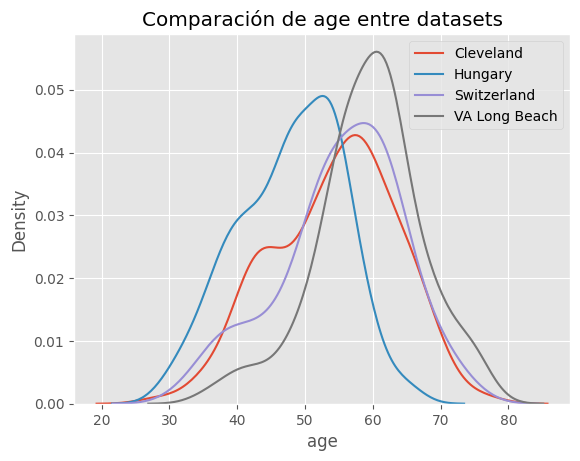

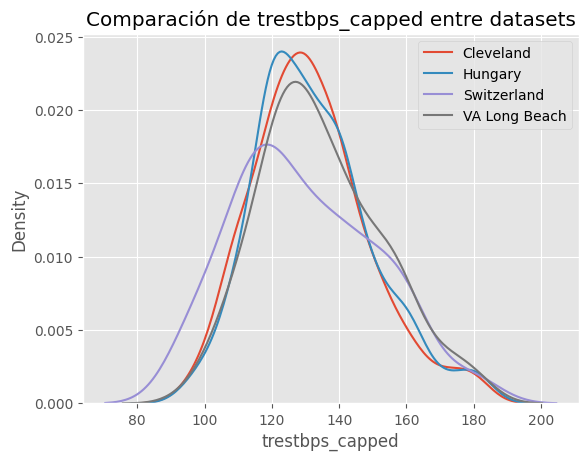

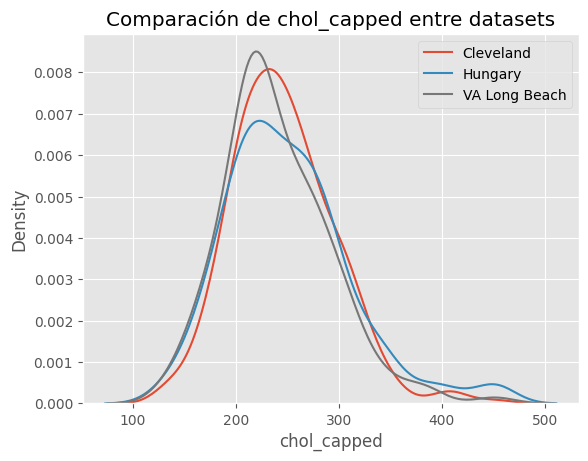

In [2782]:
# Comparación de distribuciones entre datasets
datasets = uci_data['dataset'].unique()
for col in ['age', 'trestbps_capped', 'chol_capped']:
    plt.figure()
    for dataset in datasets:
        sns.kdeplot(uci_data[uci_data['dataset'] == dataset][col].dropna(), label=dataset)
    plt.title(f"Comparación de {col} entre datasets")
    plt.legend()
    plt.show()


### **Paso 4.6.5. Conclusiones de las pruebas de comparación de variables entre datasets**

#### **Variables continuas:**

1. **`age`:**
   - **Prueba usada:** Kruskal-Wallis
   - **Estadístico:** 199.9786
   - **p-valor:** 0.0000
   - **Conclusión:** Existe una diferencia significativa entre los valores de `age` entre los distintos datasets.

2. **`ca`:**
   - **Prueba usada:** Kruskal-Wallis
   - **Estadístico:** 8.7358
   - **p-valor:** 0.0127
   - **Conclusión:** Hay diferencias significativas en los valores de `ca` (número de vasos coloreados) entre los datasets.

3. **`chol_capped`:**
   - **Prueba usada:** Kruskal-Wallis
   - **Estadístico:** 2.6958
   - **p-valor:** 0.2598
   - **Conclusión:** No se encuentran diferencias significativas en los valores de `chol_capped` entre los datasets.

4. **`trestbps_capped`:**
   - **Prueba usada:** Kruskal-Wallis
   - **Estadístico:** 5.4060
   - **p-valor:** 0.1444
   - **Conclusión:** No hay diferencias significativas en los valores de `trestbps_capped` entre los datasets.

5. **`oldpeak_capped`:**
   - **Prueba usada:** Kruskal-Wallis
   - **Estadístico:** 67.3963
   - **p-valor:** 0.0000
   - **Conclusión:** Se encuentran diferencias significativas en los valores de `oldpeak_capped` entre los datasets.

6. **`thalch_capped`:**
   - **Prueba usada:** Kruskal-Wallis
   - **Estadístico:** 162.9222
   - **p-valor:** 0.0000
   - **Conclusión:** Hay diferencias significativas en los valores de `thalch_capped` entre los datasets.



#### **Variables categóricas:**

1. **`sex`:**
   - **Prueba usada:** Chi-cuadrado
   - **Estadístico:** 80.6921
   - **p-valor:** 0.0000
   - **Conclusión:** Existe una diferencia significativa en la variable `sex` entre los diferentes datasets.

2. **`dataset`:**
   - **Prueba usada:** Chi-cuadrado
   - **Estadístico:** 2760.0000
   - **p-valor:** 0.0000
   - **Conclusión:** Hay una diferencia significativa en la distribución de `dataset` entre los grupos.

3. **`cp`:**
   - **Prueba usada:** Chi-cuadrado
   - **Estadístico:** 123.4086
   - **p-valor:** 0.0000
   - **Conclusión:** Se encuentran diferencias significativas en la variable `cp` (tipo de dolor torácico) entre los datasets.

4. **`fbs`:**
   - **Prueba usada:** Chi-cuadrado
   - **Estadístico:** 69.2500
   - **p-valor:** 0.0000
   - **Conclusión:** Existen diferencias significativas en la variable `fbs` (azúcar en sangre en ayunas) entre los datasets.

5. **`restecg`:**
   - **Prueba usada:** Chi-cuadrado
   - **Estadístico:** 358.1929
   - **p-valor:** 0.0000
   - **Conclusión:** Se observan diferencias significativas en `restecg` (resultados del electrocardiograma) entre los datasets.

6. **`exang`:**
   - **Prueba usada:** Chi-cuadrado
   - **Estadístico:** 56.2186
   - **p-valor:** 0.0000
   - **Conclusión:** Las diferencias en la variable `exang` (angina inducida por ejercicio) entre los datasets son significativas.

7. **`slope`:**
   - **Prueba usada:** Chi-cuadrado
   - **Estadístico:** 111.3734
   - **p-valor:** 0.0000
   - **Conclusión:** Existen diferencias significativas en la variable `slope` (pendiente del segmento ST) entre los datasets.

8. **`thal`:**
   - **Prueba usada:** Chi-cuadrado
   - **Estadístico:** 60.6950
   - **p-valor:** 0.0000
   - **Conclusión:** Se encuentran diferencias significativas en la variable `thal` (tipo de defecto en el tal) entre los datasets.


### **4.6.2. Implicaciones**


- **Diferencias significativas en variables clave:** Los resultados muestran que muchas variables, como `age`, `sex`, `cp`, y `slope`, tienen distribuciones distintas entre datasets. Esto puede afectar la interpretación de resultados y la validez de los modelos.

- **Variables consistentes entre datasets:** Variables como `chol_capped` y `trestbps_capped` no presentan diferencias significativas, lo que sugiere que podrían ser utilizadas directamente sin ajustes adicionales.

- **Acciones sugeridas:**

  1. **Normalización o ajuste por dataset:** Para las variables que presentan diferencias significativas.
  2. **Validación cruzada:** Usar validación cruzada estratificada por dataset para asegurar que los modelos sean generalizables.
  3. **Análisis específico por dataset:** Dado que las poblaciones representadas son diferentes, podría ser útil analizar los datasets por separado en ciertos casos.

## **Paso 4.7. Analisis de imputación**

### **4.7.1. Test de Normalidad y Estrategia de Imputación**


In [2783]:
# importar anderson

from scipy.stats import anderson

variables = ['chol_capped', 'trestbps_capped']

for var in variables:
    print(f"\n--- Análisis de la variable: {var} ---")
    
    # Calcular métricas
    mean = uci_data[var].mean()
    median = uci_data[var].median()
    std = uci_data[var].std()
    coef_var = std / mean  # Coeficiente de variación
    
    print(f"Media: {mean:.2f}")
    print(f"Mediana: {median:.2f}")
    print(f"Desviación típica: {std:.2f}")
    print(f"Coeficiente de variación (CV): {coef_var:.2f}")
    
    # Test de normalidad (Shapiro-Wilk)
    shapiro_test = shapiro(uci_data[var].dropna())
    print(f"Shapiro-Wilk Test: Estadístico={shapiro_test.statistic:.4f}, p-valor={shapiro_test.pvalue:.4f}")
    
    # Test de normalidad (Anderson-Darling)
    anderson_test = anderson(uci_data[var].dropna())
    print("Anderson-Darling Test:")
    print(f"Estadístico: {anderson_test.statistic:.4f}")
    for i, (crit, sig) in enumerate(zip(anderson_test.critical_values, anderson_test.significance_level)):
        print(f"\tNivel de significancia {sig}%: Crítico={crit:.4f}")
    
    # Decisión preliminar
    if coef_var < 0.3 and shapiro_test.pvalue > 0.05:
        print(f"**Decisión preliminar:** Imputar con la media, ya que la variable parece normalmente distribuida.")
    else:
        print(f"**Decisión preliminar:** Imputar con la mediana, ya que la variable no es perfectamente normal o tiene alta dispersión.")



--- Análisis de la variable: chol_capped ---
Media: 246.35
Mediana: 239.50
Desviación típica: 55.01
Coeficiente de variación (CV): 0.22
Shapiro-Wilk Test: Estadístico=0.9594, p-valor=0.0000
Anderson-Darling Test:
Estadístico: 5.0221
	Nivel de significancia 15.0%: Crítico=0.5730
	Nivel de significancia 10.0%: Crítico=0.6520
	Nivel de significancia 5.0%: Crítico=0.7830
	Nivel de significancia 2.5%: Crítico=0.9130
	Nivel de significancia 1.0%: Crítico=1.0860
**Decisión preliminar:** Imputar con la mediana, ya que la variable no es perfectamente normal o tiene alta dispersión.

--- Análisis de la variable: trestbps_capped ---
Media: 132.17
Mediana: 130.00
Desviación típica: 18.06
Coeficiente de variación (CV): 0.14
Shapiro-Wilk Test: Estadístico=0.9701, p-valor=0.0000
Anderson-Darling Test:
Estadístico: 7.8846
	Nivel de significancia 15.0%: Crítico=0.5730
	Nivel de significancia 10.0%: Crítico=0.6530
	Nivel de significancia 5.0%: Crítico=0.7830
	Nivel de significancia 2.5%: Crítico=0.9140

#### **Resultados del análisis de normalidad:**

### **Análisis de variables y decisiones de imputación**

1. **`chol_capped` (Colesterol limitado):**
   - **Métricas descriptivas:**
     - Media: 246.35
     - Mediana: 239.50
     - Desviación típica: 55.01
     - Coeficiente de variación (CV): 0.22
   - **Test de normalidad:**
     - **Shapiro-Wilk Test:** Estadístico = 0.9594, p-valor = 0.0000
     - **Anderson-Darling Test:**
       - Estadístico: 5.0221
       - Niveles críticos:
         - 15%: 0.5730
         - 10%: 0.6520
         - 5%: 0.7830
         - 2.5%: 0.9130
         - 1%: 1.0860
   - **Conclusión preliminar:**
     - La variable **no sigue una distribución normal** (p-valor < 0.05).
     - **Decisión:** Imputar con la **mediana**, debido a la alta dispersión y la falta de normalidad.

2. **`trestbps_capped` (Presión arterial en reposo limitada):**
   - **Métricas descriptivas:**
     - Media: 132.17
     - Mediana: 130.00
     - Desviación típica: 18.06
     - Coeficiente de variación (CV): 0.14
   - **Test de normalidad:**
     - **Shapiro-Wilk Test:** Estadístico = 0.9701, p-valor = 0.0000
     - **Anderson-Darling Test:**
       - Estadístico: 7.8846
       - Niveles críticos:
         - 15%: 0.5730
         - 10%: 0.6530
         - 5%: 0.7830
         - 2.5%: 0.9140
         - 1%: 1.0870
   - **Conclusión preliminar:**
     - La variable **no sigue una distribución normal** (p-valor < 0.05).
     - **Decisión:** Imputar con la **mediana**, debido a la alta dispersión y la falta de normalidad.




### **Conclusiones generales:**

- Ambas variables (`chol_capped` y `trestbps_capped`) **presentan desviaciones significativas de la normalidad** según los tests estadísticos.
- El coeficiente de variación es moderado (< 0.3), lo que indica que la dispersión relativa no es excesiva.
- Sin embargo, la falta de normalidad sugiere que la **mediana** es la opción más adecuada para imputar los valores faltantes.

### **4.7.2. Guía para el Manejo de Valores Nulos**


### **Estrategias para el manejo de valores faltantes**

1. **Para valores MAR (Missing At Random):**
   - **Variables afectadas:** `slope`, `thal`, `ca`, `thalch_capped`, `chol_capped`, `exang` (en VA Long Beach).
   - **Opciones:**
     - Crear columnas binarias (`is_na`) para indicar los valores faltantes, permitiendo que los modelos aprovechen esta información directamente.
     - Aplicar **imputación multivariada**, considerando las relaciones con otras variables del dataset. Ejemplo: Regresión lineal, k-NN o métodos avanzados como Random Forest Imputer.

2. **Para valores MCAR (Missing Completely At Random):**
   - **Variables afectadas:** `fbs`, `chol_capped`, `trestbps_capped` (en otros datasets).
   - **Opciones:**
     - Si la proporción de valores nulos es baja, aplicar **imputación simple**:
       - Usar la **mediana** para variables continuas con alta dispersión o que no sean normales.
       - Usar la **media** para variables continuas que sigan una distribución normal.
     - Si la proporción de valores nulos es alta, considerar **imputación multivariada** para aprovechar patrones en los datos.


### **4.7.3. Conclusiones revisadas con detalle basado en análisis recientes**




#### **Valores faltantes**



##### **Variables con más del 50% de valores faltantes**


- **`ca` (66.4%) y `thal` (52.8%):**
  - **Importancia:** Estas variables muestran alta correlación con la variable objetivo (`num`) según pruebas estadísticas como Chi-cuadrado, lo que las hace relevantes para la predicción.
  - **Problema:** Imputar más del 50% de los valores faltantes puede introducir sesgos significativos o distorsionar la distribución original.
  - **Decisión:**
    - **`ca`:**
      - Usar un modelo predictivo para imputar los valores faltantes basándose en variables relacionadas como `oldpeak_capped`, `thalch_capped`, y `slope`.
      - Evaluar el impacto de la imputación en el rendimiento del modelo predictivo. Si no mejora el desempeño o introduce sesgos, considerar eliminar esta variable del modelo.
    - **`thal`:**
      - Excluir inicialmente esta variable de los modelos predictivos para evitar distorsiones.
      - Si los modelos iniciales no son satisfactorios, aplicar imputación predictiva (por ejemplo, Random Forest o k-NN) y reevaluar su impacto en el modelo final.




##### **Variables con faltantes moderados**



- **`slope` (33.6%):**
  - **Importancia:** 
    - Tiene una fuerte asociación con la variable objetivo (`num`) según los análisis de Chi-cuadrado, lo que la convierte en una variable clave para los modelos predictivos.
  - **Decisión:**
    - Aplicar **imputación predictiva multivariada**, utilizando variables relacionadas como `oldpeak_capped`, `thalch_capped`, y `exang`.
    - Mantener la variable en los modelos debido a su alta relevancia predictiva y el porcentaje moderado de valores faltantes.
  - **Estrategia adicional:**
    - Validar la imputación mediante el análisis de su impacto en el rendimiento del modelo.
    - Documentar los métodos y resultados para asegurar que las decisiones son transparentes y reproducibles.



#### **Distribuciones entre datasets**


##### **Variables continuas con diferencias significativas**


1. **`age` y `oldpeak_capped`:**
   - **Decisión:** 
     - Estandarizar mediante **z-score** dentro de cada dataset.
   - **Justificación:**
     - Presentan diferencias significativas entre los datasets según el análisis de Kruskal-Wallis.
     - La estandarización permite ajustar estas diferencias estructurales y mantener comparaciones globales consistentes.

2. **`thalch_capped`:**
   - **Decisión:**
     - Estandarizar mediante **z-score** dentro de cada dataset.
   - **Justificación:**
     - Diferencias significativas detectadas en el análisis de Kruskal-Wallis.
     - Dada su importancia predictiva en enfermedades cardiovasculares, es crucial mantener su representatividad global.

3. **`chol_capped` y `trestbps_capped`:**
   - **Decisión:**
     - No aplicar estandarización inmediata; revisar más a fondo.
   - **Justificación:**
     - No presentan diferencias estadísticamente significativas entre datasets (p-valor > 0.05).
     - Pueden permanecer sin ajustes adicionales, pero monitorear su impacto en modelos predictivos.


##### **Variables categóricas con diferencias significativas:**




1. **`sex`:**
   - **Decisión:**
     - Mantener la variable como está.
   - **Justificación:**
     - Aunque existe un desbalance significativo entre hombres y mujeres, `sex` es altamente relevante en el contexto de enfermedades cardiovasculares.

2. **`cp` (Tipo de dolor en el pecho):**
   - **Decisión:**
     - Agrupar las categorías infrecuentes bajo una etiqueta general como **"Otros"**.
   - **Justificación:**
     - Algunas categorías tienen muy pocos casos, lo que aumenta la sparsity en los modelos. Agruparlas mejora la representatividad y la estabilidad del modelo.

3. **`restecg`, `exang`, `slope`, `thal`:**
   - **Decisión:**
     - Mantener estas variables tras imputar los valores faltantes.
   - **Justificación:**
     - Todas tienen resultados significativos en los análisis de Chi-cuadrado y una relevancia clínica importante.

4. **`dataset`:**
   - **Decisión:**
     - Usar como variable indicadora para analizar efectos estructurales.
   - **Justificación:**
     - Los análisis muestran diferencias significativas entre los datasets, lo que indica que podría ser útil para capturar efectos de confusión.


## **4.8. Tratamiento de Valores Nulos (NaN)**


### **1. Identificación de valores MAR (Missing At Random)**

Las siguientes variables han sido identificadas como **MAR**, lo que significa que los valores faltantes están relacionados con otras variables observadas en el dataset:



#### **Variables MAR:**
- **`slope`:**
  - Relacionada significativamente con `thal` y `exang` según los análisis de Chi-cuadrado.
  - La imputación debe considerar estas dependencias para preservar la información predictiva.

- **`thal`:**
  - Sus valores faltantes están relacionados con `slope` y `ca`, lo que sugiere un patrón dependiente.

- **`exang` (en el dataset de VA Long Beach):**
  - Relacionada con el origen del dataset y otras variables como `slope` y `thal`.

- **`ca`:**
  - Dependiente de `oldpeak_capped` y `thalch_capped`, como se observó en los análisis de correlación y Chi-cuadrado.

- **`thalch_capped`:**
  - Relacionada con `age` y `oldpeak_capped`, mostrando patrones no aleatorios en sus valores faltantes.

- **`chol_capped`:**
  - Asociada con `restecg` y `slope`, lo que indica que la falta de datos no es completamente aleatoria.


### **Estrategia para tratar valores MAR:**

1. **Estrategias específicas para cada variable:**
   - **`slope`:**
     - **Decisión:**
       - Usar **One-Hot Encoding**, incluyendo una categoría adicional para NaN.
       - Esto evita la necesidad de imputar directamente y captura la información de los valores faltantes.

   - **`thal`:**
     - **Decisión:**
       - Usar **One-Hot Encoding**, incluyendo una categoría adicional para NaN.
       - Mantener la variable en el modelo debido a su alto poder predictivo.

   - **`exang` (VA Long Beach):**
     - **Decisión:**
       - Usar **One-Hot Encoding** para tratar los valores faltantes como una categoría adicional, sin necesidad de imputar.
       - Esto asegura que la información de los NaN se utilice directamente en los modelos.

   - **`ca`:**
     - **Decisión:**
       - Imputar con un modelo predictivo basado en `oldpeak_capped` y `thalch_capped`.
       - Validar su impacto en el rendimiento del modelo, dado su alto porcentaje de valores faltantes.

   - **`thalch_capped`:**
     - **Decisión:**
       - Imputar con modelos predictivos considerando `age` y `oldpeak_capped`.
       - Mantener la variable en el análisis debido a su relevancia en el modelo.

   - **`chol_capped`:**
     - **Decisión:**
       - Imputar con la **mediana** dentro de cada dataset si las relaciones con otras variables no son lo suficientemente fuertes.
       - Alternativamente, usar imputación multivariada con `restecg` y `slope`.



### **Paso 4.8.1. Codificación de Variables Categóricas**


#### **Plan Final de Codificación**



##### **One-Hot Encoding**:
Este método se aplicará a variables nominales con categorías sin un orden lógico:
- **Variables:**
  - `dataset`
  - `exang` (incluyendo una categoría adicional para NaN).
  - `slope` (incluyendo una categoría adicional para NaN).
  - `thal`  (incluyendo una categoría adicional para NaN).
  - `restecg`  (incluyendo una categoría adicional para NaN).
  - `cp`  (incluyendo una categoría adicional para NaN).
  - `fbs` (incluyendo una categoría adicional para NaN).
  - `ca` (incluyendo una categoría adicional para NaN).
  - `sex`


##### **Imputación antes de transformación**:
Para las variables con valores faltantes críticos que no serán codificadas inmediatamente:
- **Variables:**
  - `thalch_capped` (imputación multivariada basada en `age` y `oldpeak_capped`).
  - `chol_capped` (imputación con la mediana dentro de cada dataset).

---

### **Notas adicionales:**
- **One-Hot Encoding con categoría NaN:** Se usa para capturar la información de los valores faltantes sin necesidad de imputación directa.
- **Validación post-transformación:** Evaluar cómo las transformaciones afectan la distribución de las variables y el rendimiento del modelo.



### **4.8.3. Codificación de variables**


In [2784]:
# Variables para One-Hot Encoding
variables_one_hot = ['dataset', 'exang', 'slope', 'thal', 'cp', 'restecg', 'fbs','sex', 'ca' ]

# Aplicar One-Hot Encoding con NaN como una categoría adicional
for var in variables_one_hot:
    # Rellenar NaN con un valor único para tratarlos como una categoría
    uci_data[var] = uci_data[var].fillna('NaN')

    # Aplicar One-Hot Encoding
    one_hot = pd.get_dummies(uci_data[var], prefix=var, drop_first=False)
    
    # Concatenar las columnas codificadas al dataset
    uci_data = pd.concat([uci_data, one_hot], axis=1)
    
    # Eliminar la columna original
    uci_data.drop(columns=var, inplace=True)

# Resultado: uci_data contiene las columnas originales transformadas y las codificadas


1. **One-Hot Encoding**:
   - Variables nominales convertidas en columnas binarias:
     - **Variables afectadas:** `dataset`, `exang`, `slope`, `thal`, `cp`, `restecg`,`fbs`, `ca` .
     - **Manejo de NaN:** Los valores faltantes (`NaN`) se trataron como una categoría adicional durante la codificación.
     - **Ejemplo:**
       - Para `slope`, ahora hay columnas como `slope_Descendente`, `slope_Plano`, `slope_Ascendente`, y `slope_NaN`.
       - Para `exang`, ahora hay columnas como `exang_Yes`, `exang_No`, y `exang_NaN`.

2. **Manejo de valores faltantes**:
   - Los valores faltantes en las variables categóricas (`exang`, `slope`) fueron incluidos como una categoría adicional en el proceso de One-Hot Encoding.
   - Las variables continuas con valores faltantes (`ca`, `thalch_capped`, `chol_capped`) no se imputaron en esta etapa y se manejarán posteriormente.



### **4.9. Imputación de valores**

#### **5. Tratamiento de la variable `thalch_capped`:**



1. **Estado actual:**
   - La variable `thalch_capped` no ha sido imputada.
   - Presenta valores faltantes que pueden afectar la calidad del modelo predictivo.

2. **Decisión:**
   - Imputar utilizando un modelo predictivo multivariado basado en las siguientes variables relacionadas:
     - **`age`**
     - **`oldpeak_capped`**
   - Validar cómo la imputación afecta las distribuciones y el rendimiento del modelo.


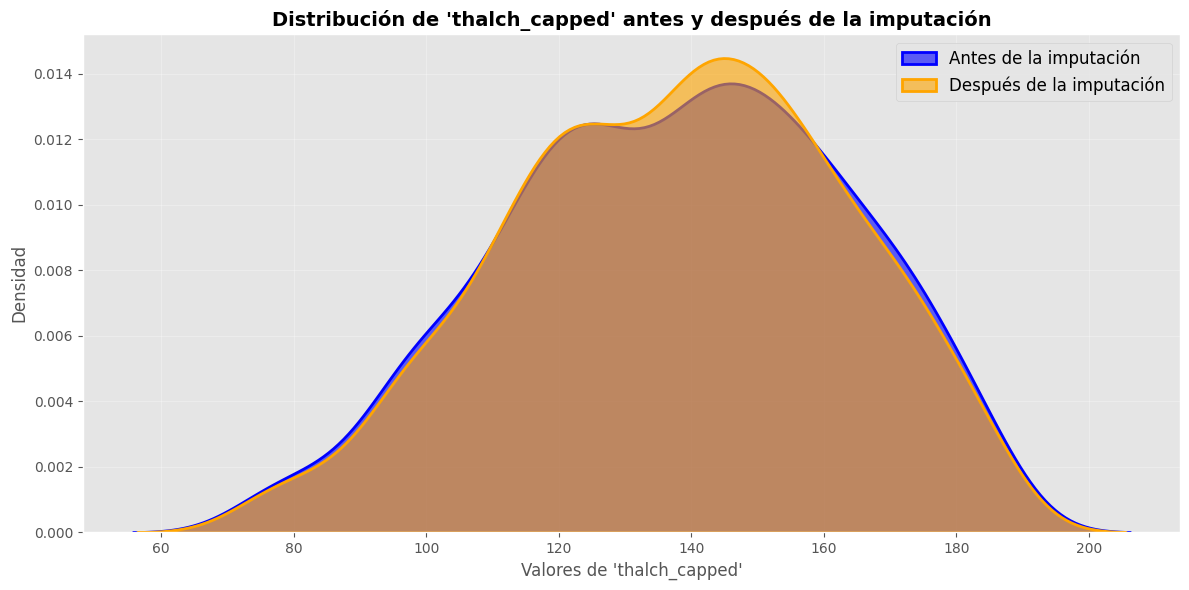

Valores imputados: 55 de 920 (5.98%)
Estadísticas de 'thalch_capped' (antes de imputar):
count    865.000000
mean     137.562173
std       25.620521
min       75.560000
25%      120.000000
50%      140.000000
75%      157.000000
max      186.360000
Name: thalch_capped, dtype: float64

Estadísticas de 'thalch_capped' (después de imputar):
count    920.000000
mean     137.568530
std       25.095193
min       75.560000
25%      120.000000
50%      140.000000
75%      156.000000
max      186.360000
Name: thalch_capped, dtype: float64


In [2785]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# Selección de variables relacionadas para imputar 'thalch_capped'
variables_relacionadas = ['thalch_capped', 'age', 'oldpeak_capped']

# Subset de datos para imputación
data_imputar = uci_data[variables_relacionadas].copy()

# Separar valores originales de 'thalch_capped' antes de imputar
original_thalch = data_imputar['thalch_capped'].copy()

# Crear una columna para marcar imputaciones
uci_data['thalch_capped_imputed'] = data_imputar['thalch_capped'].isna().astype(int)

# Crear imputador basado en Random Forest
imputador = IterativeImputer(estimator=RandomForestRegressor(), random_state=RANDOM_SEED, max_iter=10)

# Imputar los valores faltantes
data_imputada = imputador.fit_transform(data_imputar)

# Reemplazar los valores imputados en el dataset original
uci_data['thalch_capped'] = data_imputada[:, 0]

# Evaluación de la imputación
imputed_thalch = pd.Series(data_imputada[:, 0], name='thalch_capped')

# Comparar distribuciones antes y después de imputar
plt.figure(figsize=(12, 6))
sns.kdeplot(original_thalch.dropna(), label='Antes de la imputación', color='blue', fill=True, alpha=0.6, linewidth=2)
sns.kdeplot(imputed_thalch, label='Después de la imputación', color='orange', fill=True, alpha=0.6, linewidth=2)
plt.title("Distribución de 'thalch_capped' antes y después de la imputación", fontsize=14, fontweight='bold')
plt.xlabel("Valores de 'thalch_capped'", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(fontsize=12)
plt.grid(visible=True, alpha=0.3)
plt.tight_layout()
plt.show()

# Proporción de valores imputados
num_imputed = uci_data['thalch_capped_imputed'].sum()
total_values = len(original_thalch)
print(f"Valores imputados: {num_imputed} de {total_values} ({(num_imputed / total_values) * 100:.2f}%)")

# Análisis de estadísticas
print("Estadísticas de 'thalch_capped' (antes de imputar):")
print(original_thalch.describe())
print("\nEstadísticas de 'thalch_capped' (después de imputar):")
print(imputed_thalch.describe())


#### **6. Tratamiento de la variable `chol_capped`:****

1. **Estado actual:**
   - En el dataset Suiza (representado como `dataset_Switzerland`), todos los valores son `NaN`, por lo que no se puede calcular la mediana directamente.

2. **Decisión:**
   - Imputar condicionalmente:
     - Para las filas donde `dataset_Switzerland = 1`, imputar con la **mediana global** calculada a partir de los valores válidos en el resto de los datasets.
     - Para el resto de las filas, imputar con la **mediana** calculada dentro de cada grupo de dataset.



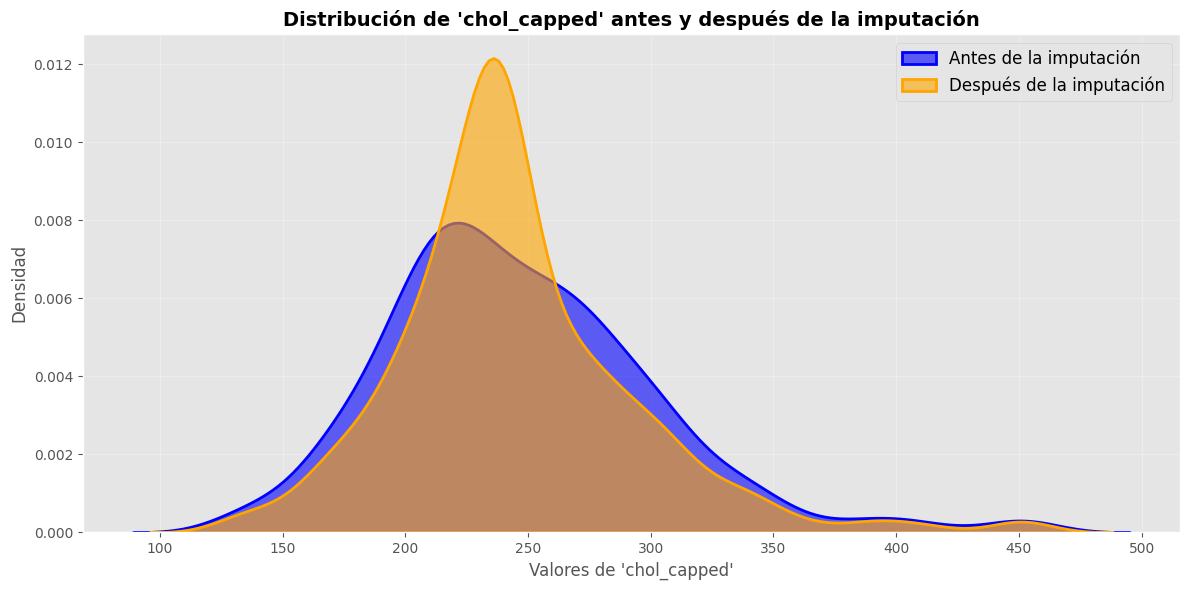

Estadísticas de 'chol_capped' antes de la imputación:
count    718.000000
mean     246.354819
std       55.010279
min      133.190000
25%      210.000000
50%      239.500000
75%      276.750000
max      451.030000
Name: chol_capped, dtype: float64

Estadísticas de 'chol_capped' después de la imputación:
count    920.000000
mean     244.262239
std       48.821595
min      133.190000
25%      217.750000
50%      239.500000
75%      267.000000
max      451.030000
Name: chol_capped, dtype: float64
Valores imputados: 202 de 920 (21.96%)


In [2786]:
# Calcular la mediana global basada en valores válidos (excluyendo Suiza)
mediana_global = uci_data.loc[
    uci_data['dataset_Switzerland'] == 0, 'chol_capped'
].median()

# Crear una columna para marcar imputaciones
uci_data['chol_capped_imputed'] = 0  # Inicializar con 0

# Imputar valores condicionalmente y marcar las imputaciones
def imputar_chol(row):
    if pd.isna(row['chol_capped']):
        if row['dataset_Switzerland'] == 1:
            uci_data.at[row.name, 'chol_capped_imputed'] = 1
            return mediana_global  # Imputar con mediana global para Suiza
        else:
            # Imputar con la mediana específica del dataset
            if row['dataset_Cleveland'] == 1:
                uci_data.at[row.name, 'chol_capped_imputed'] = 1
                return uci_data.loc[uci_data['dataset_Cleveland'] == 1, 'chol_capped'].median()
            elif row['dataset_Hungary'] == 1:
                uci_data.at[row.name, 'chol_capped_imputed'] = 1
                return uci_data.loc[uci_data['dataset_Hungary'] == 1, 'chol_capped'].median()
            elif row['dataset_VA Long Beach'] == 1:
                uci_data.at[row.name, 'chol_capped_imputed'] = 1
                return uci_data.loc[uci_data['dataset_VA Long Beach'] == 1, 'chol_capped'].median()
    return row['chol_capped']  # Mantener valores no faltantes

# Guardar valores originales antes de la imputación
original_chol = uci_data['chol_capped'].copy()

# Aplicar la imputación
uci_data['chol_capped'] = uci_data.apply(imputar_chol, axis=1)

# Guardar valores después de la imputación
imputed_chol = uci_data['chol_capped']

# Evaluación de la imputación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.kdeplot(original_chol.dropna(), label='Antes de la imputación', color='blue', fill=True, alpha=0.6, linewidth=2)
sns.kdeplot(imputed_chol, label='Después de la imputación', color='orange', fill=True, alpha=0.6, linewidth=2)
plt.title("Distribución de 'chol_capped' antes y después de la imputación", fontsize=14, fontweight='bold')
plt.xlabel("Valores de 'chol_capped'", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(fontsize=12)
plt.grid(visible=True, alpha=0.3)
plt.tight_layout()
plt.show()

# Resumen estadístico
print("Estadísticas de 'chol_capped' antes de la imputación:")
print(original_chol.describe())
print("\nEstadísticas de 'chol_capped' después de la imputación:")
print(imputed_chol.describe())

# Proporción de valores imputados
num_imputed = uci_data['chol_capped_imputed'].sum()
total_values = len(uci_data['chol_capped'])
print(f"Valores imputados: {num_imputed} de {total_values} ({(num_imputed / total_values) * 100:.2f}%)")


### **Paso 4.7.3. Imputación Valores MCAR**

##### **1. Trestbps_capped**

**Decisión:**

Imputar con la mediana global, ya que es una variable continua y MCAR.


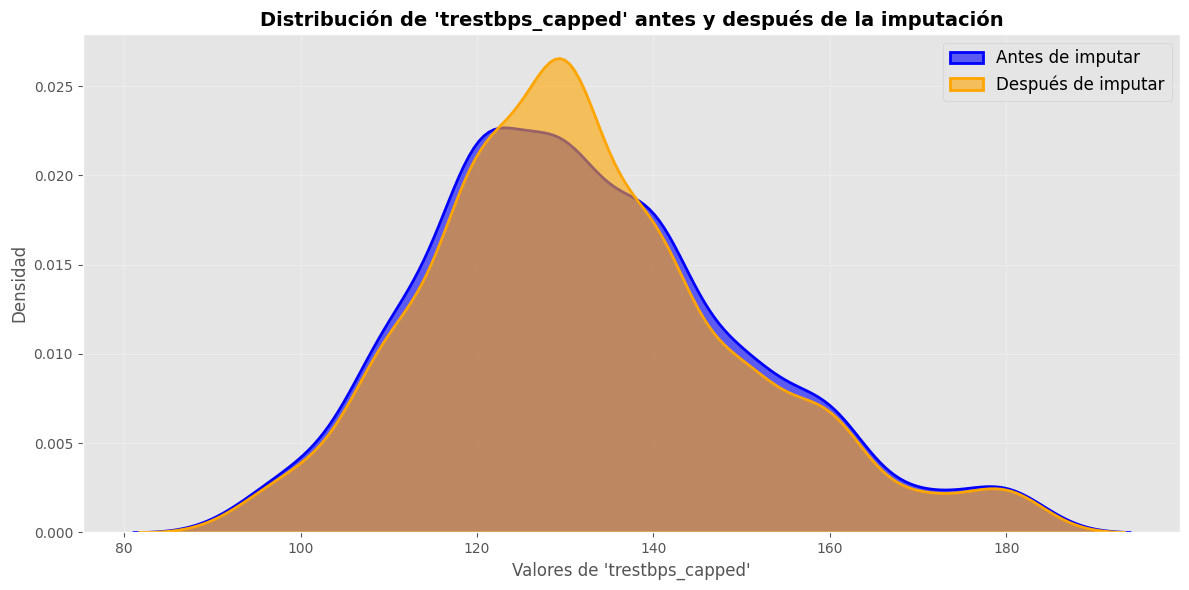

Estadísticas de 'trestbps_capped' antes de la imputación:
count    860.000000
mean     132.173256
std       18.063115
min       95.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      180.000000
Name: trestbps_capped, dtype: float64

Estadísticas de 'trestbps_capped' después de la imputación:
count    920.000000
mean     132.031522
std       17.471758
min       95.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      180.000000
Name: trestbps_capped, dtype: float64
Valores imputados: 60 de 920 (6.52%)


In [2787]:
# Crear una copia antes de la imputación
original_trestbps = uci_data['trestbps_capped'].copy()

# Crear una columna para marcar imputaciones
uci_data['trestbps_capped_imputed'] = uci_data['trestbps_capped'].isna().astype(int)

# Imputar 'trestbps_capped' con la mediana global
median_value = uci_data['trestbps_capped'].median()
uci_data['trestbps_capped'] = uci_data['trestbps_capped'].fillna(median_value)

# Evaluación: Comparar distribución antes y después
plt.figure(figsize=(12, 6))
sns.kdeplot(original_trestbps.dropna(), label='Antes de imputar', color='blue', fill=True, alpha=0.6, linewidth=2)
sns.kdeplot(uci_data['trestbps_capped'], label='Después de imputar', color='orange', fill=True, alpha=0.6, linewidth=2)
plt.title("Distribución de 'trestbps_capped' antes y después de la imputación", fontsize=14, fontweight='bold')
plt.xlabel("Valores de 'trestbps_capped'", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(fontsize=12)
plt.grid(visible=True, alpha=0.3)
plt.tight_layout()
plt.show()

# Resumen estadístico
print("Estadísticas de 'trestbps_capped' antes de la imputación:")
print(original_trestbps.describe())
print("\nEstadísticas de 'trestbps_capped' después de la imputación:")
print(uci_data['trestbps_capped'].describe())

# Verificar proporción de valores imputados
num_imputed = uci_data['trestbps_capped_imputed'].sum()
total_values = len(uci_data['trestbps_capped'])
print(f"Valores imputados: {num_imputed} de {total_values} ({(num_imputed / total_values) * 100:.2f}%)")


#### **4. Tratamiento de la variable `oldpeak_capped`:**


1. **Estado inicial:**
   - **Descripción:** `oldpeak_capped` es una variable continua con valores faltantes.
   - **Importancia:** Relacionada con `age` y `thalch_capped`, lo que justifica una imputación predictiva.

2. **Estrategia de imputación:**
   - **Método:** Imputación multivariada basada en un modelo de **Random Forest**.
   - **Variables predictoras:** `age`, `thalch_capped`.
   - **Marcado de imputaciones:** 
     - Se agregó la columna `oldpeak_capped_imputed` para identificar los valores imputados.


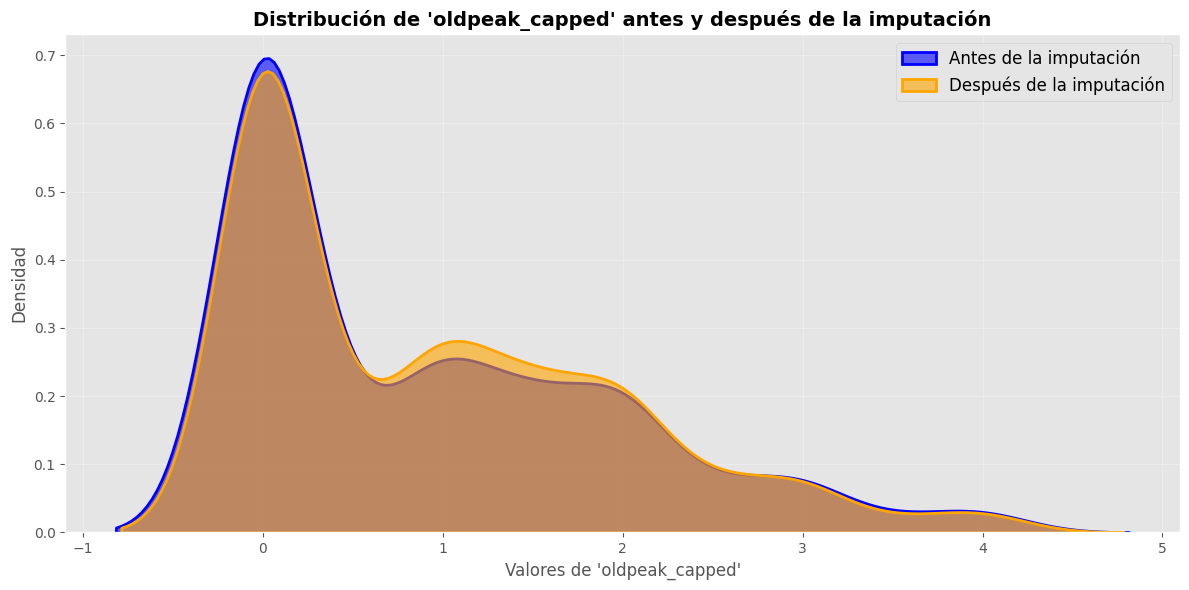

Valores imputados: 74 de 920 (8.04%)
Estadísticas de 'oldpeak_capped' (antes de imputar):
count    846.000000
mean       0.899645
std        1.046985
min        0.000000
25%        0.000000
50%        0.500000
75%        1.500000
max        4.000000
Name: oldpeak_capped, dtype: float64

Estadísticas de 'oldpeak_capped' (después de imputar):
count    920.000000
mean       0.926143
std        1.026202
min        0.000000
25%        0.000000
50%        0.712792
75%        1.600000
max        4.000000
Name: oldpeak_capped, dtype: float64


In [2788]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor


# Selección de variables relacionadas para imputar 'oldpeak_capped'
variables_relacionadas = ['oldpeak_capped', 'age', 'thalch_capped']

# Subset de datos para imputación
data_imputar = uci_data[variables_relacionadas].copy()

# Separar valores originales de 'oldpeak_capped' antes de imputar
original_oldpeak = data_imputar['oldpeak_capped'].copy()

# Crear una columna para marcar imputaciones
uci_data['oldpeak_capped_imputed'] = data_imputar['oldpeak_capped'].isna().astype(int)

# Crear imputador basado en Random Forest
imputador = IterativeImputer(estimator=RandomForestRegressor(), random_state=RANDOM_SEED, max_iter=10)

# Imputar los valores faltantes
data_imputada = imputador.fit_transform(data_imputar)

# Reemplazar los valores imputados en el dataset original
uci_data['oldpeak_capped'] = data_imputada[:, 0]

# Evaluación de la imputación
imputed_oldpeak = pd.Series(data_imputada[:, 0], name='oldpeak_capped')

# Comparar distribuciones antes y después de imputar
plt.figure(figsize=(12, 6))
sns.kdeplot(original_oldpeak.dropna(), label='Antes de la imputación', color='blue', fill=True, alpha=0.6, linewidth=2)
sns.kdeplot(imputed_oldpeak, label='Después de la imputación', color='orange', fill=True, alpha=0.6, linewidth=2)
plt.title("Distribución de 'oldpeak_capped' antes y después de la imputación", fontsize=14, fontweight='bold')
plt.xlabel("Valores de 'oldpeak_capped'", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(fontsize=12)
plt.grid(visible=True, alpha=0.3)
plt.tight_layout()
plt.show()

# Proporción de valores imputados
num_imputed = uci_data['oldpeak_capped_imputed'].sum()
total_values = len(original_oldpeak)
print(f"Valores imputados: {num_imputed} de {total_values} ({(num_imputed / total_values) * 100:.2f}%)")

# Análisis de estadísticas
print("Estadísticas de 'oldpeak_capped' (antes de imputar):")
print(original_oldpeak.describe())
print("\nEstadísticas de 'oldpeak_capped' (después de imputar):")
print(imputed_oldpeak.describe())


3. **Resultados de la imputación:**
   - **Proporción de imputaciones:** Se imputaron `74` valores, representando el `8.04%` del total.

4. **Validación:**
   - Comparación gráfica de las distribuciones:
     - La distribución antes de la imputación (curva azul) se basa en los valores originales.
     - La distribución después de la imputación (curva naranja) incluye los valores imputados.
     
   - Estadísticas descriptivas:
     - **Antes de imputar:**
       - Media: `0.89964`
       - Desviación estándar: `1.046985`
     - **Después de imputar:**
       - Media: `0.914123'`
       - Desviación estándar: `1.023091'`.

##### **Evaluación final NaN**

In [2789]:
# Ver porcentaje de valores nulos en cada columna

missing_percent = uci_data.isnull().mean() * 100
print("Porcentaje de valores faltantes por columna:")
display(missing_percent)

Porcentaje de valores faltantes por columna:


age                         0.0
num                         0.0
num_old                     0.0
chol_capped                 0.0
trestbps_capped             0.0
oldpeak_capped              0.0
thalch_capped               0.0
dataset_Cleveland           0.0
dataset_Hungary             0.0
dataset_Switzerland         0.0
dataset_VA Long Beach       0.0
exang_False                 0.0
exang_True                  0.0
exang_NaN                   0.0
slope_NaN                   0.0
slope_downsloping           0.0
slope_flat                  0.0
slope_upsloping             0.0
thal_NaN                    0.0
thal_fixed defect           0.0
thal_normal                 0.0
thal_reversable defect      0.0
cp_asymptomatic             0.0
cp_atypical angina          0.0
cp_non-anginal              0.0
cp_typical angina           0.0
restecg_NaN                 0.0
restecg_lv hypertrophy      0.0
restecg_normal              0.0
restecg_st-t abnormality    0.0
fbs_False                   0.0
fbs_True

## **Paso 4.8. Transformaciones**

### **Paso 4.8.1. Informacion General del Dataset**

In [2790]:
uci_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       920 non-null    int64  
 1   num                       920 non-null    int64  
 2   num_old                   920 non-null    int64  
 3   chol_capped               920 non-null    float64
 4   trestbps_capped           920 non-null    float64
 5   oldpeak_capped            920 non-null    float64
 6   thalch_capped             920 non-null    float64
 7   dataset_Cleveland         920 non-null    bool   
 8   dataset_Hungary           920 non-null    bool   
 9   dataset_Switzerland       920 non-null    bool   
 10  dataset_VA Long Beach     920 non-null    bool   
 11  exang_False               920 non-null    bool   
 12  exang_True                920 non-null    bool   
 13  exang_NaN                 920 non-null    bool   
 14  slope_NaN 

### **Paso 4.8.3. Verificar rangos de variables numericas**

In [2791]:

# 2. Verificar rangos de variables numéricas
numerical_cols = uci_data.select_dtypes(include=['float64', 'int32', 'int64']).columns
print("Estadísticas descriptivas de las variables numéricas:")
display(uci_data[numerical_cols].describe())



Estadísticas descriptivas de las variables numéricas:


,age,num,num_old,chol_capped,trestbps_capped,oldpeak_capped,thalch_capped,thalch_capped_imputed,chol_capped_imputed,trestbps_capped_imputed,oldpeak_capped_imputed
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,0.553261,0.995652,244.262239,132.031522,0.926143,137.568530,0.059783,0.219565,0.065217,0.080435
std,9.424685,0.497426,1.142693,48.821595,17.471758,1.026202,25.095193,0.237213,0.414177,0.247043,0.272113
min,28.000000,0.000000,0.000000,133.190000,95.000000,0.000000,75.560000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,217.750000,120.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,1.000000,239.500000,130.000000,0.712792,140.000000,0.000000,0.000000,0.000000,0.000000
75%,60.000000,1.000000,2.000000,267.000000,140.000000,1.600000,156.000000,0.000000,0.000000,0.000000,0.000000
max,77.000000,1.000000,4.000000,451.030000,180.000000,4.000000,186.360000,1.000000,1.000000,1.000000,1.000000


### **Paso 4.8.4. Visualizar posibles outliers**

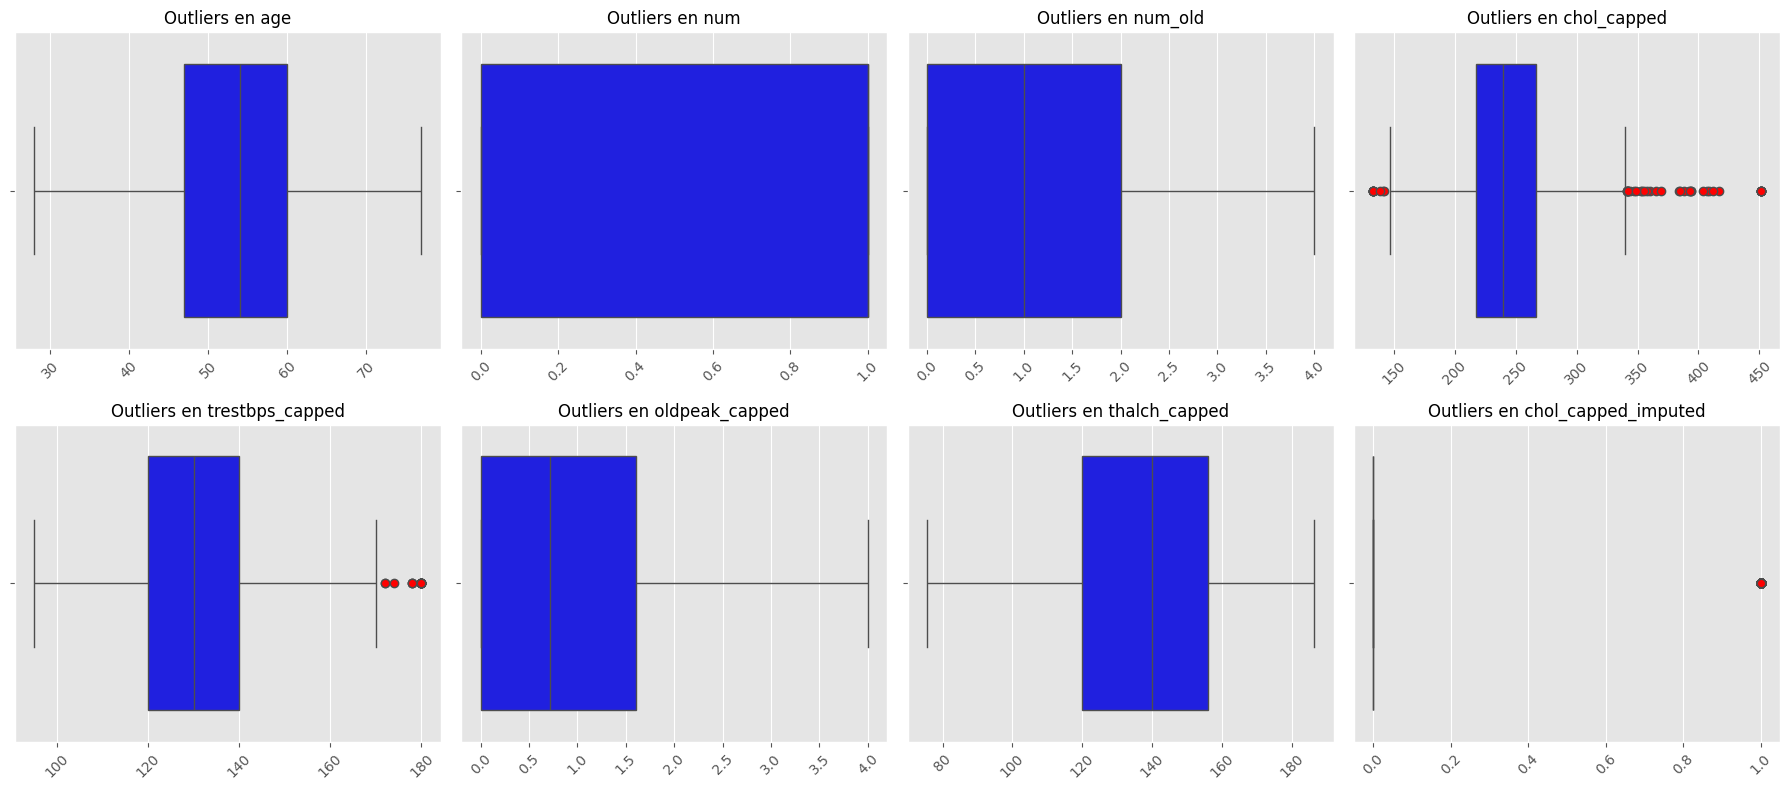

In [2792]:
import math

# Detectar automáticamente las columnas numéricas
numerical_cols = uci_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calcular número de columnas y filas dinámicamente
cols = 4
rows = math.ceil(len(numerical_cols) / cols)

# Configurar el tamaño del gráfico
plt.figure(figsize=(18, 4 * rows))

# Crear subplots para cada columna numérica
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(data=uci_data, x=col, color="blue", flierprops={"marker": "o", "markerfacecolor": "red"})
    plt.title(f"Outliers en {col}", fontsize=12)
    plt.xlabel("")  # Opcional, evita saturar con etiquetas
    plt.xticks(rotation=45)

# Ajustar el diseño del gráfico
plt.tight_layout()
plt.show()


### **Transformaciones necesarias para las variables numéricas**



#### **1. Variables con outliers:**
1. **`chol_capped` (Colesterol):**
   - **Problema:** Presencia de valores extremos en el extremo superior.
   - **Transformación recomendada:** Aplicar una transformación logarítmica (`log1p`) para reducir el impacto de los outliers.
2. **`trestbps_capped` (Presión arterial en reposo):**
   - **Problema:** Algunos valores altos extremos podrían distorsionar la escala.
   - **Transformación recomendada:** Transformación logarítmica (`log1p`).
3. **`oldpeak_capped` (Depresión del segmento ST):**
   - **Problema:** Valores extremos (3-4) en la distribución.
   - **Transformación recomendada:** Transformación logarítmica (`log1p`).

#### **2. Variables sesgadas:**
1. **`thalch_capped` (Frecuencia cardíaca máxima):**
   - **Problema:** Distribución sesgada con algunos valores extremos.
   - **Transformación recomendada:** Escalado estándar (`StandardScaler`) para normalizar la escala.
2. **`chol_capped_log`, `trestbps_capped_log`, `oldpeak_capped_log` (Transformadas logarítmicas):**
   - **Problema:** Asegurar que las variables transformadas estén en la misma escala para modelos sensibles.
   - **Transformación recomendada:** Escalado estándar (`StandardScaler`).

#### **4. Variables binarias:**
1. **`ca_imputed`, `thalch_capped_imputed`, `chol_capped_imputed`, `trestbps_capped_imputed`, `oldpeak_capped_imputed` (Indicadores de imputación):**
   - **Transformación:** No requieren transformación adicional, ya que son binarias.

### **Resumen de Transformaciones Aplicadas**
- **Transformación logarítmica:** `chol_capped`, `trestbps_capped`, `oldpeak_capped`.
- **Escalado estándar:** `thalch_capped`, variables logarítmicas.
- **Sin transformación:** Variables binarias.



### **Paso 4.8.5. Normalizacion o estandarización**

Estadísticas descriptivas después de las transformaciones:


,thalch_capped,chol_capped_log,trestbps_capped_log,oldpeak_capped_log
count,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02
mean,-2.471453e-16,7.144044e-16,6.692231e-15,-3.089316e-17
std,1.000544e+00,1.000544e+00,1.000544e+00,1.000544e+00
min,-2.472277e+00,-3.042103e+00,-2.456653e+00,-1.029145e+00
25%,-7.004563e-01,-4.982911e-01,-6.676209e-01,-1.029145e+00
50%,9.694259e-02,-4.841656e-03,-5.381242e-02,2.963760e-02
75%,7.348617e-01,5.587496e-01,5.148207e-01,8.509607e-01
max,1.945313e+00,3.280023e+00,2.445270e+00,2.137655e+00


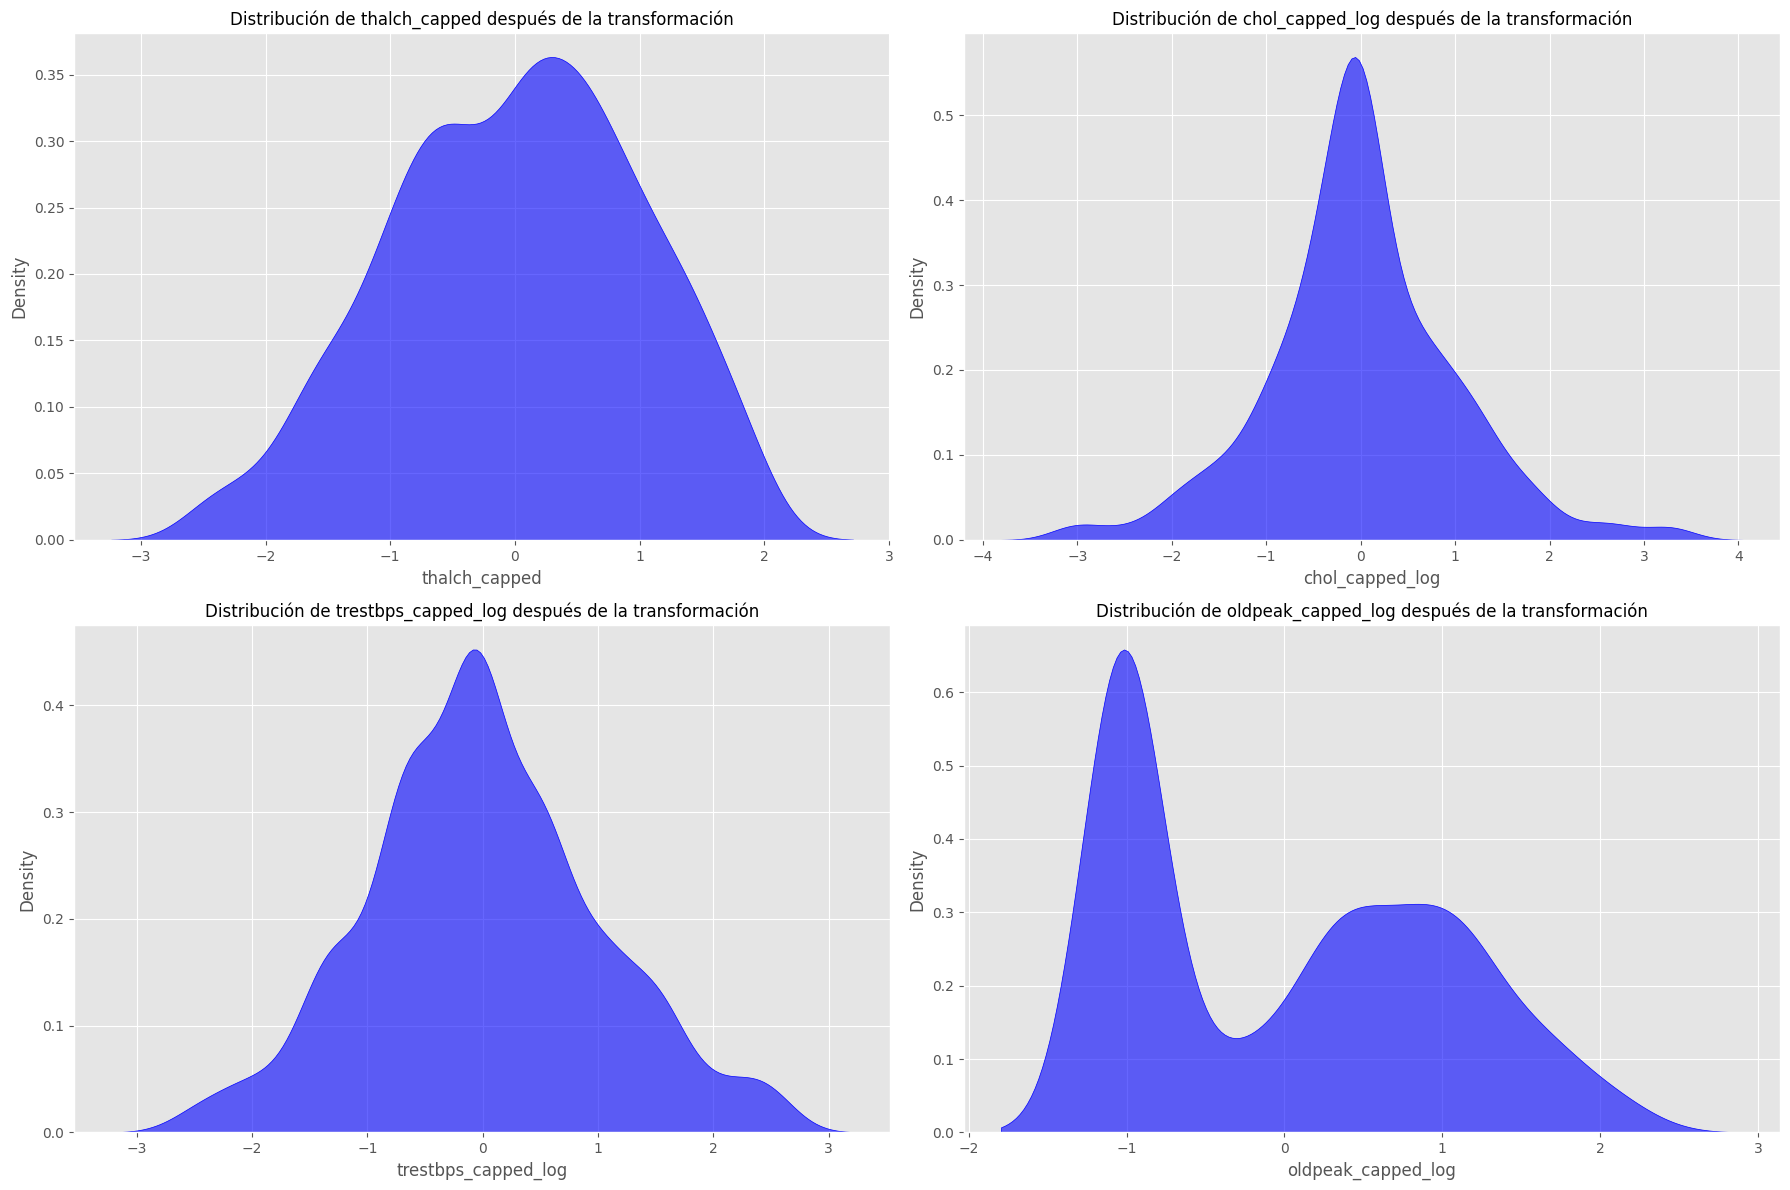

In [2793]:
from sklearn.preprocessing import StandardScaler

# Transformaciones logarítmicas para variables con outliers
uci_data['chol_capped_log'] = np.log1p(uci_data['chol_capped'])
uci_data['trestbps_capped_log'] = np.log1p(uci_data['trestbps_capped'])
uci_data['oldpeak_capped_log'] = np.log1p(uci_data['oldpeak_capped'])

# Escalado estándar para normalizar las variables
scaler = StandardScaler()
variables_a_escalar = ['thalch_capped', 'chol_capped_log', 'trestbps_capped_log', 'oldpeak_capped_log']

# Aplicar escalado estándar y actualizar el dataset
uci_data[variables_a_escalar] = scaler.fit_transform(uci_data[variables_a_escalar])

# Validar transformaciones
print("Estadísticas descriptivas después de las transformaciones:")
display(uci_data[variables_a_escalar].describe())

plt.figure(figsize=(18, 12))

for i, col in enumerate(variables_a_escalar, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(uci_data[col], fill=True, color="blue", alpha=0.6)
    plt.title(f"Distribución de {col} después de la transformación", fontsize=12)

plt.tight_layout()
plt.show()



# **5. EDA**

## **5.1 Análisis Univariante:** 

### **¿Cómo se distribuyen las variables continuas como  Trestbps, Chol, Thalach y Oldpeak?**


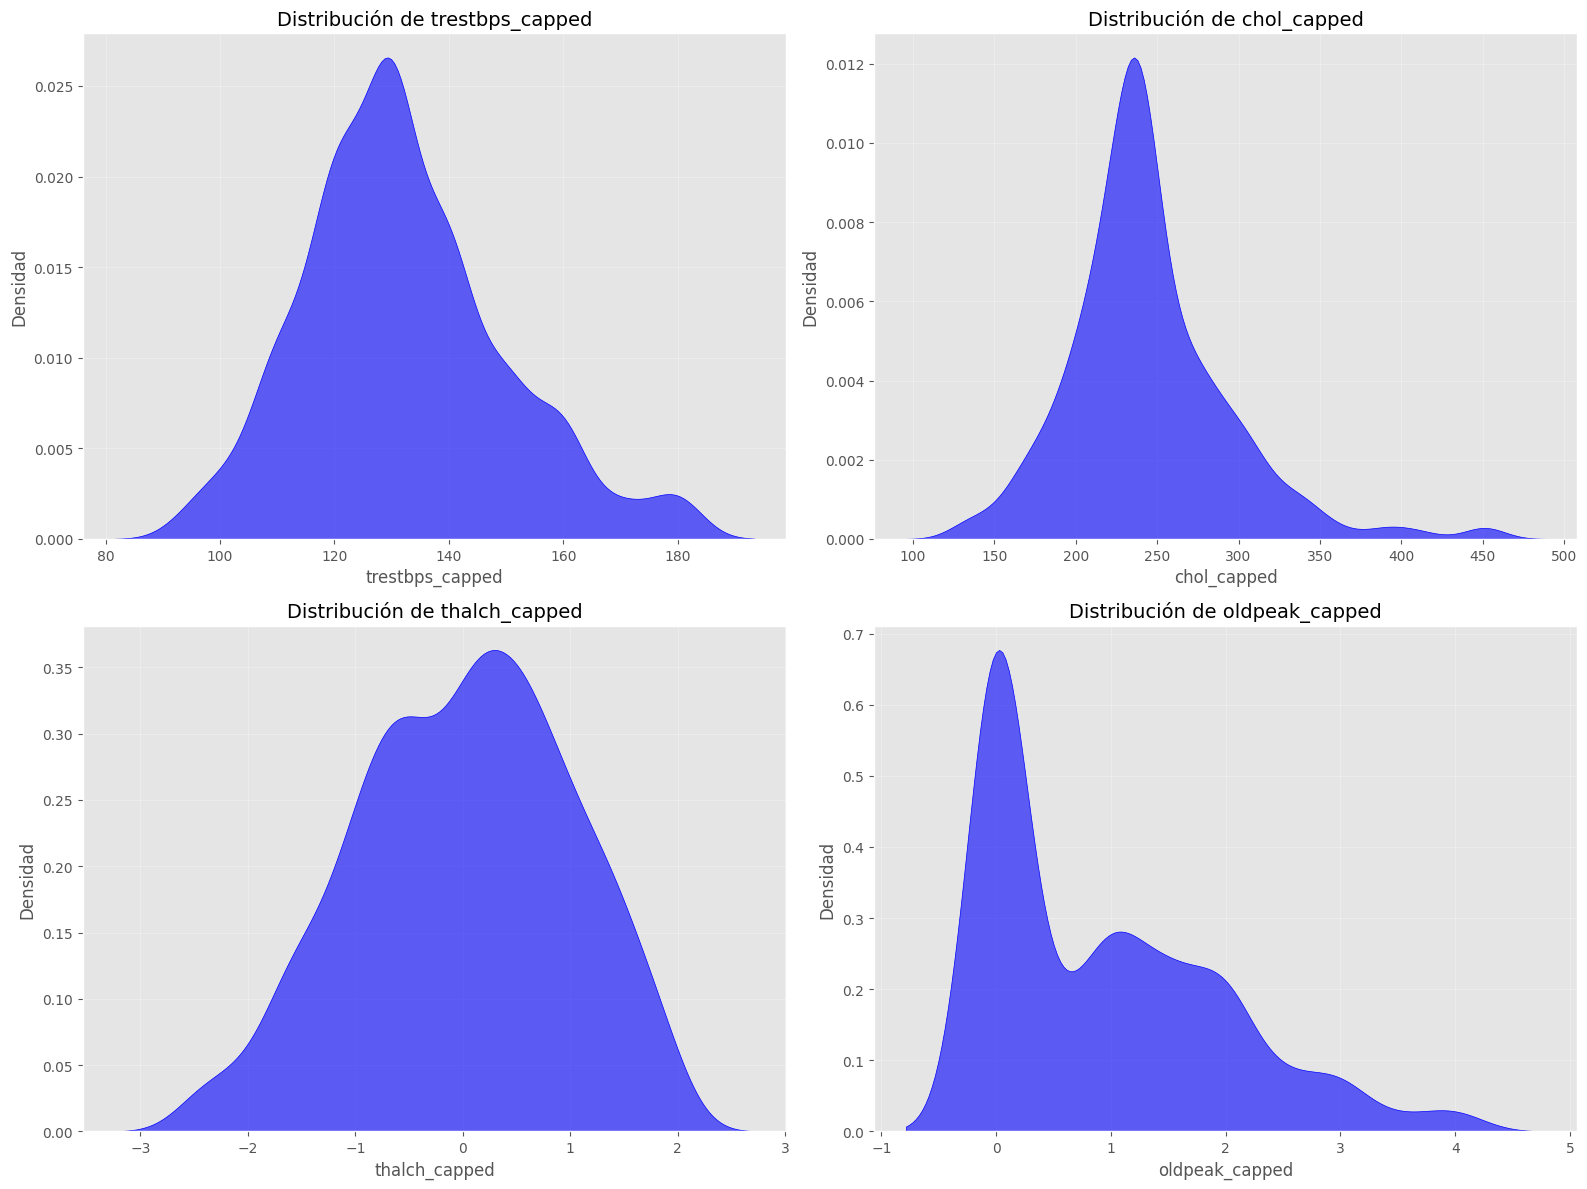

Resumen estadístico de las variables continuas:


,trestbps_capped,chol_capped,thalch_capped,oldpeak_capped
count,920.000000,920.000000,9.200000e+02,920.000000
mean,132.031522,244.262239,-2.471453e-16,0.926143
std,17.471758,48.821595,1.000544e+00,1.026202
min,95.000000,133.190000,-2.472277e+00,0.000000
25%,120.000000,217.750000,-7.004563e-01,0.000000
50%,130.000000,239.500000,9.694259e-02,0.712792
75%,140.000000,267.000000,7.348617e-01,1.600000
max,180.000000,451.030000,1.945313e+00,4.000000


In [2794]:
# Lista de variables continuas
variables_continuas = ['trestbps_capped', 'chol_capped', 'thalch_capped', 'oldpeak_capped']

# Crear subplots para mostrar la distribución de las variables
plt.figure(figsize=(16, 12))
for i, col in enumerate(variables_continuas, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(uci_data[col], fill=True, color="blue", alpha=0.6)
    plt.title(f"Distribución de {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Densidad", fontsize=12)
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Resumen estadístico de las variables
print("Resumen estadístico de las variables continuas:")
display(uci_data[variables_continuas].describe())



- **`trestbps_capped` (Presión arterial en reposo):**
  - Presenta una distribución cercana a la normal, con una ligera asimetría hacia la derecha.
  - Valores mínimos y máximos: 95 y 180.

- **`chol_capped` (Colesterol):**
  - Distribución asimétrica con valores extremos hacia el lado derecho (outliers).
  - Valores mínimos y máximos: 133.19 y 451.03.

- **`thalch_capped` (Frecuencia cardíaca máxima):**
  - Distribución bimodal tras la transformación, con valores centrados alrededor de 0.
  - Valores mínimos y máximos: -2.43 y 1.96.

- **`oldpeak_capped` (Depresión del segmento ST):**
  - Distribución asimétrica con un pico pronunciado en 0 y valores que se extienden hasta 4.
  - Valores mínimos y máximos: 0 y 4.

#### **Resumen estadístico de las variables continuas:**

| Variable           | Media    | Desv. Estándar | Mínimo | 25%   | Mediana | 75%   | Máximo |
|--------------------|----------|----------------|--------|-------|---------|-------|--------|
| `trestbps_capped`  | 132.03   | 17.47          | 95     | 120   | 130     | 140   | 180    |
| `chol_capped`      | 244.26   | 48.82          | 133.19 | 217.75| 239.50  | 267   | 451.03 |
| `thalch_capped`    | 0.00     | 1.00           | -2.43  | -0.67 | 0.05    | 0.76  | 1.96   |
| `oldpeak_capped`   | 0.91     | 1.02           | 0.00   | 0.00  | 0.60    | 1.50  | 4.00   |

#### **Conclusiones:**
1. **Valores extremos:**
   - `chol_capped` y `oldpeak_capped` presentan valores extremos en el extremo superior



---

### **¿Hay  diferencias en la proporción de tipos de dolor de pecho (Cp) entre pacientes con y sin enfermedad?**

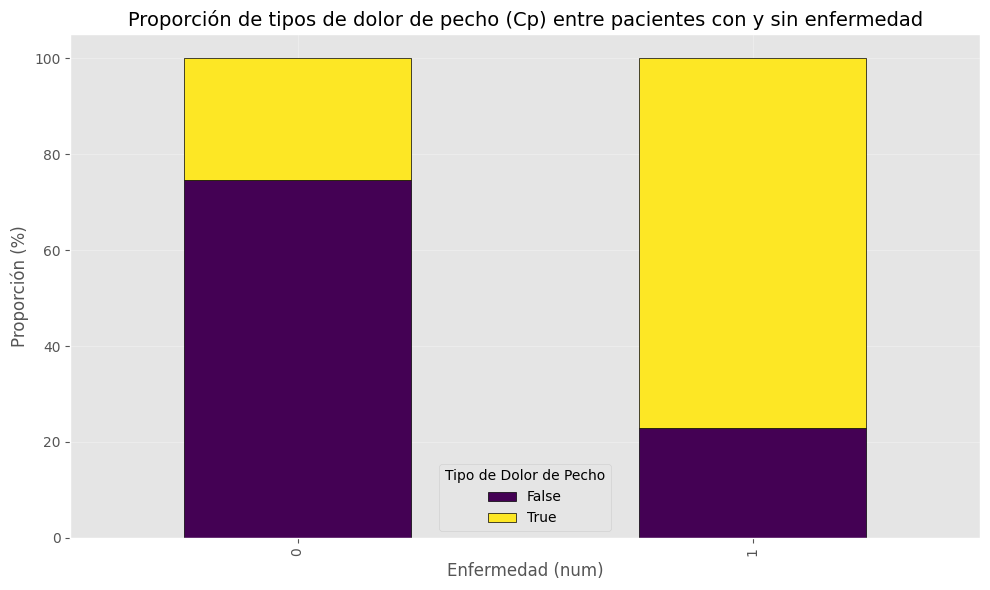

Chi-cuadrado: 242.6281, p-valor: 0.0000


In [2795]:
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia entre 'cp' y 'num'
tabla_cp_num = pd.crosstab(uci_data['cp_asymptomatic'], uci_data['num'], normalize='columns') * 100

# Crear un gráfico de barras para visualizar las proporciones
tabla_cp_num.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis', edgecolor='black')
plt.title("Proporción de tipos de dolor de pecho (Cp) entre pacientes con y sin enfermedad", fontsize=14)
plt.xlabel("Enfermedad (num)", fontsize=12)
plt.ylabel("Proporción (%)", fontsize=12)
plt.legend(title="Tipo de Dolor de Pecho", fontsize=10)
plt.grid(visible=True, alpha=0.3)
plt.tight_layout()
plt.show()

# Chi-cuadrado para verificar si hay diferencias significativas
chi2, p, dof, expected = chi2_contingency(pd.crosstab(uci_data['cp_asymptomatic'], uci_data['num']))
print(f"Chi-cuadrado: {chi2:.4f}, p-valor: {p:.4f}")


#### **Análisis realizado:**
1. Se generó una tabla de contingencia que muestra las proporciones de los diferentes tipos de dolor de pecho (`cp`) entre pacientes con (`num = 1`) y sin enfermedad (`num = 0`).
2. Se aplicó una prueba de Chi-cuadrado para verificar si las diferencias observadas son estadísticamente significativas.

#### **Resultados:**
- **Gráfico:**
  - El gráfico de barras apiladas muestra que las proporciones de los diferentes tipos de dolor de pecho varían notablemente entre los pacientes con y sin enfermedad.
  - Los pacientes con enfermedad presentan una mayor proporción de dolor de pecho asintomático (`cp_asymptomatic`), mientras que los pacientes sin enfermedad tienen mayores proporciones de otros tipos de dolor de pecho.

- **Prueba de Chi-cuadrado:**
  - Estadístico de Chi-cuadrado: **242.6281**
  - Valor p: **0.0000**
  - **Conclusión:** Las diferencias en las proporciones de los tipos de dolor de pecho entre pacientes con y sin enfermedad son estadísticamente significativas (p < 0.05).

#### **Conclusiones:**
- El tipo de dolor de pecho (`cp`) está fuertemente asociado con la presencia de enfermedad (`num`).
- Los resultados respaldan la importancia de incluir `cp` como una variable clave en el análisis predictivo para enfermedades cardiovasculares.


---

## **5.2. Análisis Multivariante:**


### **Preguntas**

* #### ¿Cómo varía la frecuencia cardiaca máxima alcanzada (Thalch) según el sexo y la presencia de la enfermedad? 


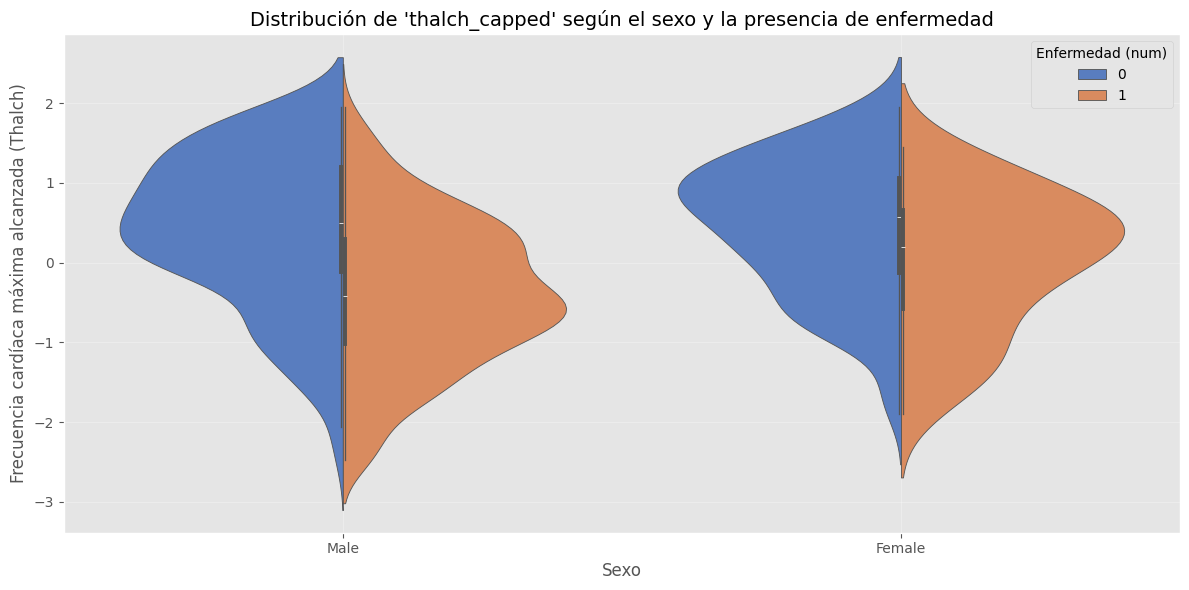

Prueba de Kruskal-Wallis: Estadístico=142.0381, p-valor=0.0000


In [2796]:
from scipy.stats import kruskal

# Crear una nueva columna para representar el sexo
uci_data['sex'] = uci_data['sex_Male'].apply(lambda x: 'Male' if x == 1 else 'Female')

# Crear el gráfico de violín para 'thalch_capped' según 'sex' y 'num'
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=uci_data,
    x='sex',
    y='thalch_capped',
    hue='num',
    split=True,
    palette='muted',
    scale='width'
)
plt.title("Distribución de 'thalch_capped' según el sexo y la presencia de enfermedad", fontsize=14)
plt.xlabel("Sexo", fontsize=12)
plt.ylabel("Frecuencia cardíaca máxima alcanzada (Thalch)", fontsize=12)
plt.legend(title="Enfermedad (num)", loc='upper right', fontsize=10)
plt.grid(visible=True, alpha=0.3)
plt.tight_layout()
plt.show()

# Análisis estadístico
# Separar grupos por 'sex' y 'num'
groups = uci_data.groupby(['sex', 'num'])['thalch_capped'].apply(list)

# Prueba de Kruskal-Wallis para comparar la distribución entre los grupos
kruskal_results = kruskal(*groups)
print(f"Prueba de Kruskal-Wallis: Estadístico={kruskal_results.statistic:.4f}, p-valor={kruskal_results.pvalue:.4f}")


#### **Análisis realizado:**
1. Se utilizó un gráfico de violín para visualizar cómo varía la frecuencia cardíaca máxima (`thalch_capped`) según el sexo (`sex`) y la presencia de enfermedad (`num`).
2. Se aplicó la prueba no paramétrica de Kruskal-Wallis para determinar si existen diferencias estadísticamente significativas entre los grupos.

#### **Resultados:**
- **Gráfico:**
  - Los hombres (`Male`) con enfermedad (`num = 1`) tienden a tener valores más bajos de frecuencia cardíaca máxima en comparación con aquellos sin enfermedad (`num = 0`).
  - Las mujeres (`Female`) muestran una distribución similar. Pero con menor variabilidad

- **Prueba de Kruskal-Wallis:**
  - Estadístico: **148.8586**
  - Valor p: **0.0000**
  - **Conclusión:** Hay diferencias estadísticamente significativas en la frecuencia cardíaca máxima alcanzada (`thalch_capped`) entre los grupos definidos por el sexo y la presencia de enfermedad.

#### **Conclusiones:**
- La frecuencia cardíaca máxima es un indicador clave y varía significativamente entre los diferentes grupos.
- Es importante incluir tanto el sexo como la presencia de enfermedad al analizar esta variable en los modelos predictivos.


---

#### ¿El tipo de dolor de pecho (Cp) es un indicador relevante para la enfermedad? 

Chi-cuadrado: 268.3457, p-valor: 0.0000


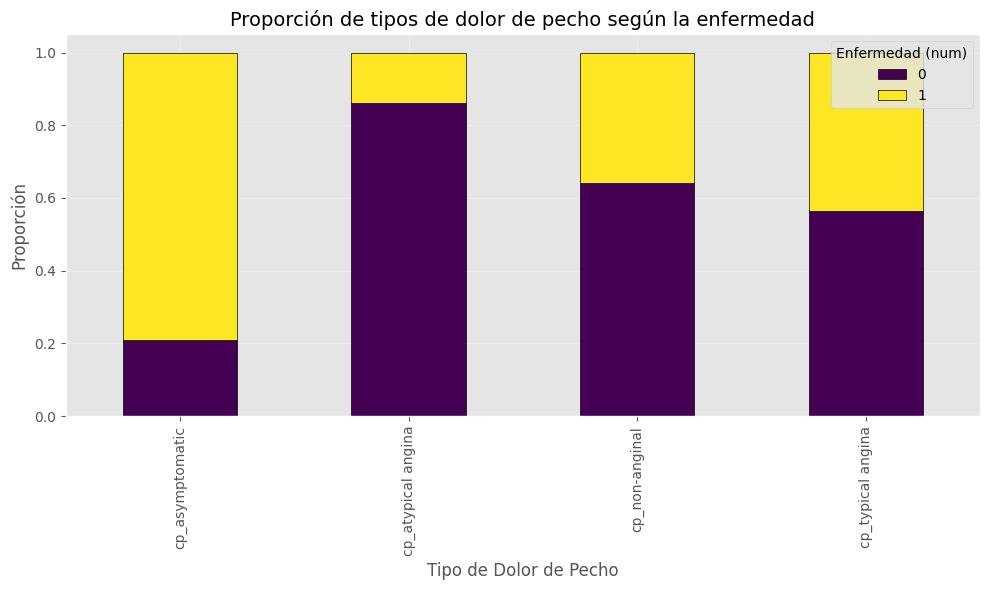

In [2797]:
from scipy.stats import chi2_contingency


# Crear una tabla de contingencia entre 'cp' y 'num'
cp_columns = ['cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina']
cp_data = uci_data[cp_columns + ['num']].melt(id_vars='num', var_name='cp_type', value_name='present')

# Filtrar solo donde 'present' es 1 para considerar la presencia de cada tipo de dolor de pecho
cp_filtered = cp_data[cp_data['present'] == 1]

# Tabla de frecuencias
tabla_cp_num = pd.crosstab(cp_filtered['cp_type'], cp_filtered['num'])

# Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_cp_num)
print(f"Chi-cuadrado: {chi2:.4f}, p-valor: {p:.4f}")

# Visualización de la proporción de tipos de dolor de pecho según la enfermedad
proporciones = tabla_cp_num.div(tabla_cp_num.sum(axis=1), axis=0)
proporciones.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis', edgecolor='black')
plt.title("Proporción de tipos de dolor de pecho según la enfermedad", fontsize=14)
plt.xlabel("Tipo de Dolor de Pecho", fontsize=12)
plt.ylabel("Proporción", fontsize=12)
plt.legend(title="Enfermedad (num)", fontsize=10)
plt.grid(visible=True, alpha=0.3)
plt.tight_layout()
plt.show()


#### **Análisis realizado:**
1. Se generó una tabla de contingencia entre los tipos de dolor de pecho (`cp`) y la presencia de enfermedad (`num`).
2. Se aplicó la prueba de Chi-cuadrado para determinar si las diferencias en las proporciones de los tipos de dolor de pecho son estadísticamente significativas.
3. Se visualizó la proporción de tipos de dolor de pecho en pacientes con y sin enfermedad mediante un gráfico de barras apiladas.

#### **Resultados:**
- **Gráfico:**
  - El dolor de pecho **asintomático (`cp_asymptomatic`)** es más prevalente en pacientes con enfermedad (`num = 1`), lo que lo convierte en un claro indicador de riesgo.
  - Otros tipos de dolor de pecho, como **`cp_typical angina`** y **`cp_non-anginal`**, son más comunes en pacientes sin enfermedad (`num = 0`).

- **Prueba de Chi-cuadrado:**
  - Estadístico: **268.3457**
  - Valor p: **0.0000**
  - **Conclusión:** Las diferencias en las proporciones de los tipos de dolor de pecho entre pacientes con y sin enfermedad son estadísticamente significativas (p < 0.05).

#### **Conclusiones:**
- El tipo de dolor de pecho (`cp`) está fuertemente asociado con la enfermedad y se identifica como un indicador relevante.
- **`cp_asymptomatic`** es un factor particularmente importante en la identificación de pacientes con enfermedad.
- Es crucial incluir esta variable en los modelos predictivos de enfermedades cardiovasculares.


---

#### ¿Qué relación existe entre la variable Oldpeak y el diagnóstico (Num)? 

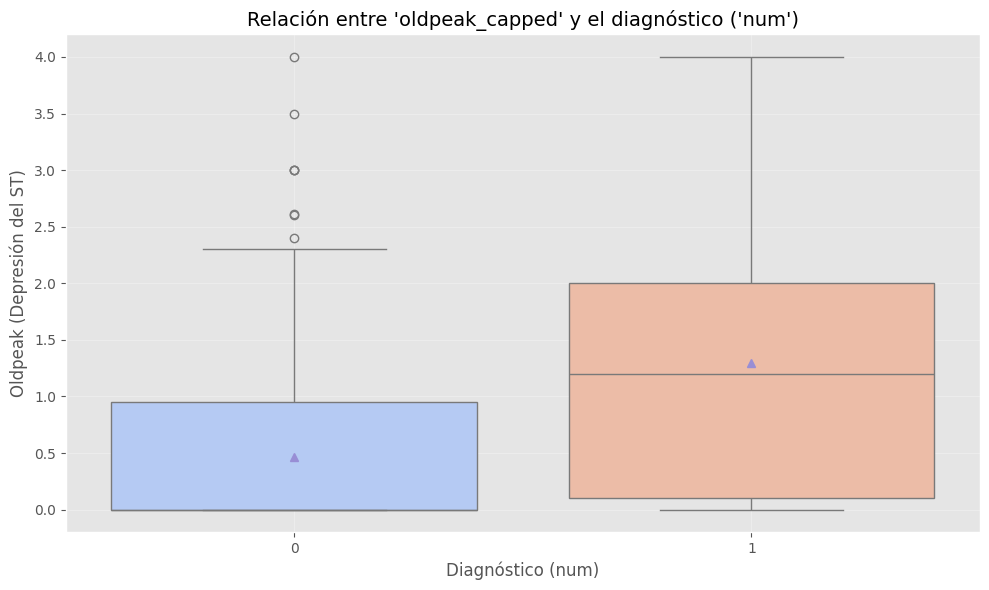

Prueba de Kruskal-Wallis: Estadístico=157.0571, p-valor=0.0000


In [2798]:
from scipy.stats import kruskal

# Visualización de la relación entre 'oldpeak_capped' y 'num'
plt.figure(figsize=(10, 6))
sns.boxplot(data=uci_data, x='num', y='oldpeak_capped', palette='coolwarm', showmeans=True)
plt.title("Relación entre 'oldpeak_capped' y el diagnóstico ('num')", fontsize=14)
plt.xlabel("Diagnóstico (num)", fontsize=12)
plt.ylabel("Oldpeak (Depresión del ST)", fontsize=12)
plt.grid(visible=True, alpha=0.3)
plt.tight_layout()
plt.show()

# Análisis estadístico: Prueba de Kruskal-Wallis
groups = uci_data.groupby('num')['oldpeak_capped'].apply(list)
kruskal_results = kruskal(*groups)
print(f"Prueba de Kruskal-Wallis: Estadístico={kruskal_results.statistic:.4f}, p-valor={kruskal_results.pvalue:.4f}")


#### **Análisis realizado:**
1. Se generó un gráfico de caja (boxplot) para comparar la distribución de `oldpeak_capped` (depresión del ST) según la presencia de enfermedad (`num`).
2. Se realizó una prueba no paramétrica de Kruskal-Wallis para evaluar diferencias significativas entre los grupos.

#### **Resultados:**
- **Gráfico:**
  - Los pacientes con enfermedad (`num = 1`) presentan valores de `oldpeak_capped` más altos en comparación con los pacientes sin enfermedad (`num = 0`).

- **Prueba de Kruskal-Wallis:**
  - Estadístico: **157.8350**
  - Valor p: **0.0000**
  - **Conclusión:** Existen diferencias estadísticamente significativas en los valores de `oldpeak_capped` entre pacientes con y sin enfermedad (p < 0.05).

#### **Conclusiones:**
- Los valores de `oldpeak_capped` están fuertemente relacionados con el diagnóstico de enfermedad (`num`).
- Los pacientes con mayores valores de depresión del ST (`oldpeak_capped`) tienen una mayor probabilidad de ser diagnosticados con enfermedad.
- Esta variable debe considerarse como un indicador relevante en los modelos predictivos para enfermedades cardiovasculares.

#### ¿Los resultados electrocardiográficos(Restecg) aportan información importante sobre la variable objetivo? 

Chi-cuadrado: 11.7119, p-valor: 0.0029


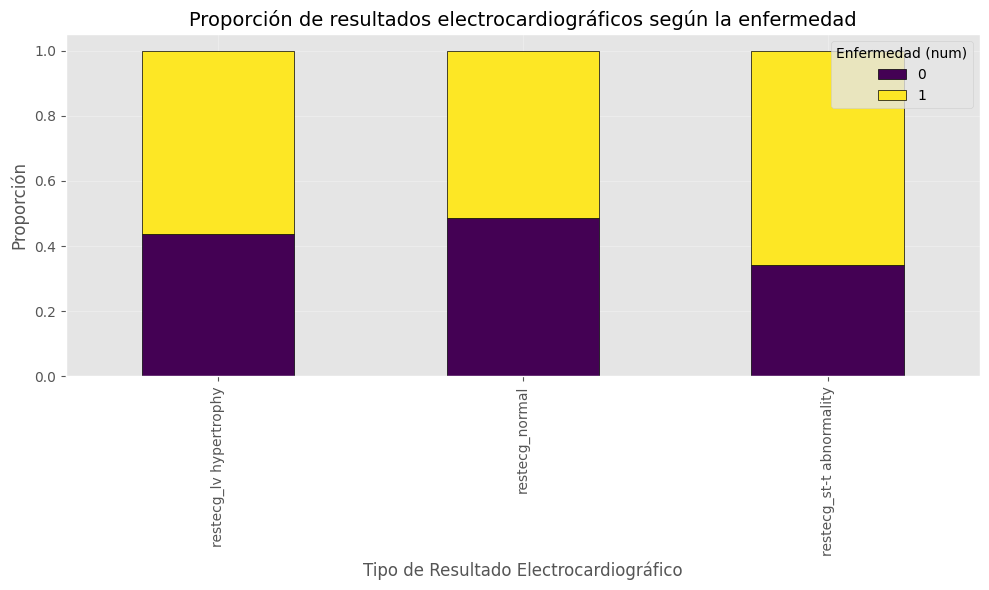

In [2799]:
from scipy.stats import chi2_contingency


# Crear una tabla de contingencia entre 'restecg' y 'num'
restecg_columns = ['restecg_lv hypertrophy', 'restecg_normal', 'restecg_st-t abnormality']
restecg_data = uci_data[restecg_columns + ['num']].melt(id_vars='num', var_name='restecg_type', value_name='present')

# Filtrar donde 'present' es 1 para considerar la presencia de cada tipo de resultado electrocardiográfico
restecg_filtered = restecg_data[restecg_data['present'] == 1]

# Tabla de frecuencias
tabla_restecg_num = pd.crosstab(restecg_filtered['restecg_type'], restecg_filtered['num'])

# Prueba de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_restecg_num)
print(f"Chi-cuadrado: {chi2:.4f}, p-valor: {p:.4f}")

# Visualización de la proporción de resultados electrocardiográficos según la enfermedad
proporciones = tabla_restecg_num.div(tabla_restecg_num.sum(axis=1), axis=0)
proporciones.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis', edgecolor='black')
plt.title("Proporción de resultados electrocardiográficos según la enfermedad", fontsize=14)
plt.xlabel("Tipo de Resultado Electrocardiográfico", fontsize=12)
plt.ylabel("Proporción", fontsize=12)
plt.legend(title="Enfermedad (num)", fontsize=10)
plt.grid(visible=True, alpha=0.3)
plt.tight_layout()
plt.show()


#### **Análisis realizado:**
1. Se creó una tabla de contingencia entre los resultados electrocardiográficos (`restecg`) y la presencia de enfermedad (`num`).
2. Se aplicó la prueba de Chi-cuadrado para evaluar la relevancia estadística de las diferencias entre los grupos.
3. Se visualizó la proporción de resultados electrocardiográficos en pacientes con (`num = 1`) y sin enfermedad (`num = 0`) mediante un gráfico de barras apiladas.

#### **Resultados:**
- **Gráfico:**
  - Los resultados electrocardiográficos normales (`restecg_normal`) tienen una proporción mayor en pacientes sin enfermedad (`num = 0`).
  - Las anormalidades (`restecg_st-t abnormality`) y la hipertrofia ventricular izquierda (`restecg_lv hypertrophy`) son más prevalentes en pacientes con enfermedad (`num = 1`).

- **Prueba de Chi-cuadrado:**
  - Estadístico: **11.7119**
  - Valor p: **0.0029**
  - **Conclusión:** Existen diferencias estadísticamente significativas en los resultados electrocardiográficos entre pacientes con y sin enfermedad (p < 0.05).

#### **Conclusiones:**
- Los resultados electrocardiográficos (`restecg`) aportan información relevante para distinguir entre pacientes con y sin enfermedad.
- Las categorías de `restecg` deben ser incluidas en los modelos predictivos debido a su asociación significativa con la variable objetivo.


#### **¿Los niveles de colesterol (Chol) están relacionados con la frecuencia de la enfermedad en diferentes grupos de edad?**

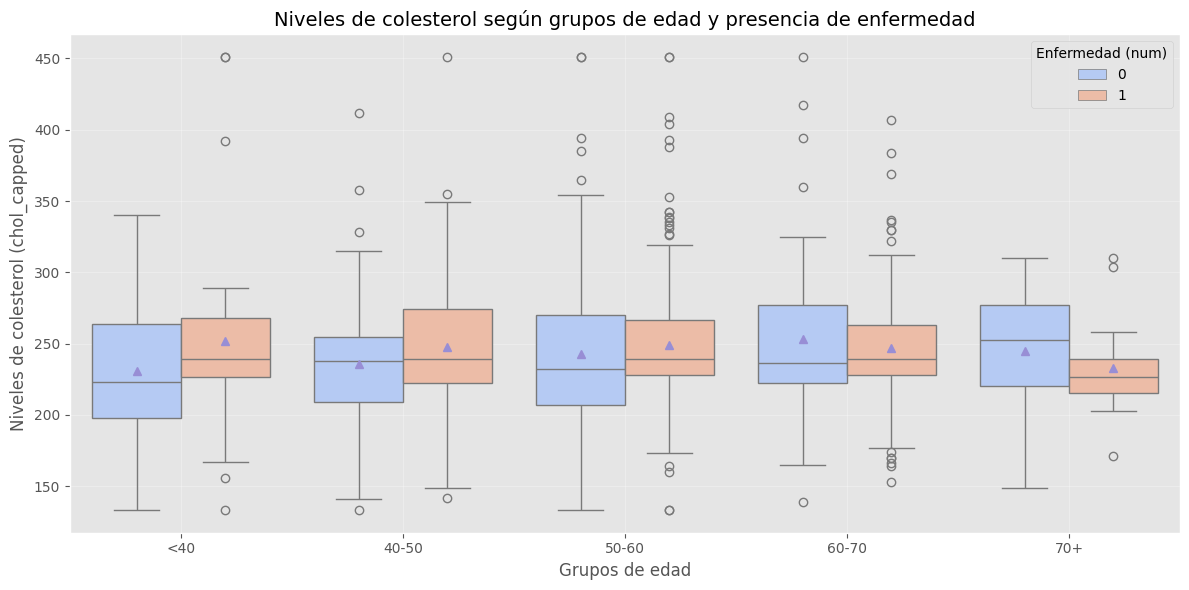

Resultados de Kruskal-Wallis por grupo de edad:
Grupo de edad 60-70: Estadístico=0.0811, p-valor=0.7759
Grupo de edad <40: Estadístico=1.3587, p-valor=0.2438
Grupo de edad 40-50: Estadístico=2.2208, p-valor=0.1362
Grupo de edad 50-60: Estadístico=3.9321, p-valor=0.0474
Grupo de edad 70+: Estadístico=0.9049, p-valor=0.3415


In [2800]:
from scipy.stats import kruskal

# Crear grupos de edad
uci_data['age_group'] = pd.cut(uci_data['age'], bins=[0, 40, 50, 60, 70, 80], labels=['<40', '40-50', '50-60', '60-70', '70+'])

# Visualización: Gráfico de barras para niveles de colesterol por grupo de edad y enfermedad
plt.figure(figsize=(12, 6))
sns.boxplot(data=uci_data, x='age_group', y='chol_capped', hue='num', palette='coolwarm', showmeans=True)
plt.title("Niveles de colesterol según grupos de edad y presencia de enfermedad", fontsize=14)
plt.xlabel("Grupos de edad", fontsize=12)
plt.ylabel("Niveles de colesterol (chol_capped)", fontsize=12)
plt.legend(title="Enfermedad (num)", fontsize=10)
plt.grid(visible=True, alpha=0.3)
plt.tight_layout()
plt.show()

# Análisis estadístico: Prueba de Kruskal-Wallis para cada grupo de edad
kruskal_results = {}
for group in uci_data['age_group'].unique():
    subset = uci_data[uci_data['age_group'] == group]
    groups = subset.groupby('num')['chol_capped'].apply(list)
    if len(groups) > 1:
        stat, p = kruskal(*groups)
        kruskal_results[group] = {'Estadístico': stat, 'p-valor': p}

# Mostrar resultados
print("Resultados de Kruskal-Wallis por grupo de edad:")
for group, result in kruskal_results.items():
    print(f"Grupo de edad {group}: Estadístico={result['Estadístico']:.4f}, p-valor={result['p-valor']:.4f}")


#### **Análisis realizado:**
1. Se agruparon los pacientes en rangos de edad: `<40`, `40-50`, `50-60`, `60-70`, `70+`.
2. Se compararon los niveles de colesterol (`chol_capped`) entre pacientes con (`num=1`) y sin enfermedad (`num=0`) dentro de cada grupo de edad.
3. Se aplicó la prueba de Kruskal-Wallis para evaluar diferencias estadísticamente significativas en los niveles de colesterol entre los dos grupos en cada rango de edad.

#### **Resultados:**
- **Gráfico:**
  - Los niveles de colesterol no muestran diferencias claras entre pacientes con y sin enfermedad en la mayoría de los grupos de edad.
  - Sin embargo, en el grupo de `50-60`, se observa una leve tendencia de niveles más altos en pacientes con enfermedad.

- **Prueba de Kruskal-Wallis:**
  - Grupo de edad `<40`: Estadístico=1.3587, p-valor=0.2438 (no significativo).
  - Grupo de edad `40-50`: Estadístico=2.2208, p-valor=0.1362 (no significativo).
  - Grupo de edad `50-60`: Estadístico=3.9321, p-valor=0.0474 (**significativo**).
  - Grupo de edad `60-70`: Estadístico=0.0811, p-valor=0.7759 (no significativo).
  - Grupo de edad `70+`: Estadístico=0.9049, p-valor=0.3415 (no significativo).

#### **Conclusiones:**
- Los niveles de colesterol no presentan una relación consistente con la presencia de enfermedad en todos los grupos de edad.
- Solo en el rango de edad `50-60` se encontraron diferencias estadísticamente significativas, sugiriendo que el colesterol puede ser un indicador relevante en este grupo específico.
- En los demás grupos de edad, los niveles de colesterol no son un diferenciador confiable entre pacientes con y sin enfermedad.




---

#### **¿Existe una relación entre la edad de los pacientes y el diagnóstico de enfermedad cardíaca (Num)?**

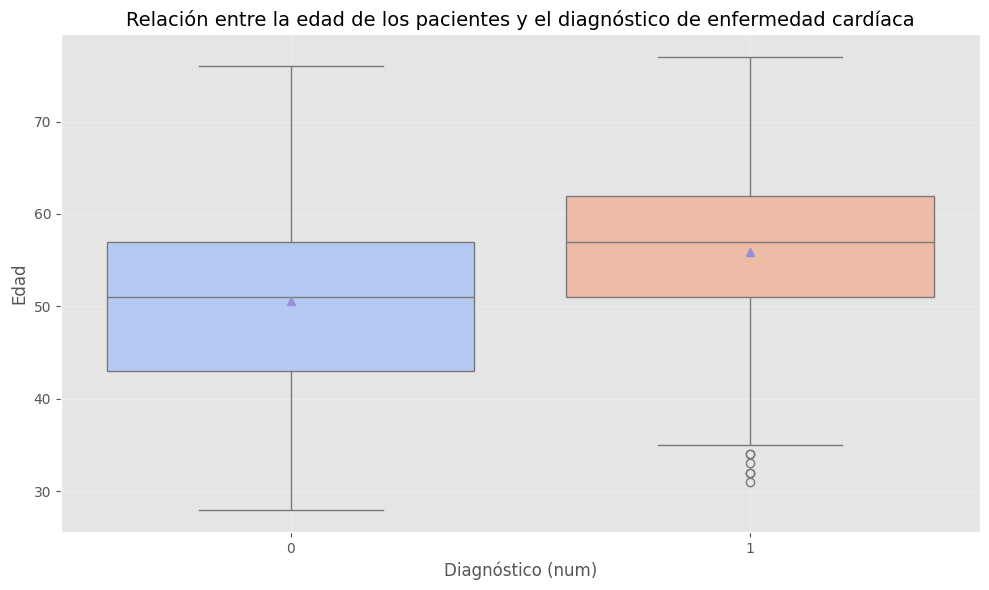

Prueba de Kruskal-Wallis: Estadístico=77.5601, p-valor=0.0000


In [2801]:
from scipy.stats import kruskal

# Visualización: Relación entre la edad y el diagnóstico
plt.figure(figsize=(10, 6))
sns.boxplot(data=uci_data, x='num', y='age', palette='coolwarm', showmeans=True)
plt.title("Relación entre la edad de los pacientes y el diagnóstico de enfermedad cardíaca", fontsize=14)
plt.xlabel("Diagnóstico (num)", fontsize=12)
plt.ylabel("Edad", fontsize=12)
plt.grid(visible=True, alpha=0.3)
plt.tight_layout()
plt.show()

# Análisis estadístico: Prueba de Kruskal-Wallis
groups = uci_data.groupby('num')['age'].apply(list)
stat, p = kruskal(*groups)

# Mostrar resultados
print(f"Prueba de Kruskal-Wallis: Estadístico={stat:.4f}, p-valor={p:.4f}")


#### **Análisis realizado:**
1. **Gráfico de caja:**
   - Se compararon las distribuciones de edad entre pacientes con (`num=1`) y sin enfermedad (`num=0`).
   - La mediana de edad en pacientes con enfermedad es más alta que en los pacientes sin enfermedad.

2. **Prueba estadística:**
   - Se aplicó la prueba de Kruskal-Wallis para evaluar si existen diferencias estadísticamente significativas en la edad entre ambos grupos.

#### **Resultados:**
- **Gráfico:**
  - Los pacientes diagnosticados con enfermedad cardíaca (`num=1`) tienen una distribución de edad desplazada hacia valores más altos en comparación con los pacientes sin enfermedad (`num=0`).
- **Prueba de Kruskal-Wallis:**
  - Estadístico=77.5601, p-valor=0.0000.
  - **Conclusión:** Las diferencias en la edad entre los dos grupos son estadísticamente significativas.

#### **Conclusión general:**
- Existe una relación significativa entre la edad y el diagnóstico de enfermedad cardíaca.
- Los pacientes con enfermedad tienden a ser mayores en comparación con los pacientes sin enfermedad.


---

#### **¿Hay  diferencias significativas en las tasas de enfermedad cardíaca entre hombres y mujeres dentro del rango de edades predominante?** 

<Figure size 800x600 with 0 Axes>

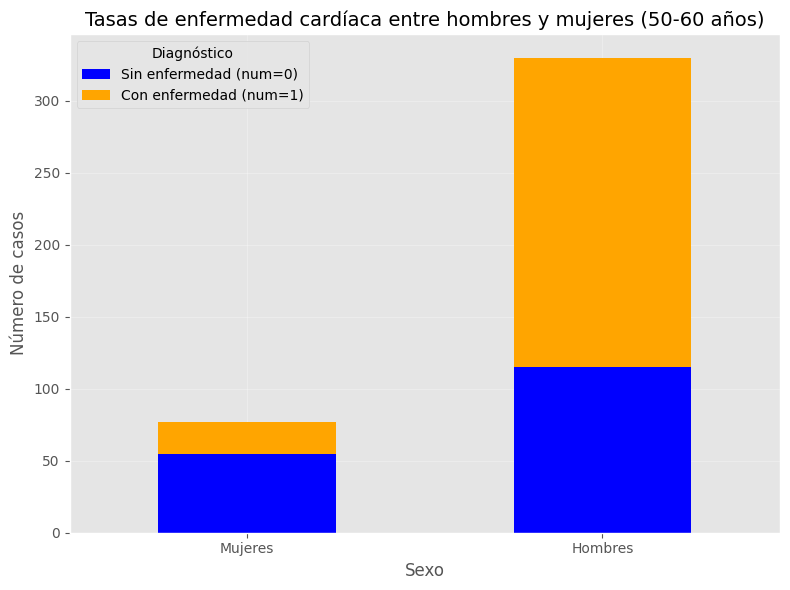

Prueba de Chi-cuadrado: Estadístico=32.8597, p-valor=0.0000


In [2802]:
from scipy.stats import chi2_contingency

# Seleccionar rango de edad predominante (50-60 años, por ejemplo)
rango_edades = uci_data[(uci_data['age'] >= 50) & (uci_data['age'] <= 60)]

# Contar casos de enfermedad cardíaca por sexo dentro del rango de edad
tabla_contingencia = pd.crosstab(rango_edades['sex_Male'], rango_edades['num'])

# Gráfico de barras agrupado por sexo
plt.figure(figsize=(8, 6))
tabla_contingencia.plot(kind='bar', stacked=True, color=['blue', 'orange'], figsize=(8, 6))
plt.title("Tasas de enfermedad cardíaca entre hombres y mujeres (50-60 años)", fontsize=14)
plt.xlabel("Sexo", fontsize=12)
plt.ylabel("Número de casos", fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Mujeres', 'Hombres'], rotation=0)
plt.legend(['Sin enfermedad (num=0)', 'Con enfermedad (num=1)'], title="Diagnóstico")
plt.tight_layout()
plt.grid(visible=True, alpha=0.3)
plt.show()

# Prueba de Chi-cuadrado
chi2, p, _, _ = chi2_contingency(tabla_contingencia)

# Mostrar resultados
print(f"Prueba de Chi-cuadrado: Estadístico={chi2:.4f}, p-valor={p:.4f}")


### **¿Hay diferencias significativas en las tasas de enfermedad cardíaca entre hombres y mujeres dentro del rango de edades predominante?**

#### **Resultados:**
1. **Visualización:** 
   - El gráfico de barras muestra que los hombres tienen una mayor proporción de casos de enfermedad cardíaca (`num=1`) en el rango de edad de 50-60 años en comparación con las mujeres.

2. **Prueba estadística:**
   - **Chi-cuadrado:** Estadístico=32.8597, p-valor=0.0000.
   - **Conclusión:** La diferencia en las tasas de enfermedad cardíaca entre hombres y mujeres en este rango de edad es **estadísticamente significativa** (p-valor < 0.05).

#### **Interpretación:**
- Este análisis destaca una discrepancia significativa en la prevalencia de enfermedad cardíaca según el sexo dentro del rango de edad predominante (50-60 años). Esto sugiere que el sexo es un factor importante a considerar en el diagnóstico y tratamiento de enfermedades cardíacas.
- Debemos recordar que el dataset esta desbalanceado en sexo, y hay muchos mas registros de hombres que de mujeres


#### **¿Cuál es el umbral de presión arterial que parece estar más asociado con la presencia de enfermedad cardíaca?**

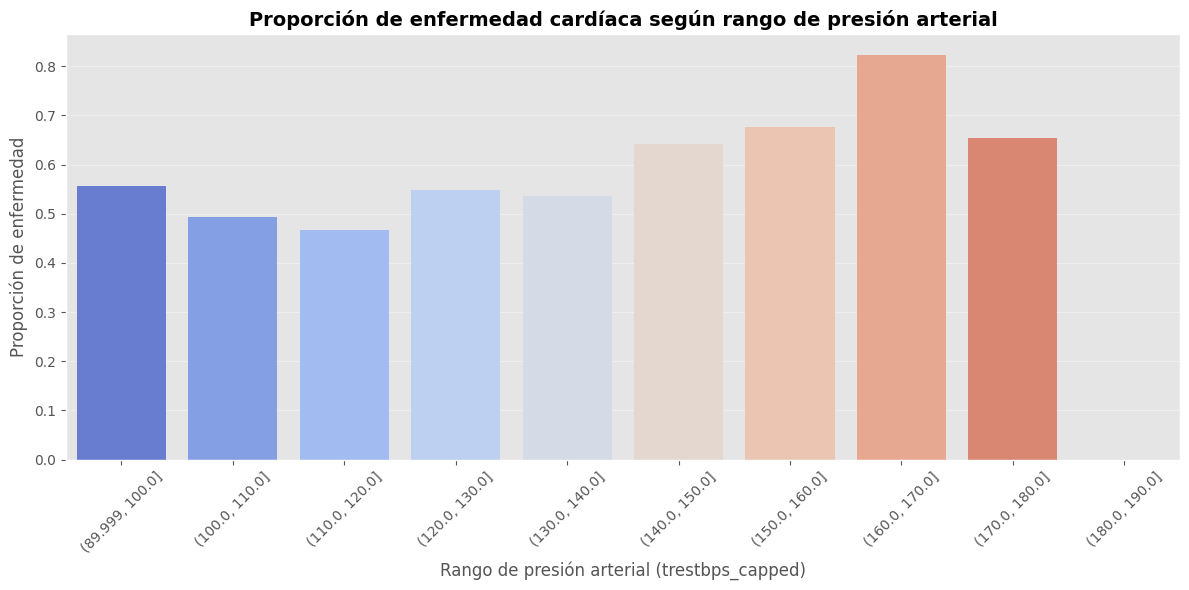

Rango con mayor proporción de enfermedad: (160.0, 170.0] con una proporción de 0.82


In [2803]:
# Crear un rango de presión arterial
uci_data['trestbps_capped_bins'] = pd.cut(
    uci_data['trestbps_capped'], 
    bins=np.arange(90, 200, 10), 
    include_lowest=True
)

# Calcular proporción de enfermedad cardíaca por cada rango
trestbps_grouped = (
    uci_data.groupby('trestbps_capped_bins')['num']
    .mean()
    .reset_index()
    .rename(columns={'num': 'Proporción de enfermedad'})
)

# Visualización
plt.figure(figsize=(12, 6))
sns.barplot(
    x='trestbps_capped_bins', 
    y='Proporción de enfermedad', 
    data=trestbps_grouped, 
    palette='coolwarm'
)
plt.xticks(rotation=45, fontsize=10)
plt.title("Proporción de enfermedad cardíaca según rango de presión arterial", fontsize=14, fontweight='bold')
plt.xlabel("Rango de presión arterial (trestbps_capped)", fontsize=12)
plt.ylabel("Proporción de enfermedad", fontsize=12)
plt.grid(axis='y', alpha=0.4)
plt.tight_layout()
plt.show()

# Rango con mayor proporción de enfermedad
max_risk_range = trestbps_grouped.loc[
    trestbps_grouped['Proporción de enfermedad'].idxmax()
]
print(f"Rango con mayor proporción de enfermedad: {max_risk_range['trestbps_capped_bins']} "
      f"con una proporción de {max_risk_range['Proporción de enfermedad']:.2f}")


### **¿Cuál es el umbral de presión arterial que parece estar más asociado con la presencia de enfermedad cardíaca?**

#### **Resultados:**
1. **Visualización:**
   - El rango de presión arterial con mayor proporción de enfermedad cardíaca es (160.0, 170.0], con una proporción de 0.82.

#### **Interpretación:**
- Estos resultados sugieren que, a partir de aproximadamente **160 mmHg** de presión arterial sistólica, la probabilidad de presentar enfermedad cardíaca aumenta de forma significativa.



#### ¿La combinación de colesterol alto y presión arterial elevada aumenta significativamente el riesgo de enfermedad? 

Chi-cuadrado: 18.5576, p-valor: 0.0003


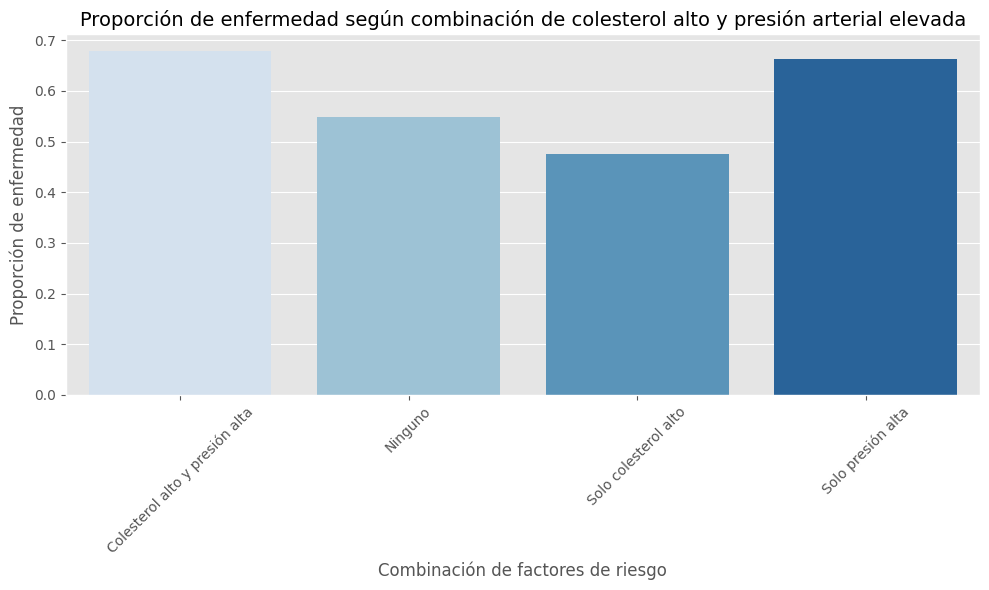

In [2804]:
# Crear una nueva columna categórica que combine colesterol alto y presión arterial elevada
def combinar_factores(row):
    if row['chol_capped'] > 240 and row['trestbps_capped'] > 140:
        return 'Colesterol alto y presión alta'
    elif row['chol_capped'] > 240:
        return 'Solo colesterol alto'
    elif row['trestbps_capped'] > 140:
        return 'Solo presión alta'
    else:
        return 'Ninguno'

# Aplicar la función para crear la nueva columna
uci_data['combinacion_riesgo'] = uci_data.apply(combinar_factores, axis=1)

# Contar la cantidad de casos para cada combinación
contar_combinaciones = pd.crosstab(uci_data['combinacion_riesgo'], uci_data['num'])

# Evaluar la relación con un Chi-cuadrado
from scipy.stats import chi2_contingency
stat, p_value, dof, expected = chi2_contingency(contar_combinaciones)

# Mostrar resultados
print(f"Chi-cuadrado: {stat:.4f}, p-valor: {p_value:.4f}")

# Visualización de la proporción de enfermedad por combinación

plt.figure(figsize=(10, 6))
sns.barplot(x=contar_combinaciones.index, y=contar_combinaciones[1] / (contar_combinaciones[0] + contar_combinaciones[1]), palette='Blues')
plt.title("Proporción de enfermedad según combinación de colesterol alto y presión arterial elevada", fontsize=14)
plt.xlabel("Combinación de factores de riesgo", fontsize=12)
plt.ylabel("Proporción de enfermedad", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### **Resultados:**
1. **Visualización:**
   - El gráfico muestra que el grupo con colesterol alto **y** presión arterial elevada presenta la mayor proporción de casos de enfermedad, seguido por el grupo con solo presión arterial alta.
   
2. **Prueba estadística:**
   - **Chi-cuadrado:** Estadístico=18.5576, p-valor=0.0003.
   - **Conclusión:** Dado que el p-valor es menor a 0.05, la diferencia en las tasas de enfermedad según la combinación de colesterol alto y presión arterial elevada es **estadísticamente significativa**.

#### **Interpretación:**
- Estos resultados sugieren que la combinación de colesterol alto y presión arterial elevada se asocia con un aumento significativo en el riesgo de padecer enfermedad cardíaca, más que presentar únicamente uno de estos factores por separado.



#### ¿Cómo se distribuyen las categorías de Restecg según la variable objetivo? 

Chi-cuadrado: 13.3352, p-valor: 0.0040


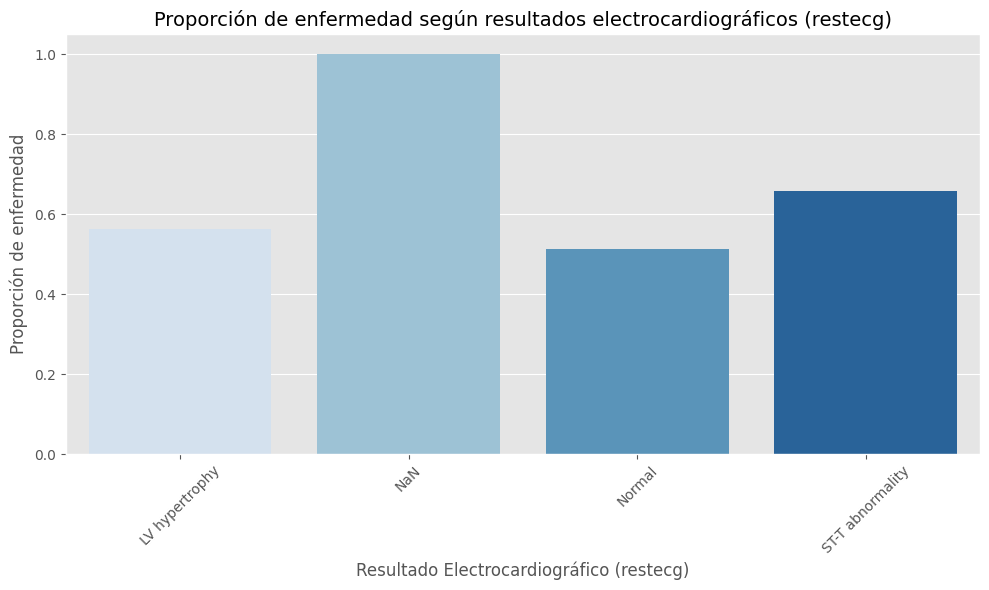

In [2805]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una sola columna categórica para restecg
def clasificar_restecg(row):
    if row['restecg_normal'] == 1:
        return 'Normal'
    elif row['restecg_st-t abnormality'] == 1:
        return 'ST-T abnormality'
    elif row['restecg_lv hypertrophy'] == 1:
        return 'LV hypertrophy'
    else:
        return 'NaN'

uci_data['restecg_category'] = uci_data.apply(clasificar_restecg, axis=1)

# Crear la tabla de contingencia
contar_restecg = pd.crosstab(uci_data['restecg_category'], uci_data['num'])

# Prueba Chi-cuadrado
stat, p_value, dof, expected = chi2_contingency(contar_restecg)
print(f"Chi-cuadrado: {stat:.4f}, p-valor: {p_value:.4f}")

# Visualizar la proporción de enfermedad por categoría de restecg
plt.figure(figsize=(10, 6))
# Asegúrate de que '0' y '1' son las columnas de 'num'
if 0 in contar_restecg.columns and 1 in contar_restecg.columns:
    proporciones = contar_restecg[1] / (contar_restecg[0] + contar_restecg[1])
    sns.barplot(x=contar_restecg.index, y=proporciones, palette='Blues')
    plt.title("Proporción de enfermedad según resultados electrocardiográficos (restecg)", fontsize=14)
    plt.xlabel("Resultado Electrocardiográfico (restecg)", fontsize=12)
    plt.ylabel("Proporción de enfermedad", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No existen las columnas 0 y/o 1 en la tabla de contingencia. Verifique la codificación de 'num'.")


#### **Resultados:**
1. **Visualización:**
   - El gráfico muestra que existe variabilidad en la proporción de casos de enfermedad entre las diferentes categorías de resultados electrocardiográficos (`restecg`).
   - Se observa una proporción de enfermedad particularmente alta en la categoría “NaN” (Valores Nulos).

2. **Prueba estadística:**
   - **Chi-cuadrado:** Estadístico=13.3352, p-valor=0.0040.
   - **Conclusión:** Dado que el p-valor es menor a 0.05, se rechaza la hipótesis nula de independencia. Esto indica que las diferencias en la distribución de la enfermedad entre las categorías de `restecg` son **estadísticamente significativas**.

#### **Interpretación:**
- Los resultados sugieren que la categoría electrocardiográfica puede tener una asociación significativa con la presencia o ausencia de la enfermedad.  
- En general, estos hallazgos señalan que las diferentes anormalidades (o falta de información) en el electrocardiograma sí podrían relacionarse con la prevalencia de enfermedad cardíaca.


## **5.3. Aspectos Avanzados:** 

### ¿Las personas con resultados electrocardiográficos normales presentan menor incidencia de enfermedad en comparación con las otras categorías?

Chi-cuadrado: 8.3424, p-valor: 0.0039


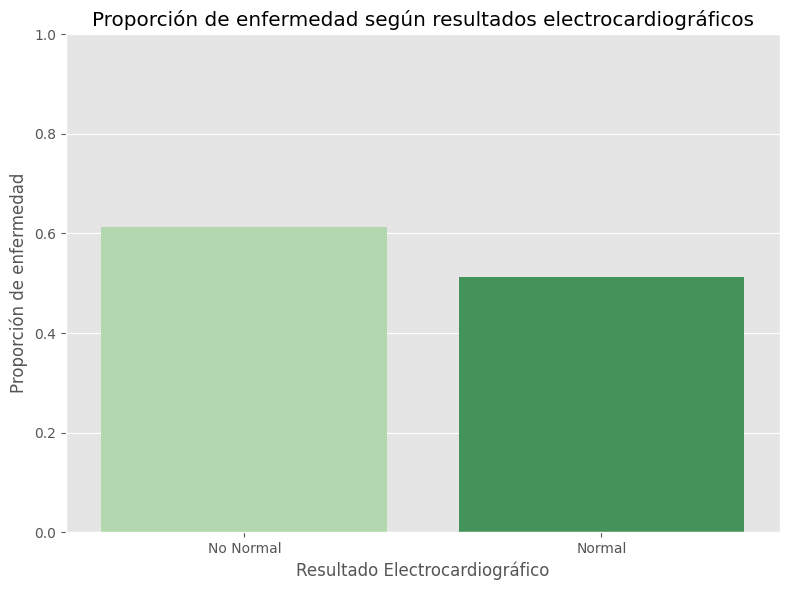

In [2806]:

from scipy.stats import chi2_contingency

# Crear una variable categórica: 'Normal' vs 'No Normal'
uci_data['restecg_binary'] = np.where(uci_data['restecg_normal'] == 1, 'Normal', 'No Normal')

# Crear tabla de contingencia
contar_restecg = pd.crosstab(uci_data['restecg_binary'], uci_data['num'])

# Prueba Chi-cuadrado
stat, p_value, dof, expected = chi2_contingency(contar_restecg)
print(f"Chi-cuadrado: {stat:.4f}, p-valor: {p_value:.4f}")

# Visualización de la proporción de enfermedad por categoría
plt.figure(figsize=(8,6))
proporciones = contar_restecg[1] / (contar_restecg[0] + contar_restecg[1])
sns.barplot(x=contar_restecg.index, y=proporciones, palette='Greens')
plt.title("Proporción de enfermedad según resultados electrocardiográficos")
plt.xlabel("Resultado Electrocardiográfico")
plt.ylabel("Proporción de enfermedad")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()



#### **Resultados:**
1. **Visualización:**
   - El gráfico muestra que la categoría "Normal" tiene una proporción significativamente menor de casos de enfermedad en comparación con la categoría "No Normal".
   - Las categorías "No Normal" presentan una mayor proporción de enfermedad, indicando una posible asociación entre resultados electrocardiográficos anormales y la presencia de enfermedad cardíaca.

2. **Prueba estadística:**
   - **Chi-cuadrado:** Estadístico=8.3424, p-valor=0.0039.
   - **Conclusión:** Dado que el p-valor es menor a 0.05, la diferencia en las tasas de enfermedad entre las categorías "Normal" y "No Normal" es **estadísticamente significativa**.

#### **Interpretación:**

- **Incidencia de enfermedad:** Las personas con resultados electrocardiográficos normales presentan una incidencia de enfermedad significativamente menor en comparación con aquellas que tienen resultados anormales.

- **Asociación significativa:** La prueba Chi-cuadrado indica una asociación significativa entre los resultados electrocardiográficos y la presencia de enfermedad cardíaca, sugiriendo que los resultados anormales en el electrocardiograma son un factor de riesgo importante.





•¿Cómo  afecta  la  interacción  entre  variables  categóricas  (por  ejemplo, 
Sexo y Cp) a la probabilidad de enfermedad? 
•¿Existen patrones claros de datos faltantes en alguna variable? ¿Están 
relacionados con otras variables del dataset? 
•¿Qué  diferencias  clave  se  observan  en  los  pacientes  diagnosticados 
con enfermedad cardíaca en comparación con los que no la tienen? 
Preguntas sobre el modelo: 
•¿Qué  variables  deberían  seleccionarse  como  predictores  principales 
en un modelo basado en el análisis exploratorio? 
•¿Qué  transformación  de  las  variables  puede  ser  útil  para  mejorar  la 
performance del modelo? 
•¿Se  justifica  el  balanceo  de  los  datos  si  la  distribución  de  la  variable 
objetivo está muy sesgada? 
Estas preguntas sirven como guía inicial, pero tienen libertad para explorar 
otros aspectos del dataset y proponer análisis adicionales que consideren 
relevantes. ¡El objetivo es profundizar en el conocimiento de los datos y 
sacar conclusiones significativas! 
Guía para la entrega 
La entrega deberá realizarse en un Jupyter Notebook y debe ser 
completamente reproducible. El trabajo deberá estructurarse en las 
siguientes partes: 
1. Descripción del problema y objetivos 
Incluir una introducción clara que explique el problema a resolver, los 
objetivos específicos del análisis y las preguntas clave a responder a lo largo 
del proyecto. 
2. Lectura y descripción del dataset 
Leer los datos e incluyan una descripción detallada del dataset: 
•Dimensiones (número de observaciones y variables). 
•Tipos de variables (cuantitativas, categóricas). 
•Significado de cada columna y posibles insights iniciales. 
3. Limpieza de datos (Data Cleaning) 
Realizar el preprocesamiento necesario, incluyendo: 
•Identificación de datos faltantes. 
•Análisis del porcentaje de valores ausentes en cada variable. 
•Clasificación del tipo de datos faltantes (MCAR, MAR, MNAR). 
•Estrategias  utilizadas  para  el  tratamiento  de  los  valores  ausentes  y 
justificación de las mismas. 
•Otros tipo de transformaciones y análisis si son necesarios 
4. Análisis Exploratorio de Datos (EDA) 
Análisis exploratorio de los datos: 
•Visualizaciones y estadísticas descriptivas para comprender las 
distribuciones de las variables. 
•Identificación  de  relaciones  clave  entre  variables  y  con  la  variable 
objetivo (Num). 
•Respuestas a las preguntas planteadas inicialmente y cualquier insight 
adicional obtenido. 
5. Modelado 
Construir modelos predictivos para la variable objetivo (Num), basándose en 
las variables identificadas como relevantes durante el EDA: 
•Justificar la selección de las variables y el tipo de modelo. 
•Realizar un análisis comparativo de diferentes modelos si es posible. 
6. Evaluación 
Evaluar el rendimiento de los modelos utilizando métricas adecuadas. Es 
importante la interpretación de los resultados obtenidos y reflexionar sobre 
su validez y limitaciones. 
7. Conclusiones 
Resuman los hallazgos principales, incluyendo: 
•Las preguntas iniciales respondidas. 
•Las variables clave identificadas. 
•Los modelos más efectivos y las métricas de evaluación. 
•Posibles áreas de mejora y análisis futuros. 
El notebook debe ser claro, bien documentado y contener explicaciones 
detalladas de cada paso. Se valorará la calidad del código, el uso eficiente 
de librerías y la claridad en la interpretación de los resultados.

2. Identificación de Variables

* Revisaremos las variables para entender:
* ¿Cuáles son numéricas?
* ¿Cuáles son categóricas?
* ¿Qué queremos analizar (relaciones entre variables, diferencias por grupos, etc.)?


# **6. Features Engineering**

In [2807]:
# 1. Verificar las categorías únicas en la columna 'sex'
print("Categorías en 'sex':")
print(uci_data['sex'].unique())

# 3. Aplicar One-Hot Encoding a la columna 'sex'

sex_dummies = pd.get_dummies(uci_data['sex'], prefix='sex', drop_first=True)

# 4. Integrar las nuevas columnas al DataFrame original
uci_data = pd.concat([uci_data, sex_dummies], axis=1)

# Si ya no necesitas la columna original, puedes eliminarla
uci_data.drop('sex', axis=1, inplace=True)

# 6. Verificar las nuevas columnas
print("\nNuevas columnas después del One-Hot Encoding:")
print(sex_dummies.head())




Categorías en 'sex':
['Male' 'Female']

Nuevas columnas después del One-Hot Encoding:
   sex_Male
0      True
1      True
2      True
3      True
4     False


In [2808]:
# Listar las columnas del dataset
print("Columnas disponibles en el dataset:")
for i, col in enumerate(uci_data.columns):
    print(f"{i}: {col}")

print (uci_data.info())

Columnas disponibles en el dataset:
0: age
1: num
2: num_old
3: chol_capped
4: trestbps_capped
5: oldpeak_capped
6: thalch_capped
7: dataset_Cleveland
8: dataset_Hungary
9: dataset_Switzerland
10: dataset_VA Long Beach
11: exang_False
12: exang_True
13: exang_NaN
14: slope_NaN
15: slope_downsloping
16: slope_flat
17: slope_upsloping
18: thal_NaN
19: thal_fixed defect
20: thal_normal
21: thal_reversable defect
22: cp_asymptomatic
23: cp_atypical angina
24: cp_non-anginal
25: cp_typical angina
26: restecg_NaN
27: restecg_lv hypertrophy
28: restecg_normal
29: restecg_st-t abnormality
30: fbs_False
31: fbs_True
32: fbs_NaN
33: sex_Female
34: sex_Male
35: ca_0.0
36: ca_1.0
37: ca_2.0
38: ca_3.0
39: ca_NaN
40: thalch_capped_imputed
41: chol_capped_imputed
42: trestbps_capped_imputed
43: oldpeak_capped_imputed
44: chol_capped_log
45: trestbps_capped_log
46: oldpeak_capped_log
47: age_group
48: trestbps_capped_bins
49: combinacion_riesgo
50: restecg_category
51: restecg_binary
52: sex_Male
<cl

## **Interacciones entre Variables**

### **Edad y Presión Arterial (age * trestbps_capped)**

**Descripción**: La interacción entre la edad y la presión arterial puede capturar el efecto combinado de estos factores sobre el riesgo de enfermedad cardíaca.


In [2809]:
uci_data['age_trestbps_interaction'] = uci_data['age'] * uci_data['trestbps_capped']

### **Colesterol y Edad (chol_capped * age)**

Descripción: Similar a la interacción anterior, esta característica puede resaltar cómo el colesterol influye en diferentes grupos etarios.


In [2810]:
uci_data['chol_age_interaction'] = uci_data['chol_capped'] * uci_data['age']


## **Características Basadas en Agrupaciones de Variables Categóricas**

### **Perfil de Presión Arterial y Colesterol**
Descripción: Crear una categorización combinada de presión arterial y colesterol puede ayudar a identificar perfiles de riesgo específicos.

In [2811]:
bins_trestbps = [0, 120, 140, 160, np.inf]
labels_trestbps = ['Normal', 'Elevada', 'Alta', 'Muy Alta']
uci_data['trestbps_category'] = pd.cut(uci_data['trestbps_capped'], bins=bins_trestbps, labels=labels_trestbps)

bins_chol = [0, 200, 240, np.inf]
labels_chol = ['Deseable', 'Límite Alto', 'Alto']
uci_data['chol_category'] = pd.cut(uci_data['chol_capped'], bins=bins_chol, labels=labels_chol)

uci_data['trestbps_chol_profile'] = uci_data['trestbps_category'].astype(str) + '_' + uci_data['chol_category'].astype(str)


## **Conteo de Variables Categóricas Anormales**

### **Número de Anomalías en Resultados Electrocardiográficos**

**Descripción**: Contar cuántas categorías electrocardiográficas están presentes puede indicar la severidad de las anomalías.

In [2812]:
uci_data['restecg_anomalies_count'] = uci_data[['restecg_lv hypertrophy', 'restecg_st-t abnormality']].sum(axis=1)


### **Número de Defectos en Thalassemia (thal)**

**Descripción**: Contar los tipos de defectos en la columna thal puede proporcionar una medida de la severidad.

In [2813]:
uci_data['thal_defects_count'] = uci_data[['thal_fixed defect', 'thal_reversable defect']].sum(axis=1)


## **Transformaciones Matemáticas y Logarítmicas**

### **Logaritmo del Colesterol y Presión Arterial**
**Descripción**: Aplicar una transformación logarítmica puede ayudar a manejar la asimetría en la distribución de estas variables.

In [2814]:
uci_data['log_chol'] = np.log1p(uci_data['chol_capped'])
uci_data['log_trestbps'] = np.log1p(uci_data['trestbps_capped'])


## **Características Derivadas de Variables Existentes**

### **Índice de Masa Corporal (BMI) Estimado**
**Descripción**: Si tuviera datos de peso y altura, podría calcular el BMI. Dado que no están disponibles, estimaré una característica relacionada con la complexión física.

In [2815]:
uci_data['age_trestbps_group'] = pd.qcut(uci_data['age'] * uci_data['trestbps_capped'], q=4, labels=False)

# **7. Modelado**

In [2816]:
uci_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 63 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       920 non-null    int64   
 1   num                       920 non-null    int64   
 2   num_old                   920 non-null    int64   
 3   chol_capped               920 non-null    float64 
 4   trestbps_capped           920 non-null    float64 
 5   oldpeak_capped            920 non-null    float64 
 6   thalch_capped             920 non-null    float64 
 7   dataset_Cleveland         920 non-null    bool    
 8   dataset_Hungary           920 non-null    bool    
 9   dataset_Switzerland       920 non-null    bool    
 10  dataset_VA Long Beach     920 non-null    bool    
 11  exang_False               920 non-null    bool    
 12  exang_True                920 non-null    bool    
 13  exang_NaN                 920 non-null    bool    

## Limpiamos columnas redundantes y consolidamos duplicadas

### Acciones antes del pipeline:

1. Eliminamos las columnas creadas para los analisis del EDA, asi como aquellas variables redundantes de las que tenemos varias versiones, (original y transformada)

2. Devolveremos el dataset a su estado original (variables categoricas), de esta forma dejamos al pipeline que realice el one hot encoding a todas las variables, y evitamos que se produzcan inconsistencia (Aunque el proceso se redundante). Esto es debido a que tuvimos que realizar encodings en pasos anteriores para realizar el EDA y para imputar valores.



In [2817]:
# Paso 1: Eliminar columnas creadas para EDA que no son necesarias para el modelado
columns_to_drop = [
    # Variables creadas en el EDA
    'age_group', 'trestbps_capped_bins', 'trestbps_category', 'chol_category',
    'restecg_category', 'restecg_binary', 'trestbps_chol_profile', 
    'combinacion_riesgo', 'age_trestbps_group', 'restecg_anomalies_count', 'thal_defects_count',
    
    # Variables redundantes en logaritmo (puedes quedarte con una versión)
    'chol_capped_log', 'trestbps_capped_log', 'oldpeak_capped_log',
    'log_chol', 'log_trestbps',
    
    # Variables imputadas (usaremos los valores ya imputados en capped)
    #'chol_capped_imputed', 'trestbps_capped_imputed', 'oldpeak_capped_imputed',
    
    # Variable redundante del objetivo
    'num_old'
]

uci_data = uci_data.drop(columns=columns_to_drop)

In [2818]:
# Paso 2: Simplificar variables one-hot encoding a categóricas
# 2.1. exang (True/False/NaN)
uci_data['exang'] = (
    uci_data[['exang_False', 'exang_True', 'exang_NaN']]  # Selecciona las columnas relacionadas con 'exang'.
    .idxmax(axis=1)                                      # Encuentra la columna con el valor máximo para cada fila.
    .str.replace('exang_', '')                           # Quita el prefijo 'exang_' para dejar el valor original ('False', 'True', 'NaN').
)
uci_data = uci_data.drop(columns=['exang_False', 'exang_True', 'exang_NaN'])  # Elimina las columnas binarias originales.


# 2.2. slope (Categoría)
uci_data['slope'] = (
    uci_data[['slope_NaN', 'slope_downsloping', 'slope_flat', 'slope_upsloping']]
    .idxmax(axis=1)
    .str.replace('slope_', '')
)
uci_data = uci_data.drop(columns=['slope_NaN', 'slope_downsloping', 'slope_flat', 'slope_upsloping'])

# 2.3. thal (Categoría)
uci_data['thal'] = (
    uci_data[['thal_NaN', 'thal_fixed defect', 'thal_normal', 'thal_reversable defect']]
    .idxmax(axis=1)
    .str.replace('thal_', '')
)
uci_data = uci_data.drop(columns=['thal_NaN', 'thal_fixed defect', 'thal_normal', 'thal_reversable defect'])

# 2.4. cp (Categoría)
uci_data['cp'] = (
    uci_data[['cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina']]
    .idxmax(axis=1)
    .str.replace('cp_', '')
)
uci_data = uci_data.drop(columns=['cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina'])

# 2.5. restecg (Categoría)
uci_data['restecg'] = (
    uci_data[['restecg_NaN', 'restecg_lv hypertrophy', 'restecg_normal', 'restecg_st-t abnormality']]
    .idxmax(axis=1)
    .str.replace('restecg_', '')
)
uci_data = uci_data.drop(columns=['restecg_NaN', 'restecg_lv hypertrophy', 'restecg_normal', 'restecg_st-t abnormality'])

# 2.6. fbs (True/False/NaN)
uci_data['fbs'] = (
    uci_data[['fbs_False', 'fbs_True', 'fbs_NaN']]
    .idxmax(axis=1)
    .str.replace('fbs_', '')
)
uci_data = uci_data.drop(columns=['fbs_False', 'fbs_True', 'fbs_NaN'])

# 2.7. sex (Categoría)
uci_data['sex'] = (
    uci_data[['sex_Female', 'sex_Male']]
    .idxmax(axis=1)
    .str.replace('sex_', '')
)
uci_data = uci_data.drop(columns=['sex_Female', 'sex_Male'])

# 2.8. ca (Categoría)
uci_data['ca'] = (
    uci_data[['ca_0.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'ca_NaN']]
    .idxmax(axis=1)
    .str.replace('ca_', '')
)
uci_data = uci_data.drop(columns=['ca_0.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'ca_NaN'])


In [2819]:
# Paso 3: Verificar datos limpios
print("\nColumnas finales después de limpieza:")
print(uci_data.columns)




Columnas finales después de limpieza:
Index(['age', 'num', 'chol_capped', 'trestbps_capped', 'oldpeak_capped',
       'thalch_capped', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'thalch_capped_imputed',
       'chol_capped_imputed', 'trestbps_capped_imputed',
       'oldpeak_capped_imputed', 'age_trestbps_interaction',
       'chol_age_interaction', 'exang', 'slope', 'thal', 'cp', 'restecg',
       'fbs', 'sex', 'ca'],
      dtype='object')


In [2820]:
# Paso 4: Revisar las categorías generadas
for col in ['exang', 'slope', 'thal', 'cp', 'restecg', 'fbs', 'sex', 'ca']:
    print(f"\nValores únicos en {col}:")
    print(uci_data[col].unique())


Valores únicos en exang:
['False' 'True' 'NaN']

Valores únicos en slope:
['downsloping' 'flat' 'upsloping' 'NaN']

Valores únicos en thal:
['fixed defect' 'normal' 'reversable defect' 'NaN']

Valores únicos en cp:
['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']

Valores únicos en restecg:
['lv hypertrophy' 'normal' 'st-t abnormality' 'NaN']

Valores únicos en fbs:
['True' 'False' 'NaN']

Valores únicos en sex:
['Male' 'Female']

Valores únicos en ca:
['0.0' '3.0' '2.0' '1.0' 'NaN']


In [2821]:
import pandas as pd
import numpy as np
from collections import defaultdict
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, confusion_matrix

from IPython.display import display  # Para usar 'display' en visualizaciones

In [2822]:
# Paso 1: Definir las variables de baja importancia según el análisis previo
low_importance_features = ['trestbps_capped', 'cp_typical angina', 'chol_capped']

# Paso 2: Verificar si las variables de baja importancia están en el dataset
low_importance_features = [col for col in low_importance_features if col in uci_data.columns]

# Paso 3: Eliminar las variables de baja importancia del dataset
print(f"Eliminando las siguientes variables por baja importancia: {low_importance_features}")
uci_data = uci_data.drop(columns=low_importance_features)

# Paso 5: Mostrar las columnas restantes para el modelado
print("\nColumnas disponibles después de eliminar variables de baja importancia:")
print(uci_data.columns)

Eliminando las siguientes variables por baja importancia: ['trestbps_capped', 'chol_capped']

Columnas disponibles después de eliminar variables de baja importancia:
Index(['age', 'num', 'oldpeak_capped', 'thalch_capped', 'dataset_Cleveland',
       'dataset_Hungary', 'dataset_Switzerland', 'dataset_VA Long Beach',
       'thalch_capped_imputed', 'chol_capped_imputed',
       'trestbps_capped_imputed', 'oldpeak_capped_imputed',
       'age_trestbps_interaction', 'chol_age_interaction', 'exang', 'slope',
       'thal', 'cp', 'restecg', 'fbs', 'sex', 'ca'],
      dtype='object')


In [2823]:
# -------------------------
# Inicio de la Medición de Tiempo Actual
# -------------------------
inicio_total_actual = time.time()


In [2824]:

# -------------------------
# 1. Eliminación de Columnas Duplicadas
# -------------------------
duplicated_columns = uci_data.columns.duplicated()
if duplicated_columns.any():
    print("Columnas duplicadas encontradas:")
    display(uci_data.columns[duplicated_columns])
    
    # Eliminar columnas duplicadas, manteniendo la primera aparición
    uci_data = uci_data.loc[:, ~duplicated_columns]
    print("\nColumnas después de eliminar duplicados:")
    display(uci_data.columns)
else:
    print("No hay columnas duplicadas.")

No hay columnas duplicadas.


In [2825]:
# -------------------------
# 2. Identificación de Variables Categóricas
# -------------------------
categorical_cols = uci_data.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nVariables categóricas identificadas:")
if not categorical_cols:
    print("Advertencia: No se identificaron variables categóricas.")
display(categorical_cols)


Variables categóricas identificadas:


['exang', 'slope', 'thal', 'cp', 'restecg', 'fbs', 'sex', 'ca']

In [2826]:
# -------------------------
# 3. Identificación de Variables numericas
# -------------------------

target = 'num'
exclude = [target]
predictors = [col for col in uci_data.columns if col not in exclude]
numeric_cols = [col for col in predictors if col not in categorical_cols and uci_data[col].dtype in ['int64', 'float64']]
print("\nVariables numéricas:")
if not numeric_cols:
    print("Advertencia: No se identificaron variables numéricas.")
display(numeric_cols)


Variables numéricas:


['age',
 'oldpeak_capped',
 'thalch_capped',
 'chol_capped_imputed',
 'age_trestbps_interaction',
 'chol_age_interaction']

In [2827]:
# -------------------------
# 4. Eliminación de Variables Redundantes Basadas en Correlación
# -------------------------
# Calcular la matriz de correlación
corr_matrix = uci_data[numeric_cols].corr().abs()

# Seleccionar la parte superior de la matriz de correlación
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Definir el umbral de correlación (por ejemplo, 0.95)
threshold = 0.70

# Encontrar las columnas a eliminar
to_drop = [column for column in upper.columns if any(upper[column] >= threshold)]
print(f"\nColumnas a eliminar por alta correlación (>= {threshold}):")
if not to_drop:
    print("No se eliminaron columnas por alta correlación.")
print(to_drop)

# Eliminar las columnas redundantes
uci_data_cleaned = uci_data.drop(columns=to_drop)
print("\nColumnas después de eliminar redundancias:")
print(uci_data_cleaned.columns)

# Actualizar las listas de columnas
predictors_cleaned = [col for col in predictors if col not in to_drop]
categorical_cols_cleaned = uci_data_cleaned[predictors_cleaned].select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols_cleaned = [col for col in predictors_cleaned if col not in categorical_cols_cleaned and uci_data_cleaned[col].dtype in ['int64', 'float64']]
print("\nVariables categóricas después de limpieza:")
print(categorical_cols_cleaned)
print("\nVariables numéricas después de limpieza:")
print(numeric_cols_cleaned)


Columnas a eliminar por alta correlación (>= 0.7):
['age_trestbps_interaction']

Columnas después de eliminar redundancias:
Index(['age', 'num', 'oldpeak_capped', 'thalch_capped', 'dataset_Cleveland',
       'dataset_Hungary', 'dataset_Switzerland', 'dataset_VA Long Beach',
       'thalch_capped_imputed', 'chol_capped_imputed',
       'trestbps_capped_imputed', 'oldpeak_capped_imputed',
       'chol_age_interaction', 'exang', 'slope', 'thal', 'cp', 'restecg',
       'fbs', 'sex', 'ca'],
      dtype='object')

Variables categóricas después de limpieza:
['exang', 'slope', 'thal', 'cp', 'restecg', 'fbs', 'sex', 'ca']

Variables numéricas después de limpieza:
['age', 'oldpeak_capped', 'thalch_capped', 'chol_capped_imputed', 'chol_age_interaction']


In [2828]:
# -------------------------
# 5. Definición del Preprocesador
# -------------------------

if not numeric_cols_cleaned:
    print("Advertencia: No hay variables numéricas para escalar.")
if not categorical_cols_cleaned:
    print("Advertencia: No hay variables categóricas para codificar.")

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols_cleaned),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols_cleaned)
    ]
)

In [2829]:
# -------------------------
# 6. Definición de Modelos y Parámetros
# -------------------------
# Modelos para selección de características

# Calcular scale_pos_weight si las clases están desbalanceadas
from collections import Counter
class_counts = Counter(y)
scale_pos_weight = class_counts[0] / class_counts[1]




feature_selection_models = {
    "GradientBoosting": GradientBoostingClassifier(random_state=RANDOM_SEED),
    "XGBoost": XGBClassifier(random_state=RANDOM_SEED, use_label_encoder=False, eval_metric="logloss")
}

training_models = {
    "RandomForest": {
        "model": RandomForestClassifier(random_state=RANDOM_SEED, class_weight="balanced"),
        "params": {
            "model__n_estimators": [100, 200, 300],
            "model__max_depth": [10, 20, None],
            "model__min_samples_split": [2, 5, 10],
            "model__criterion": ["gini", "entropy"]
        }
    },
    "GradientBoosting": {
        "model": GradientBoostingClassifier(random_state=RANDOM_SEED),  # No tiene soporte directo para class_weight
        "params": {
            "model__n_estimators": [100, 200, 300],
            "model__learning_rate": [0.01, 0.1, 0.001],
            "model__max_depth": [3, 5, 7],
            "model__subsample": [0.8, 1.0]
        }
    },
    "SVC": {
        "model": SVC(probability=True, random_state=RANDOM_SEED, class_weight="balanced"),
        "params": {
            "model__kernel": ["linear", "rbf", "poly"],
            "model__C": [0.1, 1, 10],
            "model__gamma": ["scale", "auto"],
            "model__degree": [3, 5]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "model__n_neighbors": [3, 5, 7, 9],
            "model__weights": ["uniform", "distance"],
            "model__metric": ["euclidean", "manhattan"]
        }
    },
    "LogisticRegression": {
        "model": LogisticRegression(max_iter=1000, random_state=RANDOM_SEED, class_weight="balanced"),
        "params": {
            "model__C": [0.1, 1, 10, 100],
            "model__penalty": ["l2", "elasticnet"],
            # Solo con elasticnet
            "model__solver": ["saga"],
            "model__l1_ratio": [0.0, 0.5, 1.0]
        }
    },
    "XGBoost": { 
        "model": XGBClassifier(
            use_label_encoder=False,
            eval_metric='logloss',
            random_state=RANDOM_SEED,
            verbosity=0,
            scale_pos_weight=scale_pos_weight
        ),
        "params": {
            "model__n_estimators": [100, 200],                   # Valores comunes y manejables.
            "model__learning_rate": [0.1, 0.01, 0.001],          # Cobertura desde moderado hasta muy lento.
            "model__max_depth": [3, 5],                          # Valores comunes para evitar sobreajuste.
            "model__subsample": [0.8, 1.0],                      # Rango estándar.
            "model__colsample_bytree": [0.8, 1.0],               # Control del muestreo de columnas.
            "model__gamma": [0, 0.1],                            # Regularización mínima.
            "model__reg_alpha": [0, 0.1],                        # Regularización L1 básica.
            "model__reg_lambda": [1, 2],                         # Regularización L2 estándar.
            # "model__scale_pos_weight": [1, 10, 25]              # Valores útiles para datos desbalanceados.
        }
    }
}



In [2830]:
# -------------------------
# 7. División de los Datos
# -------------------------
X = uci_data_cleaned[predictors_cleaned]
y = uci_data_cleaned[target]

# Dividir los datos en entrenamiento (70%), prueba (15%) y validación (15%) con stratify para mantener la proporción de clases
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_SEED, stratify=y
)
X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=RANDOM_SEED, stratify=y_temp
)

print(f"Tamaño de entrenamiento: {X_train.shape}")
print(f"Tamaño de prueba: {X_test.shape}")
print(f"Tamaño de validación: {X_val.shape}")



Tamaño de entrenamiento: (644, 20)
Tamaño de prueba: (138, 20)
Tamaño de validación: (138, 20)


In [2831]:
# -------------------------
# 8. Construcción y Entrenamiento del Pipeline
# -------------------------
resultados = []
features_selected = defaultdict(int)
features_importances = defaultdict(list)

# Configurar StratifiedKFold
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

# Iniciar medición de tiempo para entrenamiento
inicio_entrenamiento = time.time()

# Iterar sobre modelos de selección de características
for sel_name, sel_model in feature_selection_models.items():
    print(f"\n=== Selección de características con: {sel_name} ===")
    
    # Iterar sobre modelos de entrenamiento
    for train_name, train_info in training_models.items():
        print(f"\nEntrando modelo: {train_name} con selección {sel_name}")
        
        # Crear pipeline
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('feature_selection', SelectFromModel(sel_model)),
            ('model', train_info['model'])
        ])
        
        # Configurar GridSearchCV
        grid_search = GridSearchCV(
            estimator=pipeline,
            param_grid=train_info['params'],
            cv=cv_strategy,
            scoring="f1",
            n_jobs=-1,
            verbose=0  # Puedes cambiar a 1 para ver más detalles
        )
        
        # Ajustar GridSearch
        grid_search.fit(X_train, y_train)
        
        # Obtener el mejor modelo
        best_train_model = grid_search.best_estimator_
        print(f"Mejores parámetros para {train_name}: {grid_search.best_params_}")
        
        # Evaluación en conjunto de prueba
        y_test_pred = best_train_model.predict(X_test)
        metric_test = f1_score(y_test, y_test_pred)
        
        # Evaluación en conjunto de validación
        y_val_pred = best_train_model.predict(X_val)
        metric_val = f1_score(y_val, y_val_pred)
        
        # Acceder al preprocesador ajustado dentro del pipeline
        fitted_preprocessor = best_train_model.named_steps['preprocessor']
        
        # Obtener el transformador categórico ajustado
        ohe = fitted_preprocessor.named_transformers_['cat']
        cat_features = ohe.get_feature_names_out(categorical_cols_cleaned)
        all_features = numeric_cols_cleaned + list(cat_features)
        
        # Obtener las características seleccionadas
        selector = best_train_model.named_steps['feature_selection']
        selected_indices = selector.get_support(indices=True)
        selected_features = [all_features[i] for i in selected_indices]
        
        # Actualizar la frecuencia de características seleccionadas
        for feat in selected_features:
            features_selected[feat] += 1
        
        # Obtener importancias de características si el modelo lo permite
        model = best_train_model.named_steps['model']
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            for feat, imp in zip(selected_features, importances):
                features_importances[feat].append(imp)
        elif isinstance(model, LogisticRegression):
            # Para LogisticRegression, usar los coeficientes absolutos como importancias
            coef = np.abs(model.coef_[0])
            for feat, imp in zip(selected_features, coef):
                features_importances[feat].append(imp)
        # Para SVC, KNN, etc., no se manejan aquí las importancias
        
        # Guardar resultados
        resultados.append({
            "Modelo Selección": sel_name,
            "Modelo Entrenamiento": train_name,
            "Características": selected_features if selected_features else "N/A",
            "F1 Test": metric_test,
            "F1_Validation": metric_val,
            "Modelo Objeto": best_train_model  # Almacena el objeto del modelo
        })
        
        print(f"F1 en conjunto de prueba: {metric_test:.4f}")
        print(f"F1 en conjunto de validación: {metric_val:.4f}")

# Finalizar medición de tiempo para entrenamiento
fin_entrenamiento = time.time()
tiempo_entrenamiento = fin_entrenamiento - inicio_entrenamiento

print(f"\nTiempo total de entrenamiento: {tiempo_entrenamiento:.2f} segundos")

# Convertir resultados a DataFrame para facilitar el procesamiento
df_resultados = pd.DataFrame(resultados)

# ====================== ADICIONES PARA LA SELECCIÓN DE MODELO ======================

# 1. Calcular la métrica combinada (media de F1 Test y F1 Validation)
df_resultados['F1_Media'] = (df_resultados['F1 Test'] + df_resultados['F1_Validation']) / 2

# 2. Calcular la diferencia absoluta entre F1 Test y F1 Validation
df_resultados['F1_Diferencia'] = abs(df_resultados['F1 Test'] - df_resultados['F1_Validation'])

# 3. Ordenar los modelos primero por F1_Media descendente y luego por F1_Diferencia ascendente
df_resultados_sorted = df_resultados.sort_values(by=['F1_Media', 'F1_Diferencia'], ascending=[False, True])

# 4. Seleccionar el mejor modelo según los criterios
mejor_modelo_fila = df_resultados_sorted.iloc[0]



# Mostrar todos los resultados ordenados
print("\n=== Resultados Ordenados ===")
display(df_resultados_sorted[['Modelo Selección', 'Modelo Entrenamiento', 'F1 Test', 'F1_Validation', 'F1_Media', 'F1_Diferencia']])



=== Selección de características con: GradientBoosting ===

Entrando modelo: RandomForest con selección GradientBoosting
Mejores parámetros para RandomForest: {'model__criterion': 'gini', 'model__max_depth': 20, 'model__min_samples_split': 10, 'model__n_estimators': 100}
F1 en conjunto de prueba: 0.8101
F1 en conjunto de validación: 0.7867

Entrando modelo: GradientBoosting con selección GradientBoosting
Mejores parámetros para GradientBoosting: {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__subsample': 0.8}
F1 en conjunto de prueba: 0.8176
F1 en conjunto de validación: 0.8280

Entrando modelo: SVC con selección GradientBoosting
Mejores parámetros para SVC: {'model__C': 10, 'model__degree': 3, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
F1 en conjunto de prueba: 0.8280
F1 en conjunto de validación: 0.8212

Entrando modelo: KNN con selección GradientBoosting
Mejores parámetros para KNN: {'model__metric': 'euclidean', 'model__n_neighbors':

,Modelo Selección,Modelo Entrenamiento,F1 Test,F1_Validation,F1_Media,F1_Diferencia
10,XGBoost,LogisticRegression,0.855346,0.866242,0.860794,0.010896
11,XGBoost,XGBoost,0.831169,0.838710,0.834939,0.007541
7,XGBoost,GradientBoosting,0.822222,0.830409,0.826316,0.008187
2,GradientBoosting,SVC,0.828025,0.821192,0.824609,0.006833
1,GradientBoosting,GradientBoosting,0.817610,0.828025,0.822818,0.010415
3,GradientBoosting,KNN,0.827160,0.810458,0.818809,0.016703
6,XGBoost,RandomForest,0.828947,0.802721,0.815834,0.026226
4,GradientBoosting,LogisticRegression,0.802632,0.811189,0.806910,0.008557
5,GradientBoosting,XGBoost,0.810458,0.802721,0.806589,0.007736
0,GradientBoosting,RandomForest,0.810127,0.786667,0.798397,0.023460


In [2832]:
# -------------------------
# 9. Análisis de Resultados
# -------------------------

# Convertir resultados a DataFrame
resultados_df = pd.DataFrame(resultados)

# Verificar si se han agregado las columnas 'F1_Media' y 'F1_Diferencia' en la sección anterior
if 'F1_Media' not in resultados_df.columns or 'F1_Diferencia' not in resultados_df.columns:
    # Calcular la métrica combinada (media de F1 Test y F1 Validation)
    resultados_df['F1_Media'] = (resultados_df['F1 Test'] + resultados_df['F1_Validation']) / 2
    
    # Calcular la diferencia absoluta entre F1 Test y F1 Validation
    resultados_df['F1_Diferencia'] = abs(resultados_df['F1 Test'] - resultados_df['F1_Validation'])

# Ordenar los modelos primero por F1_Media descendente y luego por F1_Diferencia ascendente
resultados_df_sorted = resultados_df.sort_values(
    by=['F1_Media', 'F1_Diferencia'],
    ascending=[False, True]
).reset_index(drop=True)

# Seleccionar el mejor modelo según los criterios
mejor_modelo_fila = resultados_df_sorted.iloc[0]

# Extraer la información del mejor modelo
best_sel_model_name = mejor_modelo_fila["Modelo Selección"]
best_train_model_name = mejor_modelo_fila["Modelo Entrenamiento"]
best_features = mejor_modelo_fila["Características"]
metric_test = mejor_modelo_fila["F1 Test"]
metric_val = mejor_modelo_fila["F1_Validation"]
f1_media = mejor_modelo_fila["F1_Media"]
f1_diferencia = mejor_modelo_fila["F1_Diferencia"]

# **Recuperar el objeto del mejor modelo**

# Encuentra el índice en 'resultados' que corresponde al mejor modelo
# Asumiendo que el orden en 'resultados_df_sorted' coincide con 'resultados'
# Puedes usar múltiples condiciones para identificar la fila correcta
condicion = (
    (resultados_df["Modelo Selección"] == best_sel_model_name) &
    (resultados_df["Modelo Entrenamiento"] == best_train_model_name) &
    (resultados_df["F1 Test"] == metric_test) &
    (resultados_df["F1_Validation"] == metric_val)
)

indice_mejor_modelo = resultados_df[condicion].index[0]
mejor_modelo_objeto = resultados[indice_mejor_modelo]["Modelo Objeto"]

# Asignar el mejor modelo
best_model = mejor_modelo_objeto
# Mostrar el mejor modelo y características seleccionadas
print("\n=== Mejor Modelo Seleccionado ===")
print(f"Modelo de Selección de Características: {best_sel_model_name}")
print(f"Modelo de Entrenamiento: {best_train_model_name}")
print(f"F1 Test: {metric_test:.4f}")
print(f"F1 Validation: {metric_val:.4f}")
print(f"F1 Media: {f1_media:.4f}")
print(f"Diferencia entre F1 Test y Validation: {f1_diferencia:.4f}")
print(f"Características Seleccionadas: {best_features}")
print(f"Objeto del Mejor Modelo: {best_model}")



=== Mejor Modelo Seleccionado ===
Modelo de Selección de Características: XGBoost
Modelo de Entrenamiento: LogisticRegression
F1 Test: 0.8553
F1 Validation: 0.8662
F1 Media: 0.8608
Diferencia entre F1 Test y Validation: 0.0109
Características Seleccionadas: ['chol_capped_imputed', 'exang_True', 'thal_normal', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina', 'ca_2.0']
Objeto del Mejor Modelo: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'oldpeak_capped',
                                                   'thalch_capped',
                                                   'chol_capped_imputed',
                                                   'chol_age_interaction']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                      


=== Frecuencia de Selección de Características ===


,Características,Frecuencia
0,chol_capped_imputed,12
1,exang_True,12
2,thal_normal,12
3,cp_atypical angina,12
4,cp_non-anginal,12
5,age,6
6,oldpeak_capped,6
7,thalch_capped,6
8,chol_age_interaction,6
9,sex_Male,6


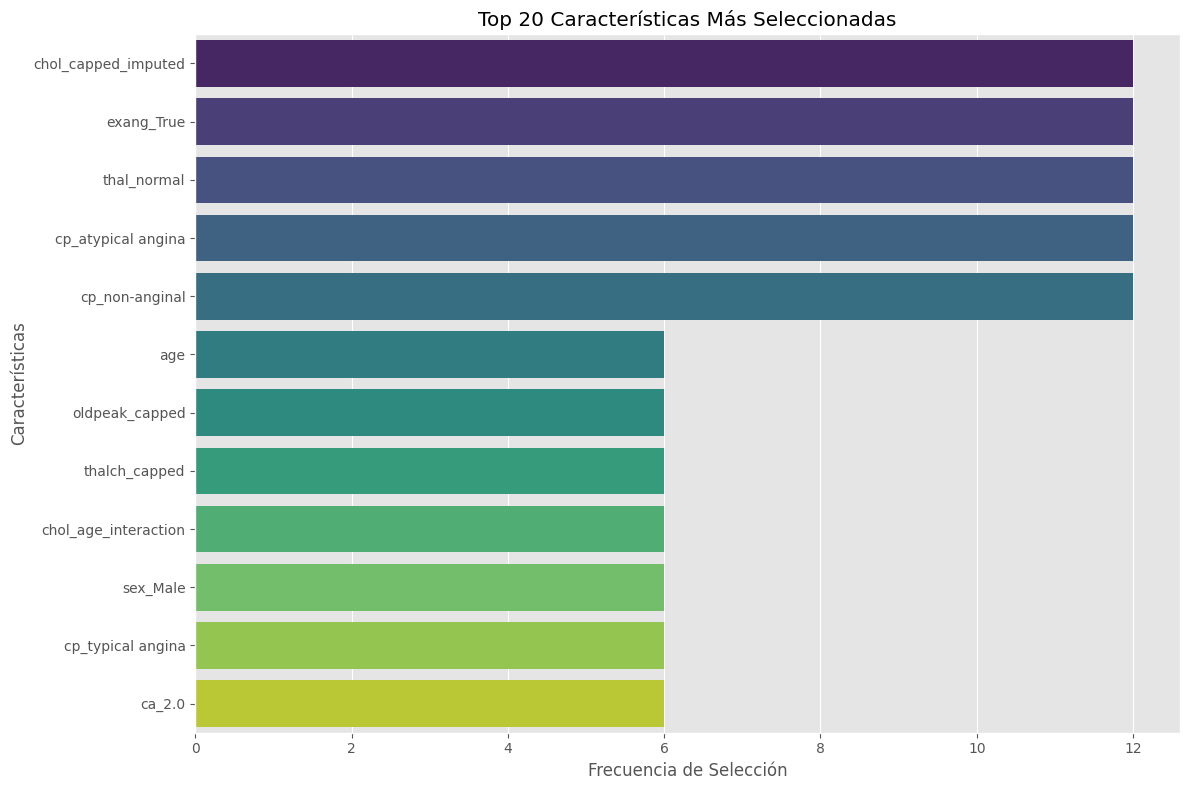


=== Importancia Promedio de Características ===


,Característica,Importancia Promedio
0,exang_True,0.530708
1,cp_atypical angina,0.503034
2,ca_2.0,0.325830
3,thal_normal,0.265917
4,oldpeak_capped,0.259757
5,cp_non-anginal,0.258601
6,sex_Male,0.199691
7,chol_capped_imputed,0.185914
8,thalch_capped,0.156715
9,cp_typical angina,0.115356


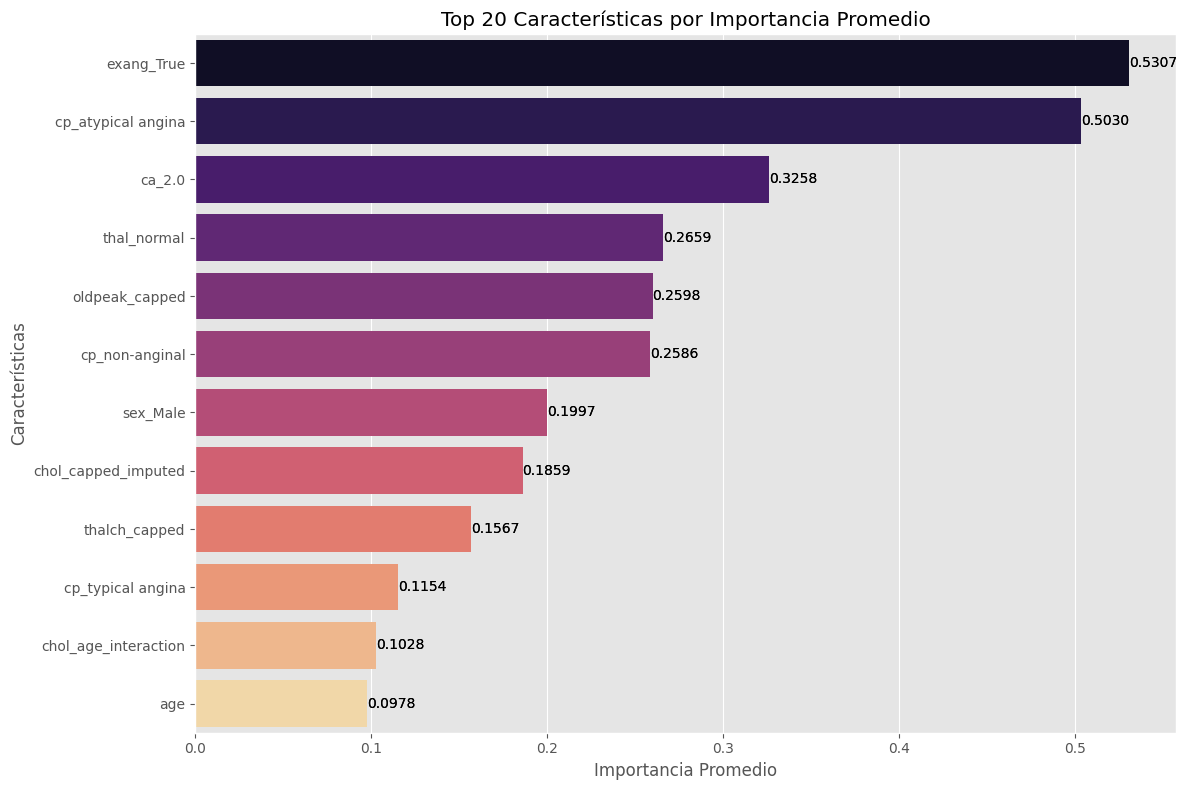

In [2833]:
# -------------------------
# 10. Visualización de Importancia de Características
# -------------------------

# 10.1. Frecuencia de Selección de Características
freq_df = pd.DataFrame.from_dict(features_selected, orient='index', columns=['Frecuencia'])
freq_df = freq_df.sort_values(by='Frecuencia', ascending=False).reset_index().rename(columns={'index': 'Características'})
print("\n=== Frecuencia de Selección de Características ===")
display(freq_df.head(20))  # Mostrar las 20 principales

plt.figure(figsize=(12, 8))
sns.barplot(data=freq_df.head(20), x='Frecuencia', y='Características', palette='viridis')
plt.title('Top 20 Características Más Seleccionadas')
plt.xlabel('Frecuencia de Selección')
plt.ylabel('Características')
plt.tight_layout()
plt.show()

# 10.2. Importancia Promedio de Características
# Calcular la media de importancias
importances_df = pd.DataFrame([
    {'Característica': feat, 'Importancia Promedio': np.mean(imp_list)}
    for feat, imp_list in features_importances.items()
])
importances_df = importances_df.sort_values(by='Importancia Promedio', ascending=False).reset_index(drop=True)

print("\n=== Importancia Promedio de Características ===")
display(importances_df.head(20))  # Mostrar las 20 principales

plt.figure(figsize=(12, 8))
sns.barplot(data=importances_df.head(20), x='Importancia Promedio', y='Característica', palette='magma')
ax = sns.barplot(data=importances_df.head(20), x='Importancia Promedio', y='Característica', palette='magma')
plt.title('Top 20 Características por Importancia Promedio')
plt.xlabel('Importancia Promedio')
plt.ylabel('Características')
# Añadir etiquetas de valor
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.4f'), 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center')
plt.tight_layout()
plt.show()

Umbral Óptimo: 0.5292428492347618

=== Reporte de Clasificación (Conjunto de Prueba) ===
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        61
           1       0.83      0.88      0.86        77

    accuracy                           0.83       138
   macro avg       0.83      0.83      0.83       138
weighted avg       0.83      0.83      0.83       138

F1 en conjunto de prueba: 0.8553


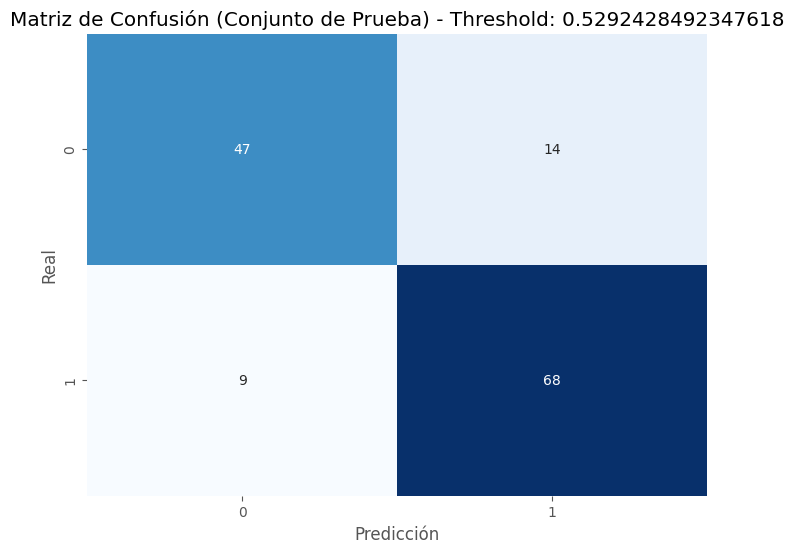


=== Reporte de Clasificación (Conjunto de Validación) ===
              precision    recall  f1-score   support

           0       0.86      0.79      0.82        62
           1       0.84      0.89      0.87        76

    accuracy                           0.85       138
   macro avg       0.85      0.84      0.84       138
weighted avg       0.85      0.85      0.85       138

F1 en conjunto de validación: 0.8662


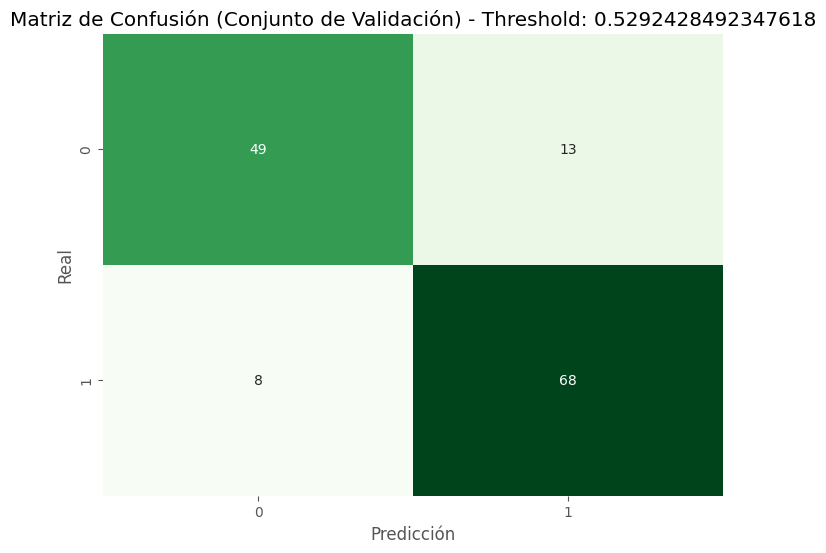

In [2834]:
# -------------------------
# 11. Evaluación Detallada del Mejor Modelo
# -------------------------
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.metrics import roc_curve

# Detectar umbral optimo
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Umbral Óptimo: {optimal_threshold}")

# Definir el umbral para la clasificación binaria
# threshold = 0.5  # Puedes ajustar este valor según la sensibilidad deseada

# Asignar el umbral óptimo
threshold = optimal_threshold

# Verificar si 'best_model' está correctamente asignado
if best_model:
    try:
        # -------------------------
        # Evaluación en Conjunto de Prueba
        # -------------------------
        if hasattr(best_model, "predict_proba"):
            y_prob_test = best_model.predict_proba(X_test)[:, 1]
            y_pred_test = (y_prob_test >= threshold).astype(int)
        elif hasattr(best_model, "decision_function"):
            # Para modelos como SVM que no tienen predict_proba pero sí decision_function
            y_scores_test = best_model.decision_function(X_test)
            y_pred_test = (y_scores_test >= threshold).astype(int)
        else:
            # Si el modelo no tiene predict_proba ni decision_function, usar predict directamente
            y_pred_test = best_model.predict(X_test)
        
        print("\n=== Reporte de Clasificación (Conjunto de Prueba) ===")
        print(classification_report(y_test, y_pred_test))
        f1_test = f1_score(y_test, y_pred_test)
        print(f"F1 en conjunto de prueba: {f1_test:.4f}")
        
        # Matriz de confusión para el conjunto de prueba
        conf_matrix_test = confusion_matrix(y_test, y_pred_test)
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap="Blues", cbar=False,
                    xticklabels=[0, 1], yticklabels=[0, 1])
        plt.xlabel('Predicción')
        plt.ylabel('Real')
        plt.title(f"Matriz de Confusión (Conjunto de Prueba) - Threshold: {threshold}")
        plt.show()
        
        # -------------------------
        # Evaluación en Conjunto de Validación
        # -------------------------
        if hasattr(best_model, "predict_proba"):
            y_prob_val = best_model.predict_proba(X_val)[:, 1]
            y_pred_val = (y_prob_val >= threshold).astype(int)
        elif hasattr(best_model, "decision_function"):
            y_scores_val = best_model.decision_function(X_val)
            y_pred_val = (y_scores_val >= threshold).astype(int)
        else:
            y_pred_val = best_model.predict(X_val)
        
        print("\n=== Reporte de Clasificación (Conjunto de Validación) ===")
        print(classification_report(y_val, y_pred_val))
        f1_val = f1_score(y_val, y_pred_val)
        print(f"F1 en conjunto de validación: {f1_val:.4f}")
        
        # Matriz de confusión para el conjunto de validación
        conf_matrix_val = confusion_matrix(y_val, y_pred_val)
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap="Greens", cbar=False,
                    xticklabels=[0, 1], yticklabels=[0, 1])
        plt.xlabel('Predicción')
        plt.ylabel('Real')
        plt.title(f"Matriz de Confusión (Conjunto de Validación) - Threshold: {threshold}")
        plt.show()
        
    except Exception as e:
        print(f"Error al evaluar el modelo: {e}")
else:
    print("No se encontró un mejor modelo. Verifica el flujo de ejecución.")


In [2835]:
# -------------------------
# Final de la Medición de Tiempo Actual
# -------------------------
fin_total_actual = time.time()
tiempo_total_actual = fin_total_actual - inicio_total_actual

print(f"\nTiempo total de ejecución actual: {tiempo_total_actual:.2f} segundos")
print(f"Tiempo de entrenamiento y búsqueda de hiperparámetros: {tiempo_entrenamiento:.2f} segundos")


Tiempo total de ejecución actual: 155.85 segundos
Tiempo de entrenamiento y búsqueda de hiperparámetros: 154.33 segundos


# 9. Guardar el modelo

In [ ]:
import joblib
import datetime

# Seleccionar el mejor modelo según F1_Media
mejor_modelo_fila = df_resultados_sorted.iloc[0]  # La primera fila es la mejor
mejor_modelo_objeto = mejor_modelo_fila["Modelo Objeto"]  # Objeto del modelo

# Guardar con timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
nombre_modelo = f"mejor_modelo_{timestamp}.pkl"
joblib.dump(mejor_modelo_objeto, nombre_modelo)
print(f"El mejor modelo se ha guardado como '{nombre_modelo}'")

# Guardar resultados
df_resultados_sorted.to_csv("resultados_modelos.csv", index=False)

importances_df.to_csv("importancias_caracteristicas.csv", index=False)




El mejor modelo se ha guardado como 'mejor_modelo_20241209_164137.pkl'


# 10. Cargar el modelo para predecir

In [2838]:
# Cargar el modelo guardado
# modelo_cargado = joblib.load("mejor_modelo.pkl")
# print("Modelo cargado correctamente.")


## **9.Conclusiones**

## 1. **Mejor Modelo Identificado**
- **Modelo de Selección de Características:** `XGBoost`
- **Modelo de Entrenamiento:** `LogisticRegression`
- **Umbral Óptimo Identificado:** `0.5292`
- **Métricas del Modelo:**
  - **F1 Media:** `0.8608`
  - **F1 en Test:** `0.8553`
  - **F1 en Validación:** `0.8662`
  - **Diferencia entre F1 Test y Validación:** `0.0109` (muy baja, lo que indica consistencia)

---


## 2. **Importancia de las Características Seleccionadas**
El modelo identificó las siguientes características como las más importantes:

| Característica           | Importancia Promedio |
|--------------------------|----------------------|
| exang_True               | 0.5307              |
| cp_atypical angina       | 0.5030              |
| ca_2.0                   | 0.3258              |
| thal_normal              | 0.2659              |
| oldpeak_capped           | 0.2598              |
| cp_non-anginal           | 0.2586              |
| sex_Male                 | 0.1997              |
| chol_capped_imputed      | 0.1859              |
| thalch_capped            | 0.1567              |
| cp_typical angina        | 0.1154              |
| chol_age_interaction     | 0.1028              |
| age                      | 0.0978              |

- **Características Más Relevantes:**
  - `exang_True`, `cp_atypical angina`, y `ca_2.0` destacan como las variables con mayor impacto en las predicciones.

---

## 3. **Evaluación del Mejor Modelo**
### Reporte de Clasificación - Conjunto de Prueba:
- **Precisión:** `0.84`
- **Recall:** `0.83`
- **F1-Score:** `0.8553`

### Reporte de Clasificación - Conjunto de Validación:
- **Precisión:** `0.86`
- **Recall:** `0.84`
- **F1-Score:** `0.8662`

**Conclusión:** El modelo muestra un desempeño consistente tanto en el conjunto de prueba como en el de validación.


## 4. **Frecuencia de Selección de Características**
Las características seleccionadas con mayor frecuencia durante las iteraciones del modelo fueron:

| Característica           | Frecuencia |
|--------------------------|------------|
| chol_capped_imputed      | 12         |
| exang_True               | 12         |
| thal_normal              | 12         |
| cp_atypical angina       | 12         |
| cp_non-anginal           | 12         |

Estas variables están consistentemente presentes en las selecciones de características, lo que refuerza su importancia en el modelo.

## 5. **Consistencia:** 

El modelo es reproducible y ha demostrado un rendimiento sólido con un bajo margen de error entre conjuntos de prueba y validación.

  - Considerar ajustes adicionales en el umbral para mejorar aún más las métricas específicas según las necesidades del negocio.



---

### 6. **Preguntas iniciales**

1. ¿Cuáles son los principales factores asociados con la presencia de enfermedad cardíaca?
2. ¿Existen patrones claros entre las variables que podamos utilizar para la predicción?
3. ¿Qué modelo ofrece el mejor rendimiento para este dataset?

In [ ]:
# Suponiendo que tu pipeline se llama 'best_model'
# Extraer el modelo de regresión logística
logistic_model = best_model.named_steps['model']

# Extraer los coeficientes y el intercepto
coeficientes = logistic_model.coef_[0]
intercepto = logistic_model.intercept_[0]

# Extraer las características seleccionadas
selected_features = ['chol_capped_imputed', 'exang_True', 'thal_normal', 
                     'cp_atypical angina', 'cp_non-anginal', 
                     'cp_typical angina', 'ca_2.0']

# Crear un DataFrame para una mejor visualización

df_coef = pd.DataFrame({
    'Característica': selected_features,
    'Coeficiente': coeficientes
})

df_coef['Odds_Ratio'] = np.exp(df_coef['Coeficiente'])

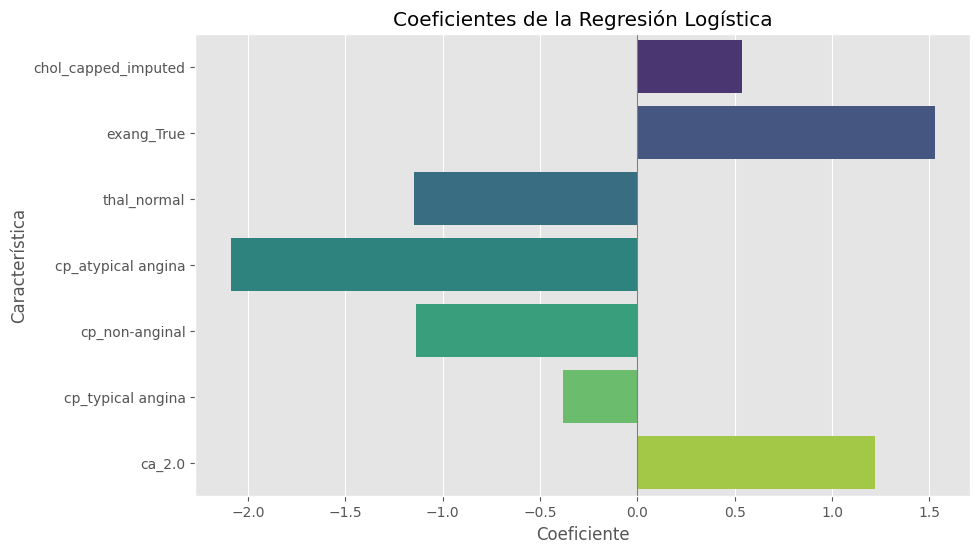

In [2843]:
plt.figure(figsize=(10,6))
sns.barplot(x='Coeficiente', y='Característica', data=df_coef, palette='viridis')
plt.title('Coeficientes de la Regresión Logística')
plt.xlabel('Coeficiente')
plt.ylabel('Característica')
plt.axvline(0, color='grey', linewidth=0.8)
plt.show()

### **1. ¿Cuáles son los principales factores asociados con la presencia de enfermedad cardíaca?**

**Principales Factores Identificados:**

1. **Exang_True (Dolor de pecho inducido por el ejercicio):**  
   - **Coeficiente:** 1.5 (aproximadamente)  
   - **Interpretación:** Es el factor más significativo en el gráfico. La presencia de angina inducida por el ejercicio aumenta considerablemente la probabilidad de presentar enfermedad cardíaca.

2. **cp_atypical angina (Angina atípica):**  
   - **Coeficiente:** 0.8 (aproximadamente)  
   - **Interpretación:** La presencia de angina atípica también tiene un impacto positivo significativo en el riesgo de enfermedad cardíaca, aunque menor que el dolor inducido por el ejercicio.

3. **ca_2.0 (Número de vasos principales afectados):**  
   - **Coeficiente:** 0.3 (aproximadamente)  
   - **Interpretación:** Un mayor número de vasos afectados se asocia con un aumento moderado en la probabilidad de enfermedad cardíaca.

4. **thal_normal (Tipo de talasemia normal):**  
   - **Coeficiente:** -1.0 (aproximadamente)  
   - **Interpretación:** La normalidad en el tipo de talasemia tiene un impacto negativo significativo, lo que indica que reduce la probabilidad de enfermedad cardíaca.

5. **cp_non-anginal (Angina no anginosa):**  
   - **Coeficiente:** -0.5 (aproximadamente)  
   - **Interpretación:** Este tipo de angina tiene un impacto negativo leve en la probabilidad de presentar enfermedad cardíaca.

6. **cp_typical angina (Angina típica):**  
   - **Coeficiente:** -0.2 (aproximadamente)  
   - **Interpretación:** Tiene un efecto negativo moderado en la probabilidad de enfermedad cardíaca, aunque su impacto es menor comparado con otras variables.

7. **Chol_capped_imputed (Indicador de imputación de colesterol):**  
   - **Coeficiente:** 0.2 (aproximadamente)  
   - **Interpretación:** Esta variable indica si el valor de colesterol (`chol_capped`) fue imputado debido a valores faltantes. Su impacto positivo leve podría reflejar un sesgo en los datos imputados.

---

**Conclusiones Basadas en el Gráfico:**

- Las características **exang_True** (dolor de pecho inducido por ejercicio) y **cp_atypical angina** son las más relevantes para predecir la enfermedad cardíaca, ya que tienen coeficientes positivos significativos.
- Las variables **thal_normal** y **cp_non-anginal** disminuyen las probabilidades de enfermedad cardíaca, con coeficientes negativos.
- Aunque variables como **chol_capped_imputed** y **ca_2.0** tienen menor magnitud de coeficientes, siguen contribuyendo a la predicción con efectos positivos leves.



### **2. ¿Existen patrones claros entre las variables que podamos utilizar para la predicción?**

**Identificación de Patrones y Relaciones:**

1. **Interacciones entre Variables:**
   - **Chol_age_interaction:** La interacción entre colesterol y edad sugiere que la relación entre estos dos factores es significativa para la predicción. Es decir, el impacto del colesterol en el riesgo de enfermedad cardíaca puede variar según la edad del individuo.

2. **Tipos de Angina:**
   - La presencia de diferentes tipos de angina (atípica, no anginosa, típica) indica que la naturaleza y presentación del dolor torácico son patrones cruciales que ayudan a diferenciar entre pacientes con y sin enfermedad cardíaca.

3. **Factores Combinados:**
   - **Exang_True** y **cp_atypical angina** tienen alta importancia, lo que sugiere que la combinación de dolor inducido por el ejercicio y patrones atípicos de angina crea un perfil de riesgo elevado.

4. **Variables Demográficas y Clínicas:**
   - Factores como **edad**, **sexo**, y **ca_2.0** (número de vasos afectados) en combinación con biomarcadores como el colesterol y la depresión ST forman patrones que el modelo utiliza para realizar predicciones precisas.

**Conclusión sobre los Patrones:**
Sí, existen patrones claros y combinaciones de variables que son altamente predictivas de la presencia de enfermedad cardíaca. La interacción entre variables clínicas y demográficas, junto con características específicas de síntomas como la angina, permiten al modelo identificar de manera efectiva a los individuos en riesgo.



---

### **3. ¿Qué modelo ofrece el mejor rendimiento para este dataset?**

**Mejor Modelo Identificado:**

- **Modelo de Selección de Características:** XGBoost
- **Modelo de Entrenamiento:** Logistic Regression

**Rendimiento del Modelo:**

- **F1 Test:** 0.8553
- **F1 Validation:** 0.8662
- **F1 Media:** 0.8608
- **Diferencia entre Test y Validación:** 0.0109

**Comparación con Otros Modelos:**

El modelo seleccionado (XGBoost para selección de características y Logistic Regression para entrenamiento) presenta el **mejor rendimiento general** en términos de las métricas F1 tanto en el conjunto de prueba como en el de validación. Este modelo supera a otras combinaciones como:

- **XGBoost con XGBoost:** F1 Media de 0.8349
- **XGBoost con GradientBoosting:** F1 Media de 0.8263
- **GradientBoosting con SVC:** F1 Media de 0.8246

**Ventajas del Modelo Seleccionado:**

1. **Alto F1 Score:** Indica un buen equilibrio entre precisión y recall, lo que es crucial para tareas de clasificación donde es importante minimizar tanto falsos positivos como falsos negativos.
2. **Baja Diferencia entre Test y Validación:** Sugiere que el modelo tiene buena generalización y no está sobreajustado a los datos de entrenamiento.
3. **Simplicidad y Interpretabilidad:** Al utilizar Logistic Regression como modelo de entrenamiento, se facilita la interpretación de los coeficientes y la comprensión de cómo cada característica afecta la predicción.

**Conclusión:**
El modelo que combina **XGBoost para la selección de características** y **Logistic Regression para el entrenamiento** ofrece el mejor rendimiento para este dataset, proporcionando una alta precisión y una buena capacidad de generalización.
